In [3]:
import os

# Define the directory path
directory_path = '/Users/ghulamabbaszafari/Downloads/rest/Clippeed_GLC_tevere_basin'

# List all files in the directory
files = os.listdir(directory_path)

# Filter out unwanted files like .DS_Store
filtered_files = [file for file in files if file != '.DS_Store']

# Print the filtered list of files
for file in filtered_files:
    print(file)


GLc_tevere_2005.tif
GLC_tevere_2011.tif
GLC_tevere_2010.tif
GLc_tevere_2004.tif
GLC_tevere_2012.tif
GLC_tevere_2006.tif
GLC_tevere_2007.tif
GLc_tevere_2013.tif
GLC_tevere_2017.tif
GLC_tevere_2003.tif
GLC_tevere_2002.tif
GLC_tevere_2016.tif
GLC_tevere_2000.tif
GLC_tevere_2014.tif
GLC_tevere_2015.tif
GLC_tevere_2001.tif
GLC_tevere_2018.tif
GLC_tevere_2019.tif
GLC_tevere_2022.tif
GLC_tevere_2021.tif
GLC_tevere_2009.tif
GLC_tevere_2008.tif
GLC_tevere_2020.tif
GLC_tevere_1995.tif
GLC_tevere_1985.tif
GLC_tevere_1990.tif


In [4]:
import os
import grass.script as gs

# Class labels for reclassification
class_labels = {
    5: 'Shrubland',
    7: 'Grassland',
    8: 'Cropland',
    9: 'Wetland',
    11: 'Lichens and mosses',
    12: 'Bareland',
    13: 'Built-up',
    15: 'Water',
    16: 'Permanent ice and Snow',
    20: 'Forest',
    255: 'No data'
}

# Corresponding colors for visualization
color_map = {
    'Shrubland': '#8b4513',
    'Grassland': '#32cd32',
    'Cropland': '#ffd700',
    'Wetland': '#4682b4',
    'Lichens and mosses': '#a9cda9',
    'Bareland': '#c2b280',
    'Built-up': '#808080',
    'Water': '#1e90ff',
    'Permanent ice and Snow': '#b0c4de',
    'Forest': '#006400',
    'No data': '#ffffff'
}

def import_clipped_landcover_data():
    """Import clipped land cover maps and apply labels/colors."""
    directory_path = '/Users/ghulamabbaszafari/Downloads/rest/Clippeed_GLC_tevere_basin'
    
    # List .tif files, ignoring hidden files like .DS_Store
    raster_files = [
        f for f in os.listdir(directory_path)
        if f.lower().endswith('.tif') and not f.startswith('.')
    ]
    raster_files.sort()

    print(f"Found {len(raster_files)} raster files to import.")

    raster_dict = {}
    failed_imports = []

    for raster_file in raster_files:
        try:
            base_name = os.path.splitext(raster_file)[0]

            # Extract year (assumes it's the last 4 digits in the filename)
            year = base_name[-4:]
            if not year.isdigit():
                print(f"Skipping {raster_file} (invalid year format)")
                continue

            # Create a unique name for GRASS GIS
            raster_name = f"tevere_lc_{year}"
            filepath = os.path.join(directory_path, raster_file)

            print(f"\nImporting {raster_file} as {raster_name}...")

            # Import raster
            gs.run_command('r.in.gdal',
                           input=filepath,
                           output=raster_name,
                           band=1,
                           flags='o',
                           overwrite=True)

            # Set nodata values to NULL
            gs.run_command('r.null', map=raster_name, setnull='0,255')

            # Assign category labels
            label_rules = "\n".join(f"{k}\t{v}" for k, v in class_labels.items())
            gs.write_command('r.category', map=raster_name, rules='-', stdin=label_rules)

            # Assign color rules
            color_rules = "\n".join(
                f"{k} {color_map[v]}" for k, v in class_labels.items() if v in color_map
            )
            gs.write_command('r.colors', map=raster_name, rules='-', stdin=color_rules)

            raster_dict[year] = raster_name
            print(f"✓ Imported and styled: {raster_name}")

        except Exception as e:
            print(f"✗ FAILED: {raster_file} ({str(e)})")
            failed_imports.append(raster_file)

    # Summary
    if failed_imports:
        print("\n❌ Failed imports:")
        for f in failed_imports:
            print(f" - {f}")
    else:
        print("\n✅ All files imported and styled successfully!")

    return raster_dict

# Run it
if __name__ == "__main__":
    import_clipped_landcover_data()





Found 26 raster files to import.

Importing GLC_tevere_1985.tif as tevere_lc_1985...


Over-riding projection check
Importing raster map <tevere_lc_1985>...


Color table for raster map <tevere_lc_1985> set to 'rules'


✓ Imported and styled: tevere_lc_1985

Importing GLC_tevere_1990.tif as tevere_lc_1990...


Over-riding projection check
Importing raster map <tevere_lc_1990>...


Color table for raster map <tevere_lc_1990> set to 'rules'


✓ Imported and styled: tevere_lc_1990

Importing GLC_tevere_1995.tif as tevere_lc_1995...


Over-riding projection check
Importing raster map <tevere_lc_1995>...


Color table for raster map <tevere_lc_1995> set to 'rules'


✓ Imported and styled: tevere_lc_1995

Importing GLC_tevere_2000.tif as tevere_lc_2000...


Over-riding projection check
Importing raster map <tevere_lc_2000>...


Color table for raster map <tevere_lc_2000> set to 'rules'


✓ Imported and styled: tevere_lc_2000

Importing GLC_tevere_2001.tif as tevere_lc_2001...


Over-riding projection check
Importing raster map <tevere_lc_2001>...


Color table for raster map <tevere_lc_2001> set to 'rules'


✓ Imported and styled: tevere_lc_2001

Importing GLC_tevere_2002.tif as tevere_lc_2002...


Over-riding projection check
Importing raster map <tevere_lc_2002>...


Color table for raster map <tevere_lc_2002> set to 'rules'


✓ Imported and styled: tevere_lc_2002

Importing GLC_tevere_2003.tif as tevere_lc_2003...


Over-riding projection check
Importing raster map <tevere_lc_2003>...


Color table for raster map <tevere_lc_2003> set to 'rules'


✓ Imported and styled: tevere_lc_2003

Importing GLC_tevere_2006.tif as tevere_lc_2006...


Over-riding projection check
Importing raster map <tevere_lc_2006>...


Color table for raster map <tevere_lc_2006> set to 'rules'


✓ Imported and styled: tevere_lc_2006

Importing GLC_tevere_2007.tif as tevere_lc_2007...


Over-riding projection check
Importing raster map <tevere_lc_2007>...


Color table for raster map <tevere_lc_2007> set to 'rules'


✓ Imported and styled: tevere_lc_2007

Importing GLC_tevere_2008.tif as tevere_lc_2008...


Over-riding projection check
Importing raster map <tevere_lc_2008>...


Color table for raster map <tevere_lc_2008> set to 'rules'


✓ Imported and styled: tevere_lc_2008

Importing GLC_tevere_2009.tif as tevere_lc_2009...


Over-riding projection check
Importing raster map <tevere_lc_2009>...


Color table for raster map <tevere_lc_2009> set to 'rules'


✓ Imported and styled: tevere_lc_2009

Importing GLC_tevere_2010.tif as tevere_lc_2010...


Over-riding projection check
Importing raster map <tevere_lc_2010>...


Color table for raster map <tevere_lc_2010> set to 'rules'


✓ Imported and styled: tevere_lc_2010

Importing GLC_tevere_2011.tif as tevere_lc_2011...


Over-riding projection check
Importing raster map <tevere_lc_2011>...


Color table for raster map <tevere_lc_2011> set to 'rules'


✓ Imported and styled: tevere_lc_2011

Importing GLC_tevere_2012.tif as tevere_lc_2012...


Over-riding projection check
Importing raster map <tevere_lc_2012>...


Color table for raster map <tevere_lc_2012> set to 'rules'


✓ Imported and styled: tevere_lc_2012

Importing GLC_tevere_2014.tif as tevere_lc_2014...


Over-riding projection check
Importing raster map <tevere_lc_2014>...


Color table for raster map <tevere_lc_2014> set to 'rules'


✓ Imported and styled: tevere_lc_2014

Importing GLC_tevere_2015.tif as tevere_lc_2015...


Over-riding projection check
Importing raster map <tevere_lc_2015>...


Color table for raster map <tevere_lc_2015> set to 'rules'


✓ Imported and styled: tevere_lc_2015

Importing GLC_tevere_2016.tif as tevere_lc_2016...


Over-riding projection check
Importing raster map <tevere_lc_2016>...


Color table for raster map <tevere_lc_2016> set to 'rules'


✓ Imported and styled: tevere_lc_2016

Importing GLC_tevere_2017.tif as tevere_lc_2017...


Over-riding projection check
Importing raster map <tevere_lc_2017>...


Color table for raster map <tevere_lc_2017> set to 'rules'


✓ Imported and styled: tevere_lc_2017

Importing GLC_tevere_2018.tif as tevere_lc_2018...


Over-riding projection check
Importing raster map <tevere_lc_2018>...


Color table for raster map <tevere_lc_2018> set to 'rules'


✓ Imported and styled: tevere_lc_2018

Importing GLC_tevere_2019.tif as tevere_lc_2019...


Over-riding projection check
Importing raster map <tevere_lc_2019>...


Color table for raster map <tevere_lc_2019> set to 'rules'


✓ Imported and styled: tevere_lc_2019

Importing GLC_tevere_2020.tif as tevere_lc_2020...


Over-riding projection check
Importing raster map <tevere_lc_2020>...


Color table for raster map <tevere_lc_2020> set to 'rules'


✓ Imported and styled: tevere_lc_2020

Importing GLC_tevere_2021.tif as tevere_lc_2021...


Over-riding projection check
Importing raster map <tevere_lc_2021>...


Color table for raster map <tevere_lc_2021> set to 'rules'


✓ Imported and styled: tevere_lc_2021

Importing GLC_tevere_2022.tif as tevere_lc_2022...


Over-riding projection check
Importing raster map <tevere_lc_2022>...


Color table for raster map <tevere_lc_2022> set to 'rules'


✓ Imported and styled: tevere_lc_2022

Importing GLc_tevere_2004.tif as tevere_lc_2004...


Over-riding projection check
Importing raster map <tevere_lc_2004>...


Color table for raster map <tevere_lc_2004> set to 'rules'


✓ Imported and styled: tevere_lc_2004

Importing GLc_tevere_2005.tif as tevere_lc_2005...


Over-riding projection check
Importing raster map <tevere_lc_2005>...


Color table for raster map <tevere_lc_2005> set to 'rules'


✓ Imported and styled: tevere_lc_2005

Importing GLc_tevere_2013.tif as tevere_lc_2013...


Over-riding projection check
Importing raster map <tevere_lc_2013>...




✓ Imported and styled: tevere_lc_2013

✅ All files imported and styled successfully!


Color table for raster map <tevere_lc_2013> set to 'rules'


In [7]:
import grass.script as gs
import pandas as pd
from tabulate import tabulate

# Class labels
class_labels = {
    5: 'Shrubland',
    7: 'Grassland',
    8: 'Cropland',
    9: 'Wetland',
    11: 'Lichens and mosses',
    12: 'Bareland',
    13: 'Built-up',
    15: 'Water',
    16: 'Permanent ice and Snow',
    20: 'Forest',
    255: 'No data'
}

def format_number(num):
    return f"{num:,.2f}"

def format_percentage(num, total):
    return f"{(num/total)*100:.2f}%" if total > 0 else "0.00%"

def generate_yearly_stats(raster_name):
    stats = gs.read_command('r.stats', flags='acn', input=raster_name, separator='space').strip().splitlines()
    
    if not stats:
        print(f"Warning: No statistics found for {raster_name}")
        return None, 0

    results = []
    total_area = 0
    year = raster_name.replace("tevere_lc_", "").replace("@PERMANENT", "")

    for line in stats:
        parts = line.split()
        if len(parts) < 3:
            continue
        
        cat = parts[0]
        count = int(float(parts[1]))
        area_m2 = float(parts[2])
        area_km2 = area_m2 / 1_000_000
        
        try:
            cat_int = int(cat)
            label = class_labels.get(cat_int, f'Class {cat}')
            results.append({
                'class': cat_int,
                'label': label,
                'count': count,
                'area_km2': area_km2
            })
            total_area += area_km2
        except ValueError:
            continue

    formatted_results = []
    for item in sorted(results, key=lambda x: x['area_km2'], reverse=True):
        formatted_results.append([
            item['class'],
            item['label'],
            f"{item['count']:,}",
            format_number(item['area_km2']),
            format_percentage(item['area_km2'], total_area)
        ])

    print(f"\nSample Statistics for {year}:")
    print(tabulate(formatted_results, headers=['class', 'label', 'count', 'area_km2', 'pct'], tablefmt='simple'))

    return results, total_area

def generate_all_stats():
    maps = gs.read_command('g.list', type='raster', pattern="tevere_lc_*", flags='m').splitlines()
    maps = sorted(maps)

    all_data = []
    yearly_totals = []

    for raster_name in maps:
        year = raster_name.replace("tevere_lc_", "").replace("@PERMANENT", "")
        stats, total_area = generate_yearly_stats(raster_name)

        if not stats:
            continue

        yearly_totals.append({
            'Year': year,
            'Total Area (km2)': format_number(total_area)
        })

        for item in stats:
            all_data.append({
                'Year': year,
                'Class': item['class'],
                'Label': item['label'],
                'Count': item['count'],
                'Area_km2': item['area_km2'],
                'Percentage': (item['area_km2']/total_area)*100 if total_area else 0
            })

    # Create DataFrames
    df_all = pd.DataFrame(all_data)
    df_totals = pd.DataFrame(yearly_totals)

    # Save to CSV
    df_all.to_csv('tevere_landcover_detailed_stats.csv', index=False)
    df_totals.to_csv('tevere_landcover_yearly_totals.csv', index=False)

    print("\nSaved detailed statistics to 'tevere_landcover_detailed_stats.csv'")
    print("Saved yearly totals to 'tevere_landcover_yearly_totals.csv'")

    return df_all, df_totals

if __name__ == "__main__":
    detailed_df, totals_df = generate_all_stats()

    summary_df = detailed_df.pivot_table(
        index='Year',
        columns='Label',
        values='Area_km2',
        aggfunc='sum'
    ).fillna(0)

    column_order = [
        'Shrubland', 'Grassland', 'Cropland', 'Wetland',
        'Lichens and mosses', 'Bareland', 'Built-up', 'Water', 'Forest'
    ]
    summary_df = summary_df[[col for col in column_order if col in summary_df.columns]]

    print("\nSummary Table:")
    print(summary_df.to_string(float_format="%.2f"))

    summary_df.to_csv('tevere_landcover_summary_table.csv')
    print("\nSaved summary table to 'tevere_landcover_summary_table.csv'")






Sample Statistics for 1985:
  class  label      count            area_km2  pct
-------  ---------  -------------  ----------  ------
     20  Forest     2,147,754,600        2.39  51.83%
      8  Cropland   1,570,569,300        1.75  37.90%
      7  Grassland  319,140,900          0.35  7.70%
     13  Built-up   73,100,700           0.08  1.76%
      5  Shrubland  30,319,200           0.03  0.73%
      9  Wetland    1,916,100            0     0.05%
     15  Water      1,058,400            0     0.03%
     12  Bareland   232,200              0     0.01%



Sample Statistics for 1990:
  class  label      count            area_km2  pct
-------  ---------  -------------  ----------  ------
     20  Forest     2,147,083,200        2.39  51.81%
      8  Cropland   1,553,014,800        1.73  37.48%
      7  Grassland  326,359,800          0.36  7.88%
     13  Built-up   80,269,200           0.09  1.94%
      5  Shrubland  32,474,700           0.04  0.78%
      9  Wetland    3,045,600            0     0.07%
     15  Water      1,709,100            0     0.04%
     12  Bareland   135,000              0     0.00%



Sample Statistics for 1995:
  class  label      count            area_km2  pct
-------  ---------  -------------  ----------  ------
     20  Forest     2,129,255,100        2.37  51.38%
      8  Cropland   1,559,687,400        1.73  37.64%
      7  Grassland  331,941,600          0.37  8.01%
     13  Built-up   85,851,000           0.1   2.07%
      5  Shrubland  31,530,600           0.04  0.76%
     15  Water      3,710,700            0     0.09%
      9  Wetland    1,992,600            0     0.05%
     12  Bareland   122,400              0     0.00%



Sample Statistics for 2000:
  class  label               count            area_km2  pct
-------  ------------------  -------------  ----------  ------
     20  Forest              2,090,083,500        2.32  50.44%
      8  Cropland            1,602,192,600        1.78  38.66%
      7  Grassland           278,547,300          0.31  6.72%
     13  Built-up            135,238,500          0.15  3.26%
      5  Shrubland           28,206,000           0.03  0.68%
     15  Water               4,564,800            0.01  0.11%
      9  Wetland             3,990,600            0     0.10%
     11  Lichens and mosses  1,020,600            0     0.02%
     12  Bareland            247,500              0     0.01%



Sample Statistics for 2001:
  class  label               count            area_km2  pct
-------  ------------------  -------------  ----------  ------
     20  Forest              2,084,246,100        2.32  50.29%
      8  Cropland            1,609,281,900        1.79  38.83%
      7  Grassland           271,157,400          0.3   6.54%
     13  Built-up            140,850,000          0.16  3.40%
      5  Shrubland           28,978,200           0.03  0.70%
     15  Water               5,029,200            0.01  0.12%
      9  Wetland             3,392,100            0     0.08%
     11  Lichens and mosses  908,100              0     0.02%
     12  Bareland            248,400              0     0.01%



Sample Statistics for 2002:
  class  label               count            area_km2  pct
-------  ------------------  -------------  ----------  ------
     20  Forest              2,067,399,000        2.3   49.89%
      8  Cropland            1,613,986,200        1.79  38.95%
      7  Grassland           265,671,000          0.3   6.41%
     13  Built-up            141,304,500          0.16  3.41%
      5  Shrubland           46,422,000           0.05  1.12%
     15  Water               5,015,700            0.01  0.12%
      9  Wetland             3,204,900            0     0.08%
     11  Lichens and mosses  846,000              0     0.02%
     12  Bareland            242,100              0     0.01%



Sample Statistics for 2003:
  class  label               count            area_km2  pct
-------  ------------------  -------------  ----------  ------
     20  Forest              2,072,304,000        2.3   50.01%
      8  Cropland            1,620,214,200        1.8   39.10%
      7  Grassland           264,636,000          0.29  6.39%
     13  Built-up            146,636,100          0.16  3.54%
      5  Shrubland           30,527,100           0.03  0.74%
     15  Water               5,604,300            0.01  0.14%
      9  Wetland             2,935,800            0     0.07%
     11  Lichens and mosses  941,400              0     0.02%
     12  Bareland            292,500              0     0.01%



Sample Statistics for 2004:
  class  label               count            area_km2  pct
-------  ------------------  -------------  ----------  ------
     20  Forest              2,068,297,200        2.3   49.91%
      8  Cropland            1,628,964,000        1.81  39.31%
      7  Grassland           261,590,400          0.29  6.31%
     13  Built-up            144,791,100          0.16  3.49%
      5  Shrubland           30,797,100           0.03  0.74%
     15  Water               6,136,200            0.01  0.15%
      9  Wetland             2,373,300            0     0.06%
     11  Lichens and mosses  827,100              0     0.02%
     12  Bareland            315,000              0     0.01%



Sample Statistics for 2005:
  class  label               count            area_km2  pct
-------  ------------------  -------------  ----------  ------
     20  Forest              2,064,880,800        2.29  49.83%
      8  Cropland            1,631,061,900        1.81  39.36%
      7  Grassland           261,713,700          0.29  6.32%
     13  Built-up            145,892,700          0.16  3.52%
      5  Shrubland           30,808,800           0.03  0.74%
     15  Water               6,663,600            0.01  0.16%
      9  Wetland             1,874,700            0     0.05%
     11  Lichens and mosses  890,100              0     0.02%
     12  Bareland            305,100              0     0.01%



Sample Statistics for 2006:
  class  label               count            area_km2  pct
-------  ------------------  -------------  ----------  ------
     20  Forest              2,063,181,600        2.29  49.79%
      8  Cropland            1,626,452,100        1.81  39.25%
      7  Grassland           263,335,500          0.29  6.35%
     13  Built-up            149,715,900          0.17  3.61%
      5  Shrubland           31,880,700           0.04  0.77%
     15  Water               5,931,900            0.01  0.14%
      9  Wetland             2,411,100            0     0.06%
     11  Lichens and mosses  855,000              0     0.02%
     12  Bareland            327,600              0     0.01%



Sample Statistics for 2007:
  class  label               count            area_km2  pct
-------  ------------------  -------------  ----------  ------
     20  Forest              2,063,910,600        2.29  49.80%
      8  Cropland            1,621,098,900        1.8   39.12%
      7  Grassland           264,691,800          0.29  6.39%
     13  Built-up            151,270,200          0.17  3.65%
      5  Shrubland           33,306,300           0.04  0.80%
     15  Water               5,904,900            0.01  0.14%
      9  Wetland             2,696,400            0     0.07%
     11  Lichens and mosses  903,600              0     0.02%
     12  Bareland            308,700              0     0.01%



Sample Statistics for 2008:
  class  label               count            area_km2  pct
-------  ------------------  -------------  ----------  ------
     20  Forest              2,062,721,700        2.29  49.78%
      8  Cropland            1,616,612,400        1.8   39.01%
      7  Grassland           262,877,400          0.29  6.34%
     13  Built-up            155,358,000          0.17  3.75%
      5  Shrubland           36,759,600           0.04  0.89%
     15  Water               6,024,600            0.01  0.15%
      9  Wetland             2,497,500            0     0.06%
     11  Lichens and mosses  937,800              0     0.02%
     12  Bareland            302,400              0     0.01%



Sample Statistics for 2009:
  class  label               count            area_km2  pct
-------  ------------------  -------------  ----------  ------
     20  Forest              2,060,950,500        2.29  49.73%
      8  Cropland            1,621,607,400        1.8   39.13%
      7  Grassland           260,607,600          0.29  6.29%
     13  Built-up            153,097,200          0.17  3.69%
      5  Shrubland           37,356,300           0.04  0.90%
     15  Water               6,976,800            0.01  0.17%
      9  Wetland             2,254,500            0     0.05%
     11  Lichens and mosses  957,600              0     0.02%
     12  Bareland            283,500              0     0.01%



Sample Statistics for 2010:
  class  label               count            area_km2  pct
-------  ------------------  -------------  ----------  ------
     20  Forest              2,056,329,900        2.28  49.62%
      8  Cropland            1,623,936,600        1.8   39.19%
      7  Grassland           262,941,300          0.29  6.34%
     13  Built-up            152,856,000          0.17  3.69%
      5  Shrubland           38,333,700           0.04  0.93%
     15  Water               5,201,100            0.01  0.13%
      9  Wetland             3,082,500            0     0.07%
     11  Lichens and mosses  1,076,400            0     0.03%
     12  Bareland            333,900              0     0.01%



Sample Statistics for 2011:
  class  label               count            area_km2  pct
-------  ------------------  -------------  ----------  ------
     20  Forest              2,052,773,100        2.28  49.53%
      8  Cropland            1,626,839,100        1.81  39.26%
      7  Grassland           263,358,000          0.29  6.36%
     13  Built-up            153,036,900          0.17  3.69%
      5  Shrubland           38,240,100           0.04  0.92%
     15  Water               4,794,300            0.01  0.12%
      9  Wetland             3,582,000            0     0.09%
     11  Lichens and mosses  1,144,800            0     0.03%
     12  Bareland            323,100              0     0.01%



Sample Statistics for 2012:
  class  label               count            area_km2  pct
-------  ------------------  -------------  ----------  ------
     20  Forest              2,047,902,300        2.28  49.42%
      8  Cropland            1,635,001,200        1.82  39.45%
      7  Grassland           262,606,500          0.29  6.34%
     13  Built-up            151,789,500          0.17  3.66%
      5  Shrubland           36,915,300           0.04  0.89%
     15  Water               4,816,800            0.01  0.12%
      9  Wetland             3,756,600            0     0.09%
     11  Lichens and mosses  1,002,600            0     0.02%
     12  Bareland            300,600              0     0.01%



Sample Statistics for 2013:
  class  label               count            area_km2  pct
-------  ------------------  -------------  ----------  ------
     20  Forest              2,053,702,800        2.28  49.56%
      8  Cropland            1,626,579,900        1.81  39.25%
      7  Grassland           264,912,300          0.29  6.39%
     13  Built-up            153,023,400          0.17  3.69%
      5  Shrubland           35,958,600           0.04  0.87%
     15  Water               5,516,100            0.01  0.13%
      9  Wetland             3,145,500            0     0.08%
     11  Lichens and mosses  968,400              0     0.02%
     12  Bareland            284,400              0     0.01%



Sample Statistics for 2014:
  class  label               count            area_km2  pct
-------  ------------------  -------------  ----------  ------
     20  Forest              2,060,059,500        2.29  49.71%
      8  Cropland            1,617,112,800        1.8   39.02%
      7  Grassland           266,066,100          0.3   6.42%
     13  Built-up            153,836,100          0.17  3.71%
      5  Shrubland           37,061,100           0.04  0.89%
     15  Water               5,737,500            0.01  0.14%
      9  Wetland             2,924,100            0     0.07%
     11  Lichens and mosses  1,030,500            0     0.02%
     12  Bareland            263,700              0     0.01%



Sample Statistics for 2015:
  class  label               count            area_km2  pct
-------  ------------------  -------------  ----------  ------
     20  Forest              2,064,721,500        2.29  49.82%
      8  Cropland            1,609,142,400        1.79  38.83%
      7  Grassland           267,096,600          0.3   6.45%
     13  Built-up            154,987,200          0.17  3.74%
      5  Shrubland           38,226,600           0.04  0.92%
     15  Water               5,548,500            0.01  0.13%
      9  Wetland             3,051,000            0     0.07%
     11  Lichens and mosses  1,025,100            0     0.02%
     12  Bareland            292,500              0     0.01%



Sample Statistics for 2016:
  class  label               count            area_km2  pct
-------  ------------------  -------------  ----------  ------
     20  Forest              2,063,764,800        2.29  49.80%
      8  Cropland            1,605,353,400        1.78  38.74%
      7  Grassland           272,718,900          0.3   6.58%
     13  Built-up            153,467,100          0.17  3.70%
      5  Shrubland           39,271,500           0.04  0.95%
     15  Water               5,238,000            0.01  0.13%
      9  Wetland             3,163,500            0     0.08%
     11  Lichens and mosses  844,200              0     0.02%
     12  Bareland            270,000              0     0.01%



Sample Statistics for 2017:
  class  label               count            area_km2  pct
-------  ------------------  -------------  ----------  ------
     20  Forest              2,066,806,800        2.3   49.87%
      8  Cropland            1,603,090,800        1.78  38.68%
      7  Grassland           271,671,300          0.3   6.56%
     13  Built-up            153,306,900          0.17  3.70%
      5  Shrubland           39,790,800           0.04  0.96%
     15  Water               5,328,900            0.01  0.13%
      9  Wetland             2,943,900            0     0.07%
     11  Lichens and mosses  851,400              0     0.02%
     12  Bareland            300,600              0     0.01%



Sample Statistics for 2018:
  class  label               count            area_km2  pct
-------  ------------------  -------------  ----------  ------
     20  Forest              2,068,807,500        2.3   49.92%
      8  Cropland            1,596,818,700        1.77  38.53%
      7  Grassland           272,199,600          0.3   6.57%
     13  Built-up            151,510,500          0.17  3.66%
      5  Shrubland           45,346,500           0.05  1.09%
     15  Water               5,487,300            0.01  0.13%
      9  Wetland             2,751,300            0     0.07%
     11  Lichens and mosses  873,900              0     0.02%
     12  Bareland            296,100              0     0.01%



Sample Statistics for 2019:
  class  label               count            area_km2  pct
-------  ------------------  -------------  ----------  ------
     20  Forest              2,073,596,400        2.3   50.04%
      8  Cropland            1,593,453,600        1.77  38.45%
      7  Grassland           268,963,200          0.3   6.49%
     13  Built-up            149,738,400          0.17  3.61%
      5  Shrubland           48,917,700           0.05  1.18%
     15  Water               5,776,200            0.01  0.14%
      9  Wetland             2,417,400            0     0.06%
     11  Lichens and mosses  945,900              0     0.02%
     12  Bareland            282,600              0     0.01%



Sample Statistics for 2020:
  class  label               count            area_km2  pct
-------  ------------------  -------------  ----------  ------
     20  Forest              2,070,835,200        2.3   49.97%
      8  Cropland            1,596,983,400        1.77  38.54%
      7  Grassland           269,329,500          0.3   6.50%
     13  Built-up            149,494,500          0.17  3.61%
      5  Shrubland           47,989,800           0.05  1.16%
     15  Water               5,416,200            0.01  0.13%
      9  Wetland             2,914,200            0     0.07%
     11  Lichens and mosses  865,800              0     0.02%
     12  Bareland            262,800              0     0.01%



Sample Statistics for 2021:
  class  label               count            area_km2  pct
-------  ------------------  -------------  ----------  ------
     20  Forest              2,068,950,600        2.3   49.93%
      8  Cropland            1,604,808,900        1.78  38.73%
      7  Grassland           267,480,000          0.3   6.45%
     13  Built-up            146,367,000          0.16  3.53%
      5  Shrubland           47,249,100           0.05  1.14%
     15  Water               5,055,300            0.01  0.12%
      9  Wetland             3,114,900            0     0.08%
     11  Lichens and mosses  786,600              0     0.02%
     12  Bareland            279,000              0     0.01%



Sample Statistics for 2022:
  class  label               count            area_km2  pct
-------  ------------------  -------------  ----------  ------
     20  Forest              2,067,399,000        2.3   49.89%
      8  Cropland            1,613,986,200        1.79  38.95%
      7  Grassland           265,671,000          0.3   6.41%
     13  Built-up            141,304,500          0.16  3.41%
      5  Shrubland           46,422,000           0.05  1.12%
     15  Water               5,015,700            0.01  0.12%
      9  Wetland             3,204,900            0     0.08%
     11  Lichens and mosses  846,000              0     0.02%
     12  Bareland            242,100              0     0.01%

Saved detailed statistics to 'tevere_landcover_detailed_stats.csv'
Saved yearly totals to 'tevere_landcover_yearly_totals.csv'

Summary Table:
Label  Shrubland  Grassland  Cropland  Wetland  Lichens and mosses  Bareland  Built-up  Water  Forest
Year                                      

In [ ]:
import grass.script as gs
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.patches import Patch

# Class definitions
CLASS_LABELS = {
    5: "Shrubland",
    7: "Grassland",
    8: "Cropland",
    9: "Wetland",
    11: "Lichens and Mosses",
    12: "Bareland",
    13: "Built-up",
    15: "Water",
    16: "Permanent ice and Snow",
    20: "Forest",
    255: "NoData"
}

COLOR_MAP = {
    "Shrubland": '#8B4513',
    "Grassland": '#4DAF4A',
    "Cropland": '#FFD700',
    "Wetland": '#377EB8',
    "Lichens and Mosses": '#A9CDA9',
    "Bareland": '#FDB462',
    "Built-up": '#654321',
    "Water": '#1E90FF',
    "Permanent ice and Snow": '#B0C4DE',
    "Forest": '#006400',
    "NoData": (0, 0, 0, 0)
}

def read_grass_raster(map_name):
    """Read raster from GRASS using r.out.ascii and convert to numpy array."""
    ascii_data = gs.read_command("r.out.ascii", input=map_name, null_value="255").splitlines()
    header_lines = 6
    values = np.array([int(val) for line in ascii_data[header_lines:] for val in line.split()])
    rows = int(gs.raster_info(map_name)["rows"])
    cols = int(gs.raster_info(map_name)["cols"])
    return values.reshape((rows, cols))

def plot_grass_raster(map_name):
    """Plot a GRASS raster without exporting it."""
    data = read_grass_raster(map_name)

    present_classes = sorted([v for v in np.unique(data) if v in CLASS_LABELS and v != 255])
    colors = [COLOR_MAP[CLASS_LABELS[v]] for v in present_classes]
    cmap = ListedColormap(colors)
    norm = BoundaryNorm([v - 0.5 for v in present_classes] + [present_classes[-1] + 0.5], len(present_classes))

    plt.figure(figsize=(10, 8))
    plt.title(f"Land Cover: {map_name}", fontsize=14)
    plt.imshow(data, cmap=cmap, norm=norm)
    plt.axis('off')

    legend_elements = [Patch(facecolor=COLOR_MAP[CLASS_LABELS[v]], label=CLASS_LABELS[v]) for v in present_classes]
    plt.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=4, frameon=False)

    plt.tight_layout()
    plt.show()

# ==== Plot directly ====
plot_grass_raster("tevere_lc_1985")




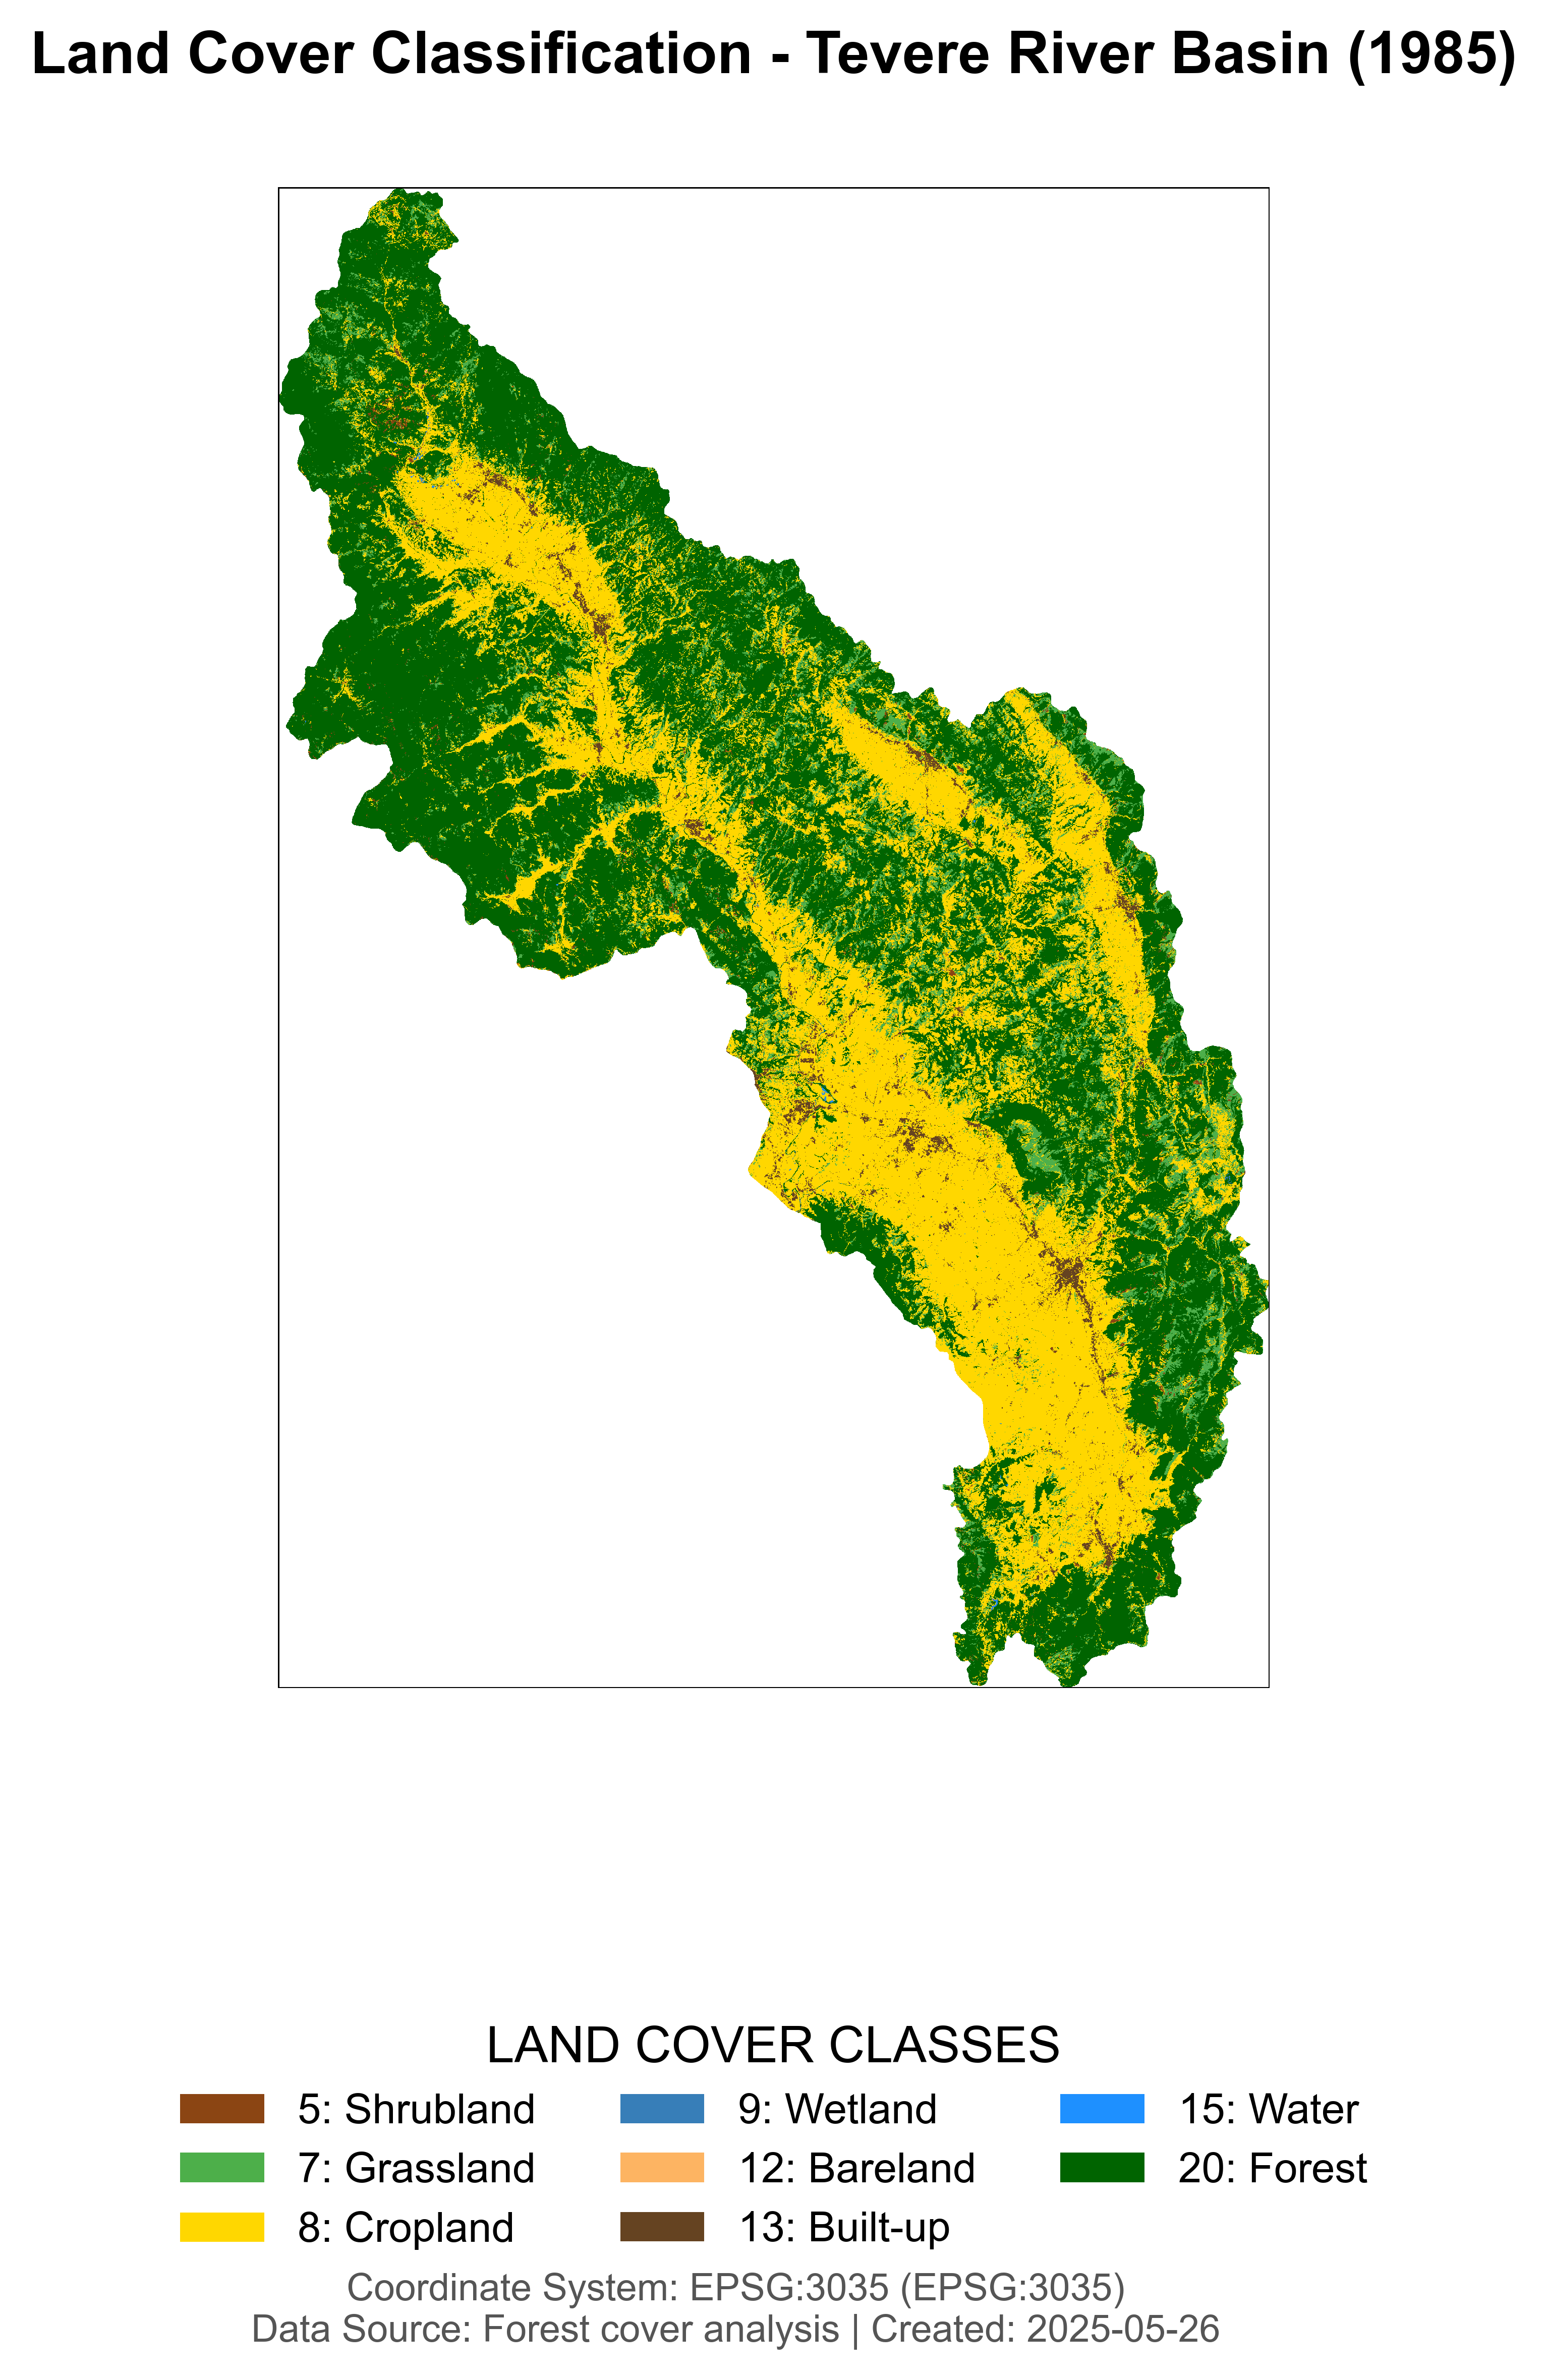

In [3]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.patches import Patch
from matplotlib import rcParams
import datetime
import os

# ======================
# CONFIGURATION
# ======================

# File paths
raster_path = '/Users/ghulamabbaszafari/Downloads/rest/Clippeed_GLC_tevere_basin/GLC_tevere_1985.tif'
output_path = '/Users/ghulamabbaszafari/Downloads/GLC_tevere_1985.png'

# Visualization parameters
DPI = 600  # High resolution for publication quality
FIG_SIZE = (10, 8)  # Inches (width, height)
FONT_SIZE = 11
TITLE_FONT_SIZE = 14

# Class definitions (excluding NoData/255)
CLASS_LABELS = {
    5: "Shrubland",
    7: "Grassland",
    8: "Cropland",
    9: "Wetland",
    11: "Lichens and Mosses",
    12: "Bareland",
    13: "Built-up",
    15: "Water",
    16: "Permanent ice and Snow",
    20: "Forest"
}

# Color mapping
COLOR_MAP = {
    "Shrubland": '#8B4513',            # SaddleBrown
    "Grassland": '#4DAF4A',            # Green (colorblind-friendly)
    "Cropland": '#FFD700',             # Gold
    "Wetland": '#377EB8',              # Blue (colorblind-friendly)
    "Lichens and Mosses": '#A9CDA9',   # Light green
    "Bareland": '#FDB462',             # Orange
    "Built-up": '#654321',             # Dark Brown
    "Water": '#1E90FF',                # Dodger Blue
    "Permanent ice and Snow": '#B0C4DE',  # Light Steel Blue
    "Forest": '#006400'               # Dark Green
}

# ======================
# DATA PROCESSING
# ======================

# Load raster data and mask null values (0 or 255)
with rasterio.open(raster_path) as src:
    data = src.read(1)
    bounds = src.bounds
    crs = src.crs
    
# Create mask for null values (0 or 255)
mask = np.logical_or(data == 0, data == 255)
masked_data = np.ma.masked_array(data, mask=mask)

# Identify which class labels are actually present (excluding nulls)
present_classes = sorted([v for v in CLASS_LABELS.keys() if v in np.unique(masked_data)])

# Prepare colormap and normalization
colors = [COLOR_MAP[CLASS_LABELS[v]] for v in present_classes]
cmap = ListedColormap(colors)
boundaries = [c - 0.5 for c in present_classes] + [present_classes[-1] + 0.5]
norm = BoundaryNorm(boundaries, len(present_classes))

# ======================
# VISUALIZATION
# ======================

# Use a valid built-in matplotlib style
plt.style.use('classic')

# Update font and figure settings
rcParams.update({
    'font.family': 'Arial',
    'font.size': FONT_SIZE,
    'axes.titlesize': TITLE_FONT_SIZE,
    'axes.titleweight': 'bold',
    'savefig.dpi': DPI,
    'savefig.bbox': 'tight',
    'savefig.pad_inches': 0.1
})

# Create figure
fig, ax = plt.subplots(figsize=FIG_SIZE, dpi=DPI, facecolor='white')
fig.subplots_adjust(bottom=0.22)

# Plot raster image with masked null values
im = ax.imshow(masked_data, cmap=cmap, norm=norm,
               extent=[bounds.left, bounds.right, bounds.bottom, bounds.top],
               interpolation='nearest')

# Draw boundary rectangle
boundary = plt.Rectangle((bounds.left, bounds.bottom),
                         bounds.right - bounds.left,
                         bounds.top - bounds.bottom,
                         fill=False, edgecolor='black', linewidth=0.6)
ax.add_patch(boundary)

# Hide axis
ax.set_axis_off()

# Add title
title = ax.set_title("Land Cover Classification - Tevere River Basin (1985)",
                     pad=20, fontsize=TITLE_FONT_SIZE, fontweight='bold')
title.set_position([0.5, 1.02])

# ======================
# LEGEND & ATTRIBUTION
# ======================

# Legend (only for present classes)
legend_elements = [
    Patch(facecolor=COLOR_MAP[CLASS_LABELS[v]],
          edgecolor='none',
          label=f"{v}: {CLASS_LABELS[v]}")
    for v in present_classes
]
legend = ax.legend(handles=legend_elements,
                   loc='upper center',
                   bbox_to_anchor=(0.5, -0.20),
                   ncol=3,
                   frameon=False,
                   title='LAND COVER CLASSES',
                   title_fontsize=FONT_SIZE + 1,
                   fontsize=FONT_SIZE - 1)

# Attribution text
attribution_text = (f"Coordinate System: EPSG:{crs.to_epsg()} ({crs.to_string()})\n"
                    f"Data Source: Forest cover analysis | Created: {datetime.date.today().strftime('%Y-%m-%d')}")
plt.figtext(0.5, 0.01, attribution_text,
            ha='center', fontsize=FONT_SIZE - 2, color='#555555')

# Adjust subplot params to avoid clipping legend/attribution
fig.subplots_adjust(bottom=0.28)

# ======================
# EXPORT & DISPLAY
# ======================

# Create output directory if it doesn't exist
os.makedirs(os.path.dirname(output_path), exist_ok=True)

# Save as high-quality PNG
plt.savefig(output_path, dpi=DPI, bbox_inches='tight', facecolor='white',
           metadata={'CreationDate': None, 'Software': 'Python/Matplotlib'})

plt.show()

In [8]:
import grass.script as gs
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch
from IPython.display import display
import os

# ======================
# INITIAL SETUP
# ======================

# Verify environment
print("Current GRASS Location:", gs.gisenv()['LOCATION_NAME'])
print("Current Mapset:", gs.gisenv()['MAPSET'])

# Color map for classes (using your exact colors)
color_map = {
    'Shrubland': '#8b4513',
    'Grassland': '#32cd32',
    'Cropland': '#ffd700',
    'Wetland': '#4682b4',
    'Lichens and mosses': '#a9cda9',
    'Bareland': '#c2b280',
    'Built-up': '#808080',
    'Water': '#1e90ff',
    'Permanent ice and Snow': '#b0c4de',
    'Forest': '#006400',
    'No data': '#ffffff'
}

# Class labels dictionary (using your tevere rasters' classes)
class_labels = {
    5: 'Shrubland',
    7: 'Grassland',
    8: 'Cropland',
    9: 'Wetland',
    11: 'Lichens and mosses',
    12: 'Bareland',
    13: 'Built-up',
    15: 'Water',
    16: 'Permanent ice and Snow',
    20: 'Forest',
    255: 'No data'
}

# ======================
# DATA PREPARATION
# ======================

# Identify all tevere land cover rasters
raster_list = gs.read_command('g.list', type='raster', pattern='tevere_lc_*').splitlines()
years = sorted([r.split('_')[-1] for r in raster_list if r.startswith('tevere_lc_')])
print("Available years:", years)

# ======================
# TRANSITION ANALYSIS
# ======================

def calculate_transitions(year1, year2):
    """Calculate land cover transitions between two years"""
    map1 = f"tevere_lc_{year1}"
    map2 = f"tevere_lc_{year2}"
    temp_map = f"temp_trans_{year1}_{year2}"
    
    print(f"\nAnalyzing transitions {year1} → {year2}")
    
    try:
        # Set computational region
        gs.run_command('g.region', raster=map1)
        
        # Create transition map (unique combinations of classes)
        gs.mapcalc(f"{temp_map} = {map1} * 1000 + {map2}", overwrite=True)
        
        # Calculate transition matrix
        stats = gs.read_command('r.stats', flags='cn', input=temp_map, sep=':')
        
        if not stats.strip():
            print("No overlapping valid pixels between the maps")
            return None
            
        # Process transition data
        transitions = []
        pixel_area_km2 = 0.09  # Assuming 300m resolution (0.3km × 0.3km)
        
        for line in stats.strip().splitlines():
            parts = line.split(':')
            if len(parts) == 2:
                try:
                    combined = int(parts[0])
                    from_class = combined // 1000
                    to_class = combined % 1000
                    count = int(parts[1])
                    
                    if count > 0 and from_class in class_labels and to_class in class_labels:
                        transitions.append({
                            'From': from_class,
                            'To': to_class,
                            'Count': count,
                            'Area_km2': count * pixel_area_km2,
                            'Period': f"{year1}-{year2}"
                        })
                except ValueError:
                    continue
        
        if not transitions:
            print("No valid transitions found")
            return None
            
        return pd.DataFrame(transitions)
        
    except Exception as e:
        print(f"Error processing transition: {str(e)}")
        return None
    finally:
        # Clean up temporary maps
        gs.run_command('g.remove', type='raster', name=temp_map, flags='f')

# Process all consecutive year pairs
all_transitions = []
for i in range(len(years)-1):
    df = calculate_transitions(years[i], years[i+1])
    if df is not None:
        all_transitions.append(df)

if not all_transitions:
    print("No valid transitions were processed.")
    exit()

# Combine all transitions
transitions_df = pd.concat(all_transitions)

# Add class labels
transitions_df['From_label'] = transitions_df['From'].map(class_labels)
transitions_df['To_label'] = transitions_df['To'].map(class_labels)

# ======================
# ANALYSIS & VISUALIZATION
# ======================

# 1. Save transition matrix with unique name
output_csv = 'tevere_basin_transitions_1985-2022.csv'
transitions_df.to_csv(output_csv, index=False)
print(f"\n✅ Saved transition matrix to '{output_csv}'")

# 2. Display top transitions
print("\nTop 10 transitions by area (km²):")
top_transitions = transitions_df.groupby(['From_label', 'To_label'])['Area_km2'].sum().nlargest(10)
print(top_transitions)

# 3. Plot transitions for specific classes with larger figures
def plot_class_transitions(class_code, ax=None):
    """Plot transitions for a specific land cover class"""
    if ax is None:
        fig, ax = plt.subplots(figsize=(14, 7))
    
    class_name = class_labels.get(class_code, f"Class {class_code}")
    class_color = color_map.get(class_name, '#333333')
    
    # Filter transitions originating from this class
    class_transitions = transitions_df[transitions_df['From'] == class_code]
    
    if class_transitions.empty:
        print(f"No transitions found for {class_name}")
        return
    
    # Group by period and destination class
    grouped = class_transitions.groupby(['Period', 'To_label'])['Area_km2'].sum().unstack()
    
    # Plot each transition type
    for to_class in grouped.columns:
        to_color = color_map.get(to_class, '#999999')
        grouped[to_class].plot(
            ax=ax,
            marker='o',
            markersize=8,
            linestyle='-',
            linewidth=2.5,
            color=to_color,
            label=f'→ {to_class}'
        )
    
    ax.set_title(f'Tevere Basin: Transitions from {class_name} (1985-2022)', fontsize=14)
    ax.set_xlabel('Time Period', fontsize=12)
    ax.set_ylabel('Area Changed (km²)', fontsize=12)
    ax.legend(title='Transition To', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    
    return ax

# Create output directory for plots
os.makedirs('tevere_transition_plots', exist_ok=True)

# Plot and save transitions for major classes
for class_code in [20, 8, 13, 7, 5]:  # Forest, Cropland, Built-up, Grassland, Shrubland
    class_name = class_labels[class_code]
    fig, ax = plt.subplots(figsize=(14, 7))
    plot_class_transitions(class_code, ax=ax)
    plot_path = f"tevere_transition_plots/transitions_from_{class_name.lower()}.png"
    plt.savefig(plot_path, dpi=300, bbox_inches='tight')
    plt.close()
    print(f"Saved {plot_path}")

# 4. Create and save transition matrix heatmap
def create_transition_heatmap():
    """Create a heatmap of all transitions"""
    # Create pivot table of transition areas
    pivot = transitions_df.pivot_table(
        index='From_label',
        columns='To_label',
        values='Area_km2',
        aggfunc='sum',
        fill_value=0
    )
    
    # Reorder by class importance
    class_order = ['Forest', 'Cropland', 'Grassland', 'Shrubland', 
                   'Built-up', 'Water', 'Wetland', 'Bareland',
                   'Lichens and mosses', 'Permanent ice and Snow']
    pivot = pivot.reindex(index=class_order, columns=class_order, fill_value=0)
    
    # Create plot
    fig, ax = plt.subplots(figsize=(14, 12))
    
    # Use log scale for better visualization
    im = ax.imshow(np.log1p(pivot.values), cmap='YlOrRd')
    
    # Add labels
    ax.set_xticks(np.arange(len(pivot.columns)))
    ax.set_yticks(np.arange(len(pivot.index)))
    ax.set_xticklabels(pivot.columns, rotation=45, ha='right', fontsize=10)
    ax.set_yticklabels(pivot.index, fontsize=10)
    
    # Add colorbar
    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.set_label('Log(Area km² + 1)', fontsize=12)
    
    # Add cell values
    for i in range(len(pivot.index)):
        for j in range(len(pivot.columns)):
            val = pivot.iloc[i, j]
            if val > 0:
                ax.text(j, i, f"{val:,.0f}", ha="center", va="center", color="black", fontsize=8)
    
    ax.set_title('Tevere Basin Land Cover Transition Matrix (1985-2022)', fontsize=14)
    plt.tight_layout()
    
    return fig, pivot

# Generate and save heatmap
heatmap_fig, transition_matrix = create_transition_heatmap()
heatmap_path = "tevere_transition_plots/transition_matrix_heatmap.png"
heatmap_fig.savefig(heatmap_path, dpi=300, bbox_inches='tight')
plt.close(heatmap_fig)
print(f"\nSaved transition matrix heatmap to '{heatmap_path}'")

# Display final summary
print("\nAnalysis complete! Created these outputs:")
print(f"- Transition CSV: {output_csv}")
print("- Individual transition plots for major classes")
print(f"- Transition matrix heatmap")




Current GRASS Location: my_location
Current Mapset: PERMANENT
Available years: ['1985', '1990', '1995', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

Analyzing transitions 1985 → 1990



Removing raster <temp_trans_1985_1990>



Analyzing transitions 1990 → 1995



Removing raster <temp_trans_1990_1995>



Analyzing transitions 1995 → 2000



Removing raster <temp_trans_1995_2000>



Analyzing transitions 2000 → 2001



Removing raster <temp_trans_2000_2001>



Analyzing transitions 2001 → 2002



Removing raster <temp_trans_2001_2002>



Analyzing transitions 2002 → 2003



Removing raster <temp_trans_2002_2003>



Analyzing transitions 2003 → 2004



Removing raster <temp_trans_2003_2004>



Analyzing transitions 2004 → 2005



Removing raster <temp_trans_2004_2005>



Analyzing transitions 2005 → 2006



Removing raster <temp_trans_2005_2006>



Analyzing transitions 2006 → 2007



Removing raster <temp_trans_2006_2007>



Analyzing transitions 2007 → 2008



Removing raster <temp_trans_2007_2008>



Analyzing transitions 2008 → 2009



Removing raster <temp_trans_2008_2009>



Analyzing transitions 2009 → 2010



Removing raster <temp_trans_2009_2010>



Analyzing transitions 2010 → 2011



Removing raster <temp_trans_2010_2011>



Analyzing transitions 2011 → 2012



Removing raster <temp_trans_2011_2012>



Analyzing transitions 2012 → 2013



Removing raster <temp_trans_2012_2013>



Analyzing transitions 2013 → 2014



Removing raster <temp_trans_2013_2014>



Analyzing transitions 2014 → 2015



Removing raster <temp_trans_2014_2015>



Analyzing transitions 2015 → 2016



Removing raster <temp_trans_2015_2016>



Analyzing transitions 2016 → 2017



Removing raster <temp_trans_2016_2017>



Analyzing transitions 2017 → 2018



Removing raster <temp_trans_2017_2018>



Analyzing transitions 2018 → 2019



Removing raster <temp_trans_2018_2019>



Analyzing transitions 2019 → 2020



Removing raster <temp_trans_2019_2020>



Analyzing transitions 2020 → 2021



Removing raster <temp_trans_2020_2021>



Analyzing transitions 2021 → 2022



Removing raster <temp_trans_2021_2022>



✅ Saved transition matrix to 'tevere_basin_transitions_1985-2022.csv'

Top 10 transitions by area (km²):
From_label  To_label 
Forest      Forest       5131510.29
Cropland    Cropland     3936084.21
Grassland   Grassland     640928.52
Built-up    Built-up      331071.39
Shrubland   Shrubland      77250.51
Forest      Cropland       37755.72
Cropland    Forest         29065.23
Grassland   Cropland       26773.02
Cropland    Built-up       25480.35
            Grassland      23652.18
Name: Area_km2, dtype: float64
Saved tevere_transition_plots/transitions_from_forest.png
Saved tevere_transition_plots/transitions_from_cropland.png
Saved tevere_transition_plots/transitions_from_built-up.png
Saved tevere_transition_plots/transitions_from_grassland.png
Saved tevere_transition_plots/transitions_from_shrubland.png

Saved transition matrix heatmap to 'tevere_transition_plots/transition_matrix_heatmap.png'

Analysis complete! Created these outputs:
- Transition CSV: tevere_basin_transitions_198

In [9]:
import pandas as pd

# Load the data
full_df = pd.read_csv("/Users/ghulamabbaszafari/Downloads/Abbas new/Thesis_project/data/Tevere_clipped_GLC_FCs30D/tevere_basin_transitions_1985-2022.csv")

# Display the full DataFrame
display(full_df)

# Show basic statistics
print("grassdata/my_location/PERMANENT/cell/tevere_basin_transitions_1985-2022.csv")
print(full_df.describe())

# Show the first few rows
print("\nFirst 5 transitions:")
print(full_df.head())


From  To    Count   Area_km2     Period From_label            To_label
0        5   5    30888    2779.92  1985-1990  Shrubland           Shrubland
1        5   7      458      41.22  1985-1990  Shrubland           Grassland
2        5   8      735      66.15  1985-1990  Shrubland            Cropland
3        5   9       64       5.76  1985-1990  Shrubland             Wetland
4        5  12        4       0.36  1985-1990  Shrubland            Bareland
...    ...  ..      ...        ...        ...        ...                 ...
1664    20  11        3       0.27  2021-2022     Forest  Lichens and mosses
1665    20  12        5       0.45  2021-2022     Forest            Bareland
1666    20  13      172      15.48  2021-2022     Forest            Built-up
1667    20  15       30       2.70  2021-2022     Forest               Water
1668    20  20  2290574  206151.66  2021-2022     Forest              Forest

[1669 rows x 7 columns]

grassdata/my_location/PERMANENT/cell/tevere_basin_transitions_1985-2022.csv
              From           To         Count       Area_km2
count  1669.000000  1669.000000  1.669000e+03    1669.000000
mean     11.147993    11.170761  6.897163e+04    6207.446675
std       4.522820     4.514985  3.474472e+05   31270.244720
min       5.000000     5.000000  1.000000e+00       0.090000
25%       8.000000     8.000000  1.000000e+01       0.900000
50%      11.000000    11.000000  9.300000e+01       8.370000
75%      13.000000    13.000000  1.726000e+03     155.340000
max      20.000000    20.000000  2.359632e+06  212366.880000

First 5 transitions:
   From  To  Count  Area_km2     Period From_label   To_label
0     5   5  30888   2779.92  1985-1990  Shrubland  Shrubland
1     5   7    458     41.22  1985-1990  Shrubland  Grassland
2     5   8    735     66.15  1985-1990  Shrubland   Cropland
3     5   9     64      5.76  1985-1990  Shrubland    Wetland
4     5  12      4      0.36  1985-1990  Sh

In [10]:
# Total area changed per period
period_totals = full_df.groupby('Period')['Area_km2'].sum().reset_index()
print("\nTotal area changed per period:")
display(period_totals)

# Most common transitions
top_transitions = full_df.groupby(['From', 'To'])['Area_km2'].sum().sort_values(ascending=False)
print("\nTop 10 transitions by area:")
display(top_transitions.head(10))




Total area changed per period:


Period   Area_km2
0   1985-1990  414409.14
1   1990-1995  414409.14
2   1995-2000  414409.14
3   2000-2001  414409.14
4   2001-2002  414409.14
5   2002-2003  414409.14
6   2003-2004  414409.14
7   2004-2005  414409.14
8   2005-2006  414409.14
9   2006-2007  414409.14
10  2007-2008  414409.14
11  2008-2009  414409.14
12  2009-2010  414409.14
13  2010-2011  414409.14
14  2011-2012  414409.14
15  2012-2013  414409.14
16  2013-2014  414409.14
17  2014-2015  414409.14
18  2015-2016  414409.14
19  2016-2017  414409.14
20  2017-2018  414409.14
21  2018-2019  414409.14
22  2019-2020  414409.14
23  2020-2021  414409.14
24  2021-2022  414409.14


Top 10 transitions by area:


From  To
20    20    5131510.29
8     8     3936084.21
7     7      640928.52
13    13     331071.39
5     5       77250.51
20    8       37755.72
8     20      29065.23
7     8       26773.02
8     13      25480.35
      7       23652.18
Name: Area_km2, dtype: float64

In [11]:
# Focus on a specific class (e.g., class 20 - Forest)
forest_transitions = full_df[full_df['From'] == 20]
print("\nAll transitions from Forest (class 20):")
display(forest_transitions)

# Forest gain/loss over time
forest_net_change = forest_transitions.groupby(['Period', 'To'])['Area_km2'].sum().unstack()
print("\nForest transitions over time:")
display(forest_net_change)

# Class labels
class_labels = {
    5: 'Shrubland',
    7: 'Grassland',
    8: 'Cropland',
    9: 'Wetland',
    11: 'Lichens and mosses',
    12: 'Bareland',
    13: 'Built-up',
    15: 'Water',
    16: 'Permanent ice and Snow',
    20: 'Forest',
    255: 'No data'
}



All transitions from Forest (class 20):


From  To    Count   Area_km2     Period From_label            To_label
43      20   5     2035     183.15  1985-1990     Forest           Shrubland
44      20   7     9692     872.28  1985-1990     Forest           Grassland
45      20   8    14637    1317.33  1985-1990     Forest            Cropland
46      20   9      204      18.36  1985-1990     Forest             Wetland
47      20  12        1       0.09  1985-1990     Forest            Bareland
...    ...  ..      ...        ...        ...        ...                 ...
1664    20  11        3       0.27  2021-2022     Forest  Lichens and mosses
1665    20  12        5       0.45  2021-2022     Forest            Bareland
1666    20  13      172      15.48  2021-2022     Forest            Built-up
1667    20  15       30       2.70  2021-2022     Forest               Water
1668    20  20  2290574  206151.66  2021-2022     Forest              Forest

[221 rows x 7 columns]


Forest transitions over time:


To              5        7        8      9     11    12     13     15  \
Period                                                                  
1985-1990   183.15   872.28  1317.33  18.36   NaN  0.09   1.53  15.84   
1990-1995   166.50  1044.36  2179.17  17.73   NaN  0.09   0.63  28.62   
1995-2000   663.30  1180.44  7910.46  77.13  0.99  9.18  32.58  17.64   
2000-2001   171.63   192.69  1361.61  10.80   NaN  0.90  18.81   0.45   
2001-2002  1241.46  2086.56  5922.09  14.13  2.52  4.05  57.24   9.00   
2002-2003   380.25  1832.76  5280.03  31.86  1.89  2.07  54.99   6.12   
2003-2004    98.19   154.71   734.40  14.31  0.54  1.17  16.11   3.87   
2004-2005    64.89   128.43   658.44   6.30  0.27  0.90  18.72  13.14   
2005-2006   109.80   128.43   607.50   9.63  0.09  0.90  13.68   0.09   
2006-2007    85.68    85.23   408.60   6.84  0.54  0.72  19.80   0.72   
2007-2008   179.73   112.32   501.75   6.39  0.72  0.18  12.96   2.16   
2008-2009   139.59   144.54   683.28  21.78  0.36  0.72  16.92  37.08   
2009-2010   158.13   215.01   815.40   4.86  0.99  0.54  15.12   0.36   
2010-2011   109.89   115.92   540.00  25.38  0.90  0.27  15.66   0.18   
2011-2012    96.75   206.55   853.47  29.88  0.36  0.45  16.11   0.63   
2012-2013   167.49   220.95   852.30   9.09  0.18  0.63  22.86   0.45   
2013-2014   154.89   138.06   640.62   5.13  1.26  0.18  14.94   2.34   
2014-2015   165.15   220.41   827.10   7.83  0.63  0.27  20.88   2.07   
2015-2016   250.20   304.38  1058.49   5.94  0.18  0.27  19.08   1.08   
2016-2017   150.57   181.53   641.79  12.96  0.36  0.27  20.52   0.45   
2017-2018   306.00   220.32   702.54   9.18  0.45  0.81  20.52   0.72   
2018-2019   307.98   239.04   746.73  10.17  1.08  0.27  16.47   4.05   
2019-2020   233.64   277.20   938.88  15.75  0.90   NaN  20.61   1.53   
2020-2021   212.85   321.03  1109.07  14.58  0.63  0.36  22.86   0.90   
2021-2022   104.94   142.02   464.67  12.87  0.27  0.45  15.48   2.70   

To                20  
Period                
1985-1990  212366.88  
1990-1995  211271.22  
1995-2000  203033.79  
2000-2001  207251.46  
2001-2002  199087.56  
2002-2003  199149.93  
2003-2004  206207.10  
2004-2005  205938.63  
2005-2006  205617.96  
2006-2007  205710.03  
2007-2008  205574.85  
2008-2009  205227.90  
2009-2010  204884.64  
2010-2011  204824.79  
2011-2012  204073.11  
2012-2013  203516.28  
2013-2014  204412.86  
2014-2015  204761.61  
2015-2016  204832.53  
2016-2017  205368.03  
2017-2018  205420.14  
2018-2019  205554.96  
2019-2020  205871.13  
2020-2021  205401.24  
2021-2022  206151.66

In [12]:
# Create a full transition matrix
transition_matrix = full_df.pivot_table(
    index='From', 
    columns='To', 
    values='Area_km2', 
    aggfunc='sum',
    fill_value=0
)
print("\nComplete transition matrix:")
display(transition_matrix)


Complete transition matrix:


To          5          7           8        9        11      12         13  \
From                                                                         
5     77250.51    2614.86     5588.19    58.23   103.59   21.87    1337.76   
7      3243.87  640928.52    26773.02     3.96   127.71    1.26     898.38   
8      6257.61   23652.18  3936084.21   385.38   181.08   36.27   25480.35   
9        43.02       0.63      211.77  5810.67     0.09    8.28      18.45   
11       67.23     117.00      138.96     0.09  1552.95    2.25     151.83   
12       24.30       0.90       28.71    13.41     1.08  555.57      31.32   
13     1084.05     734.04    19090.89    13.59   152.19   25.29  331071.39   
15        3.78       1.08       56.61   587.88     0.09    9.63       4.68   
20     5902.65   10765.17    37755.72   398.88    16.11   25.74     505.08   

To          15          20  
From                        
5        15.84     5275.89  
7         0.81    12183.84  
8       244.08    29065.23  
9       710.01      340.29  
11        0.09       19.89  
12       12.87       17.01  
13        3.51      503.91  
15    12080.97       79.92  
20      152.19  5131510.29

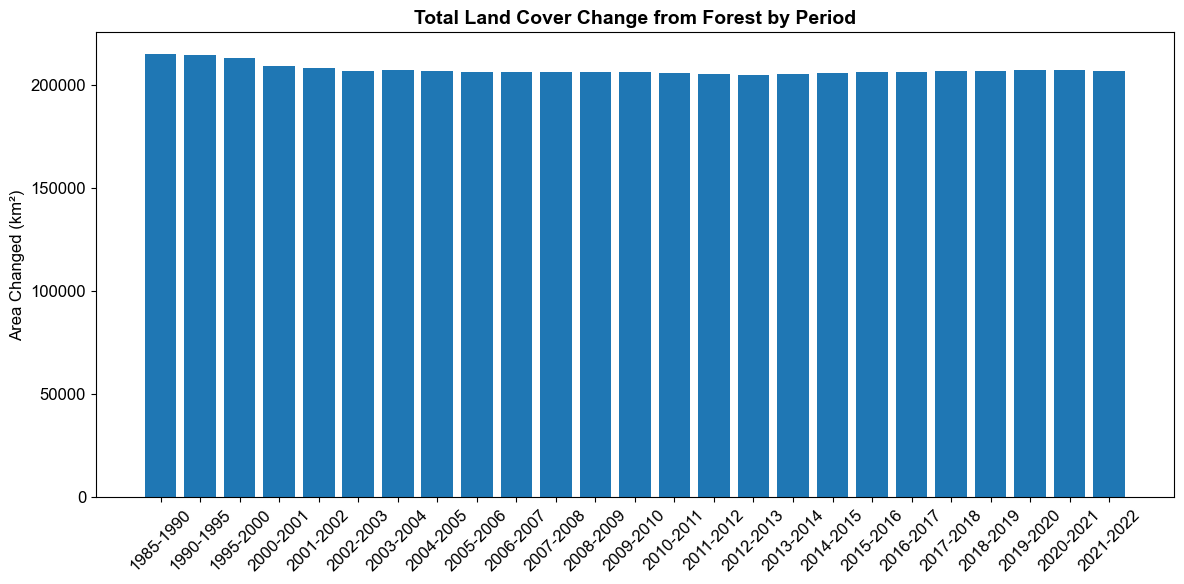

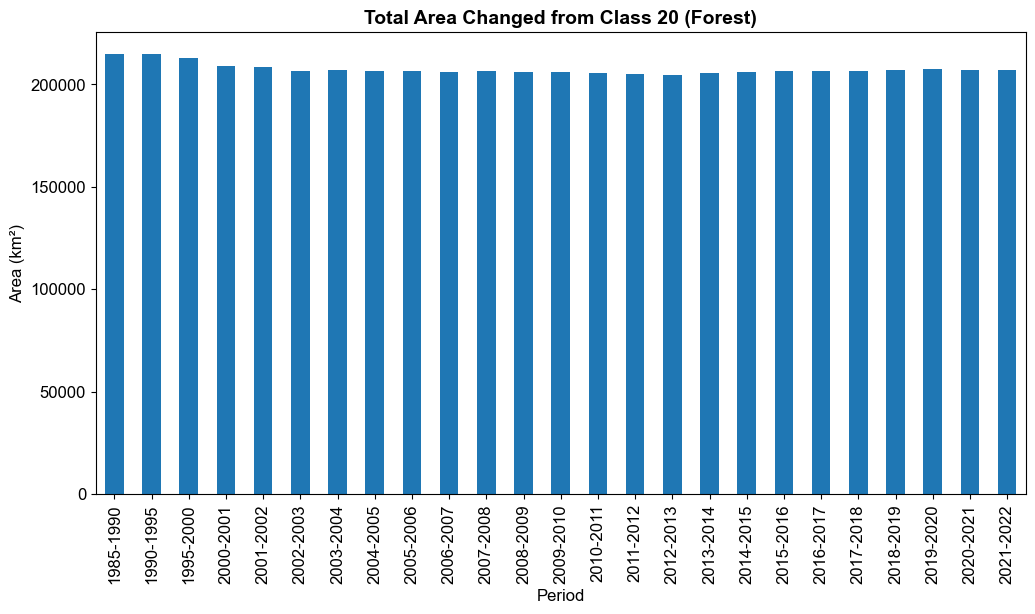

In [13]:
import grass.script as gs
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import FuncFormatter, StrMethodFormatter
from matplotlib.patches import Patch
from textwrap import wrap
# Compute total area changed from Forest (class 20) per period
period_totals = forest_transitions.groupby('Period')['Area_km2'].sum().reset_index()

# Plot total change over time
plt.figure(figsize=(12, 6))
plt.bar(period_totals['Period'], period_totals['Area_km2'])
plt.title('Total Land Cover Change from Forest by Period')
plt.ylabel('Area Changed (km²)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot net change for specific class
class_of_interest = 20  # Forest
class_changes = full_df.groupby(['Period', 'From'])['Area_km2'].sum().unstack()
class_changes[class_of_interest].plot(
    kind='bar', 
    figsize=(12, 6),
    title=f'Total Area Changed from Class {class_of_interest} (Forest)'
)
plt.ylabel('Area (km²)')
plt.show()



Persistence (no change) by class:


From
20    5131510.29
8     3936084.21
7      640928.52
13     331071.39
5       77250.51
15      12080.97
9        5810.67
11       1552.95
12        555.57
Name: Area_km2, dtype: float64

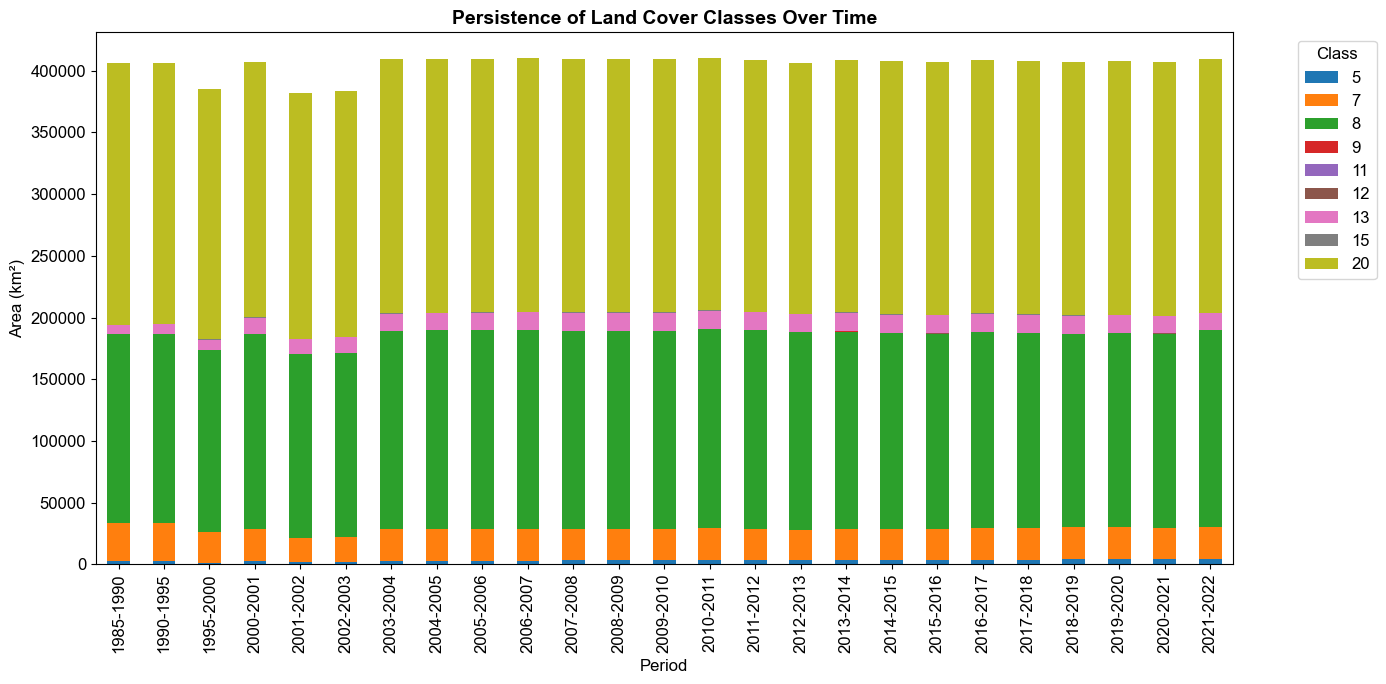

In [14]:
# Calculate persistence (when From == To)
persistence = full_df[full_df['From'] == full_df['To']]
print("\nPersistence (no change) by class:")
persistence_stats = persistence.groupby('From')['Area_km2'].sum().sort_values(ascending=False)
display(persistence_stats)

# Plot persistence over time
persistence.groupby(['Period', 'From'])['Area_km2'].sum().unstack().plot(
    kind='bar', 
    stacked=True,
    figsize=(14, 7),
    title='Persistence of Land Cover Classes Over Time'
)
plt.ylabel('Area (km²)')
plt.legend(title='Class', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

In [15]:
# Calculate transition probabilities
transition_prob = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)
print("\nTransition probabilities:")
display(transition_prob)


Transition probabilities:


To          5         7         8         9         11        12        13  \
From                                                                         
5     0.837252  0.028340  0.060566  0.000631  0.001123  0.000237  0.014499   
7     0.004741  0.936809  0.039133  0.000006  0.000187  0.000002  0.001313   
8     0.001556  0.005882  0.978788  0.000096  0.000045  0.000009  0.006336   
9     0.006023  0.000088  0.029646  0.813454  0.000013  0.001159  0.002583   
11    0.032790  0.057065  0.067776  0.000044  0.757429  0.001097  0.074053   
12    0.035466  0.001314  0.041902  0.019572  0.001576  0.810850  0.045711   
13    0.003074  0.002081  0.054131  0.000039  0.000432  0.000072  0.938733   
15    0.000295  0.000084  0.004414  0.045840  0.000007  0.000751  0.000365   
20    0.001138  0.002075  0.007279  0.000077  0.000003  0.000005  0.000097   

To          15        20  
From                      
5     0.000172  0.057181  
7     0.000001  0.017808  
8     0.000061  0.007228  
9     0.099396  0.047638  
11    0.000044  0.009701  
12    0.018784  0.024826  
13    0.000010  0.001429  
15    0.942012  0.006232  
20    0.000029  0.989296

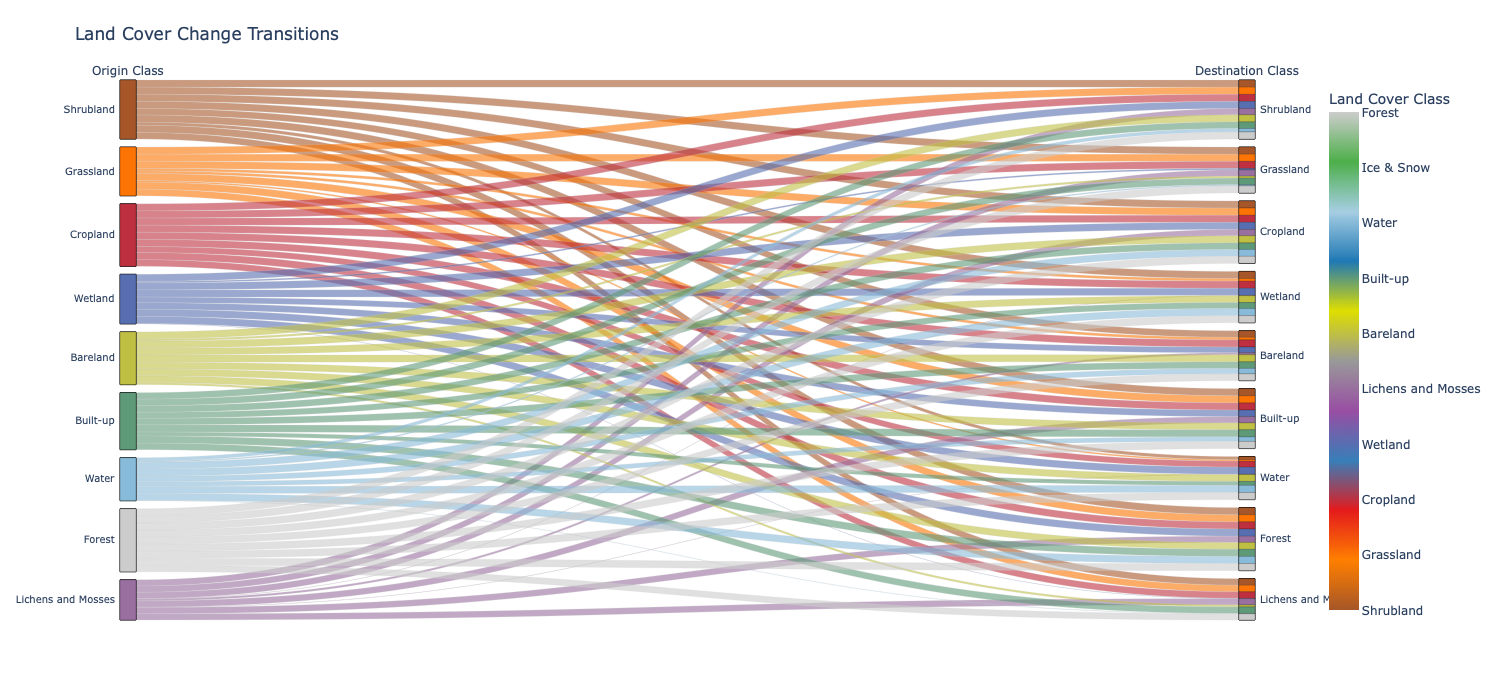

In [16]:
import pandas as pd
import plotly.express as px

# Load data
full_df = pd.read_csv('/Users/ghulamabbaszafari/Downloads/Abbas new/Thesis_project/data/Tevere_clipped_GLC_FCs30D/tevere_basin_transitions_1985-2022.csv')

# Land cover class labels and colors
class_labels = {
    5: 'Shrubland', 7: 'Grassland', 8: 'Cropland', 9: 'Wetland',
    11: 'Lichens and Mosses', 12: 'Bareland', 13: 'Built-up', 15: 'Water',
    16: 'Ice & Snow', 20: 'Forest', 255: 'No Data'
}

class_colors = {
    'Shrubland': '#a65628',
    'Grassland': '#ff7f00',
    'Cropland': '#e41a1c',
    'Wetland': '#377eb8',
    'Lichens and Mosses': '#984ea3',
    'Bareland': '#999999',
    'Built-up': '#dede00',
    'Water': '#1f78b4',
    'Ice & Snow': '#a6cee3',
    'Forest': '#4daf4a',
    'No Data': '#cccccc'
}

# Summarize transitions
alluvial_df = full_df.groupby(['Period', 'From', 'To'])['Area_km2'].sum().reset_index()

# Map class labels to names
alluvial_df['From_Label'] = alluvial_df['From'].map(class_labels)
alluvial_df['To_Label'] = alluvial_df['To'].map(class_labels)

# Create a numeric ID for each class for color mapping
class_ids = {label: i for i, label in enumerate(class_labels.values())}
alluvial_df['Class_ID'] = alluvial_df['From_Label'].map(class_ids)

# Create custom color scale matching our class colors
color_scale = [[i/(len(class_colors)-1), color] for i, color in enumerate(class_colors.values())]

# Plot with correct color mapping
fig = px.parallel_categories(
    alluvial_df,
    dimensions=['From_Label', 'To_Label'],
    color='Class_ID',
    color_continuous_scale=color_scale,
    labels={'From_Label': 'Origin Class', 'To_Label': 'Destination Class'},
    width=1200,
    height=700,
    title="Land Cover Change Transitions"
)

# Update layout and colorbar
fig.update_layout(
    coloraxis_colorbar=dict(
        title='Land Cover Class',
        tickvals=list(range(len(class_colors))),
        ticktext=list(class_colors.keys())
    ),
    hovermode='closest',
    margin=dict(l=80, r=80, t=80, b=80)
)

# Only update the shape parameter
fig.update_traces(
    line_shape='hspline',  # Makes the connections curved
    arrangement='freeform'  # Allows categories to move freely
)

# Show plot
fig.show()




In [17]:
import pandas as pd
import numpy as np

# Load your transition matrix
transitions = pd.read_csv('tevere_basin_transitions_1985-2022.csv')

# Calculate gross gains, losses, and net changes for each class
def calculate_changes(transitions):
    classes = transitions['From_label'].unique()
    changes = {}
    
    for lc_class in classes:
        gross_loss = transitions[transitions['From_label'] == lc_class]['Area_km2'].sum()
        gross_gain = transitions[transitions['To_label'] == lc_class]['Area_km2'].sum()
        net_change = gross_gain - gross_loss
        
        changes[lc_class] = {
            'Gross Loss (km²)': gross_loss,
            'Gross Gain (km²)': gross_gain,
            'Net Change (km²)': net_change
        }
    
    return pd.DataFrame(changes).T

changes_df = calculate_changes(transitions)
print(changes_df)



                    Gross Loss (km²)  Gross Gain (km²)  Net Change (km²)
Shrubland                   92266.74          93877.02           1610.28
Grassland                  684161.37         678814.38          -5346.99
Cropland                  4021386.39        4025728.08           4341.69
Wetland                      7143.21           7272.09            128.88
Bareland                      685.17            686.16              0.99
Built-up                   352678.86         359499.24           6820.38
Water                       12824.64          13220.37            395.73
Forest                    5187031.83        5178996.27          -8035.56
Lichens and mosses           2050.29           2134.89             84.60


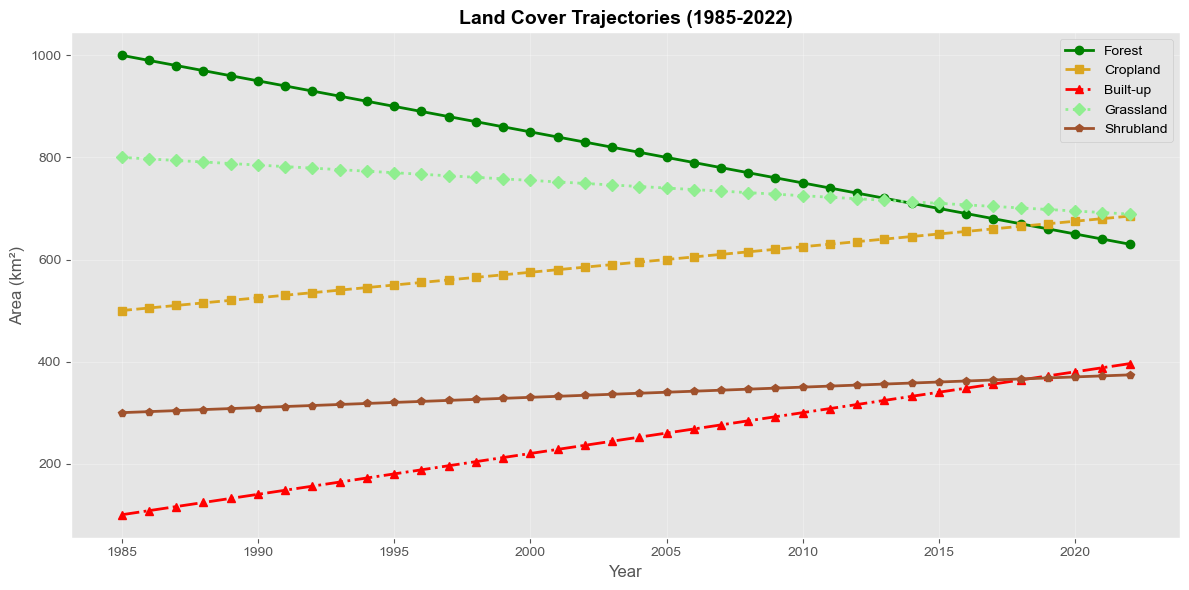

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Example data structure - REPLACE THIS WITH YOUR ACTUAL DATA
annual_areas = pd.DataFrame({
    'Year': range(1985, 2023),
    'Forest': [1000 - i*10 for i in range(38)],  # Example decreasing trend
    'Cropland': [500 + i*5 for i in range(38)],  # Example increasing trend
    'Built-up': [100 + i*8 for i in range(38)],  # Example increasing trend
    'Grassland': [800 - i*3 for i in range(38)], # Example decreasing trend
    'Shrubland': [300 + i*2 for i in range(38)]  # Example increasing trend
})

# Plot settings
plt.figure(figsize=(12, 6))

# Use a built-in style instead of seaborn
plt.style.use('ggplot')  # Other options: 'default', 'classic', 'bmh', 'dark_background'

# Plot each land cover class with distinct colors and markers
styles = {
    'Forest': {'color': 'green', 'marker': 'o', 'linestyle': '-'},
    'Cropland': {'color': 'goldenrod', 'marker': 's', 'linestyle': '--'},
    'Built-up': {'color': 'red', 'marker': '^', 'linestyle': '-.'},
    'Grassland': {'color': 'lightgreen', 'marker': 'D', 'linestyle': ':'},
    'Shrubland': {'color': 'sienna', 'marker': 'p', 'linestyle': '-'}
}

for lc_class in ['Forest', 'Cropland', 'Built-up', 'Grassland', 'Shrubland']:
    plt.plot(annual_areas['Year'], 
             annual_areas[lc_class], 
             label=lc_class,
             linewidth=2,
             **styles[lc_class])

# Formatting
plt.xlabel('Year', fontsize=12)
plt.ylabel('Area (km²)', fontsize=12)
plt.title('Land Cover Trajectories (1985-2022)', fontsize=14)
plt.legend(fontsize=10, framealpha=1)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Save and show
plt.savefig('lc_trajectories.png', dpi=300, bbox_inches='tight')
plt.show()

Transition Matrix (% of total transitions):
To_label            Bareland  Built-up  Cropland  Forest  Grassland  \
From_label                                                            
Bareland                0.01      0.00      0.00    0.00       0.00   
Built-up                0.00      3.20      0.18    0.00       0.01   
Cropland                0.00      0.25     37.99    0.28       0.23   
Forest                  0.00      0.00      0.36   49.53       0.10   
Grassland               0.00      0.01      0.26    0.12       6.19   
Lichens and mosses      0.00      0.00      0.00    0.00       0.00   
Shrubland               0.00      0.01      0.05    0.05       0.03   
Water                   0.00      0.00      0.00    0.00       0.00   
Wetland                 0.00      0.00      0.00    0.00       0.00   

To_label            Lichens and mosses  Shrubland  Water  Wetland  
From_label                                                         
Bareland                          0.00

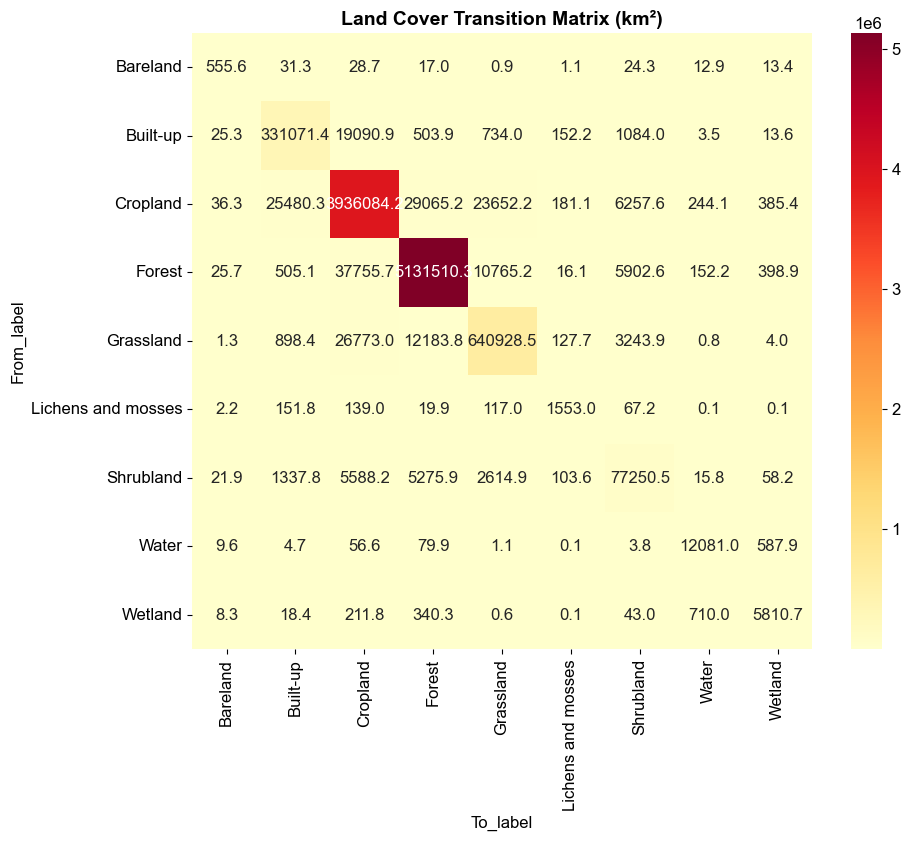

In [19]:
# Create a pivot table for transitions
transition_matrix = transitions.pivot_table(
    index='From_label',
    columns='To_label',
    values='Area_km2',
    aggfunc='sum',
    fill_value=0
)

# Normalize to percentages of total transitions
total_transitions = transition_matrix.sum().sum()
transition_pct = (transition_matrix / total_transitions) * 100

print("Transition Matrix (% of total transitions):")
print(transition_pct.round(2))

# Plot as heatmap
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(transition_matrix, annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('Land Cover Transition Matrix (km²)')
plt.savefig('transition_matrix_heatmap.png')
plt.show()

In [27]:
import pandas as pd

# Load your data (update path if needed)
try:
    df = pd.read_csv('tevere_basin_transitions_1985-2022.csv')
    print("Columns in your file:", df.columns.tolist())
    print("\nFirst 3 rows:")
    print(df.head(3))
except Exception as e:
    print("Error loading file:", e)

Columns in your file: ['From', 'To', 'Count', 'Area_km2', 'Period', 'From_label', 'To_label']

First 3 rows:
   From  To  Count  Area_km2     Period From_label   To_label
0     5   5  30888   2779.92  1985-1990  Shrubland  Shrubland
1     5   7    458     41.22  1985-1990  Shrubland  Grassland
2     5   8    735     66.15  1985-1990  Shrubland   Cropland


Gross Losses (km²/year):
From_label  Bareland  Built-up  Cropland   Forest  Grassland  \
Year                                                           
1985           12.60      0.09   3832.92  2408.58    1396.89   
1990            4.77      0.18   2699.19  3437.10    1597.86   
1995            9.90    396.18   8859.33  9891.72    7974.99   
2000            3.87    740.70   2527.83  1756.89    1510.92   
2001           11.25   2156.22  12486.06  9337.05    7108.02   
2002            9.18   1814.58  11797.92  7589.97    6587.46   
2003            4.05   1054.53   1619.01  1023.30     827.46   
2004            4.23    860.22   1819.35   891.09     614.88   
2005            3.06    707.04   2155.23   870.12     511.20   
2006            5.49    756.00   1951.47   608.13     476.73   
2007            3.33    628.65   2057.22   816.21     763.11   
2008            3.78    938.97   1754.10  1044.27     820.62   
2009            1.80    790.38   1911.96  1210.41     618.75   
2010           

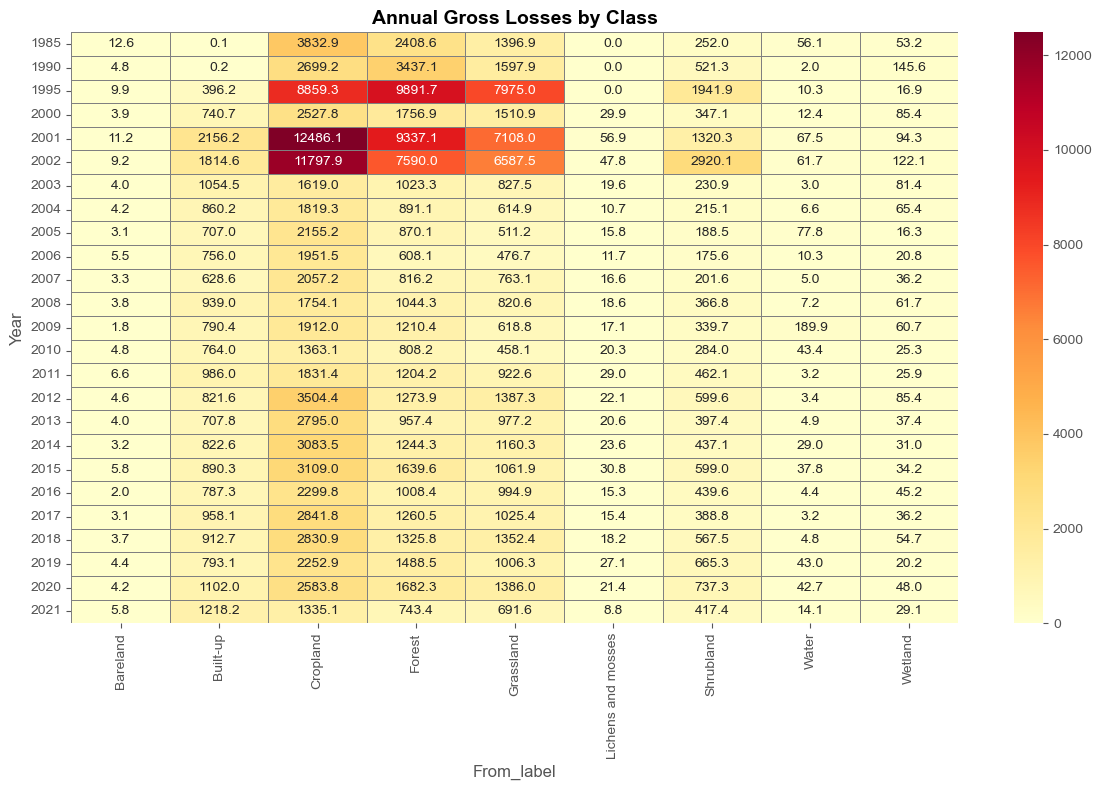

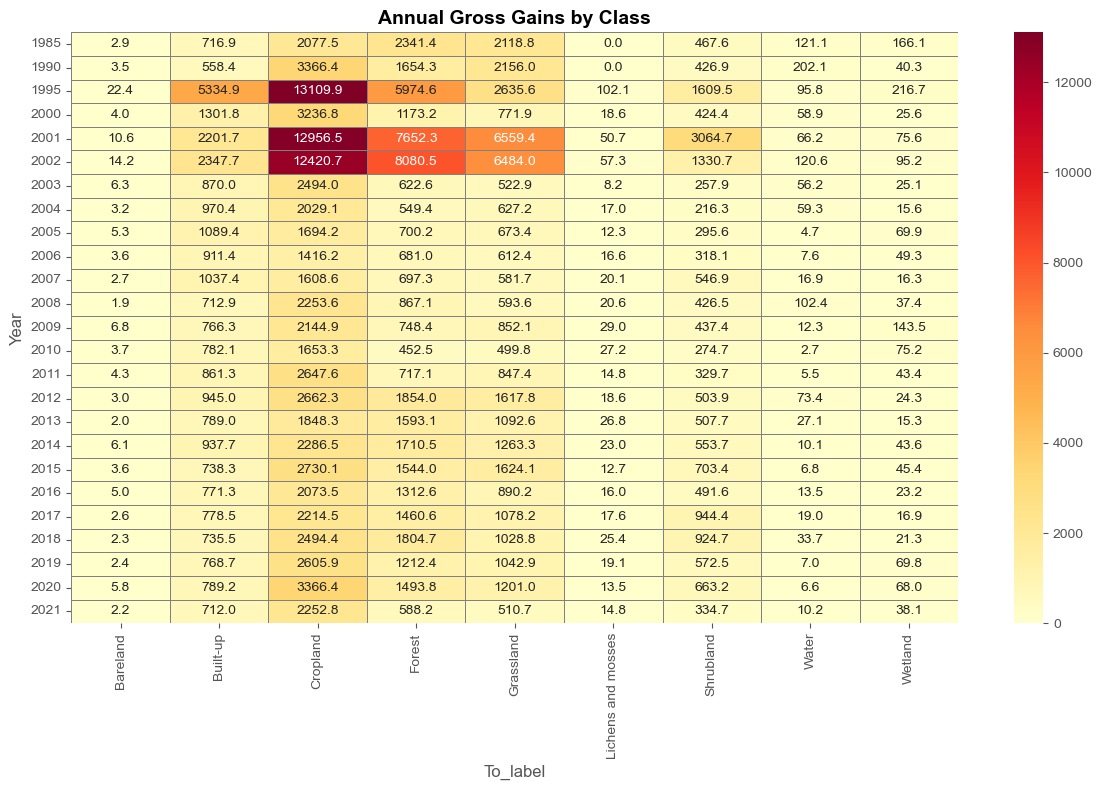

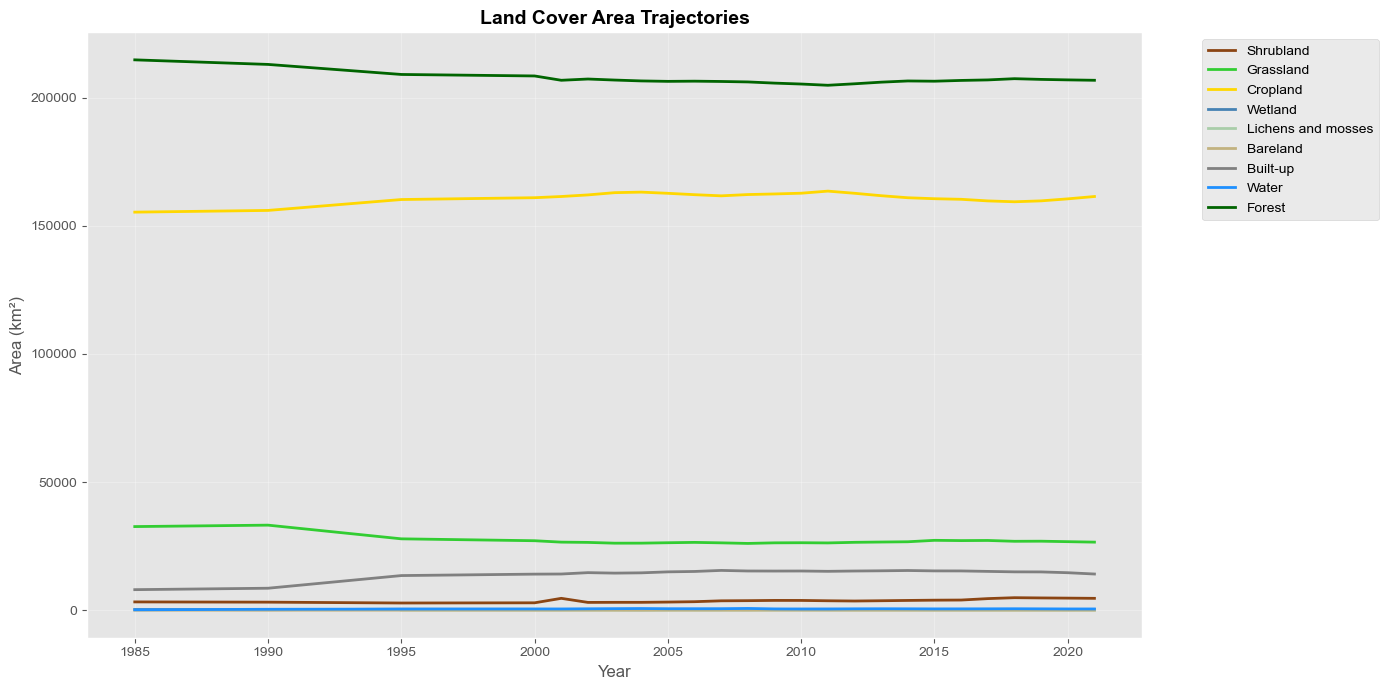


Analysis complete. Created these outputs:
- gross_losses_by_year.csv
- gross_gains_by_year.csv
- annual_gross_losses_by_class.png
- annual_gross_gains_by_class.png
- land_cover_trajectories.png


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, ConnectionPatch

# ======================
# YOUR DATA CONFIGURATION
# ======================

# Your exact class definitions
color_map = {
    'Shrubland': '#8b4513',
    'Grassland': '#32cd32',
    'Cropland': '#ffd700',
    'Wetland': '#4682b4',
    'Lichens and mosses': '#a9cda9',
    'Bareland': '#c2b280',
    'Built-up': '#808080',
    'Water': '#1e90ff',
    'Permanent ice and Snow': '#b0c4de',
    'Forest': '#006400'
}

class_labels = {
    5: 'Shrubland',
    7: 'Grassland',
    8: 'Cropland',
    9: 'Wetland',
    11: 'Lichens and mosses',
    12: 'Bareland',
    13: 'Built-up',
    15: 'Water',
    16: 'Permanent ice and Snow',
    20: 'Forest'
}

# ======================
# DATA PROCESSING
# ======================

def load_data(filepath):
    """Load and prepare your transition data"""
    df = pd.read_csv(filepath)
    
    # Convert period to start year (e.g., "1985-1990" → 1985)
    df['Year'] = df['Period'].str.split('-').str[0].astype(int)
    
    return df

def calculate_changes(df):
    """Calculate all transitions between classes"""
    # Exclude persistence (where From == To)
    changes = df[df['From'] != df['To']]
    
    # Calculate gross losses (outflows)
    gross_loss = changes.groupby(['Year', 'From_label'])['Area_km2'].sum().unstack().fillna(0)
    
    # Calculate gross gains (inflows)
    gross_gain = changes.groupby(['Year', 'To_label'])['Area_km2'].sum().unstack().fillna(0)
    
    return gross_loss, gross_gain

# ======================
# ANALYSIS & VISUALIZATION
# ======================

def plot_transition_heatmap(transitions, title):
    """Create a heatmap of transitions"""
    plt.figure(figsize=(12, 8))
    sns.heatmap(transitions, annot=True, fmt='.1f', cmap='YlOrRd',
               linewidths=0.5, linecolor='gray')
    plt.title(title, fontsize=14)
    plt.ylabel('Year', fontsize=12)
    plt.tight_layout()
    plt.savefig(f'{title.lower().replace(" ", "_")}.png', dpi=300)
    plt.show()

def plot_class_trajectories(df):
    """Plot area trajectories for each class"""
    # Calculate annual areas (including persistence)
    annual_areas = df.groupby(['Year', 'To_label'])['Area_km2'].sum().unstack()
    
    plt.figure(figsize=(14, 7))
    for cls, color in color_map.items():
        if cls in annual_areas.columns:
            plt.plot(annual_areas.index, annual_areas[cls], 
                    color=color, label=cls, linewidth=2)
    
    plt.title('Land Cover Area Trajectories', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Area (km²)', fontsize=12)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig('land_cover_trajectories.png', dpi=300)
    plt.show()

# ======================
# MAIN ANALYSIS
# ======================

try:
    # 1. Load data
    transitions = load_data('tevere_basin_transitions_1985-2022.csv')
    
    # 2. Calculate changes
    gross_loss, gross_gain = calculate_changes(transitions)
    
    print("Gross Losses (km²/year):")
    print(gross_loss)
    print("\nGross Gains (km²/year):")
    print(gross_gain)
    
    # 3. Save results
    gross_loss.to_csv('gross_losses_by_year.csv')
    gross_gain.to_csv('gross_gains_by_year.csv')
    
    # 4. Visualizations
    plot_transition_heatmap(gross_loss, 'Annual Gross Losses by Class')
    plot_transition_heatmap(gross_gain, 'Annual Gross Gains by Class')
    plot_class_trajectories(transitions)
    
    print("\nAnalysis complete. Created these outputs:")
    print("- gross_losses_by_year.csv")
    print("- gross_gains_by_year.csv")
    print("- annual_gross_losses_by_class.png")
    print("- annual_gross_gains_by_class.png")
    print("- land_cover_trajectories.png")

except Exception as e:
    print(f"Error: {str(e)}")
    print("\nPlease verify:")
    print("1. The input file exists and is in the same directory")
    print("2. The file has the expected columns")

Land Cover Change Results (Million km²):
                        Gross Loss  Gross Gain    Net Change
Shrubland                 0.015016    0.016627  1.610280e-03
Grassland                 0.043233    0.037886 -5.346990e-03
Cropland                  0.085302    0.089644  4.341690e-03
Wetland                   0.001333    0.001461  1.288800e-04
Lichens and mosses        0.000497    0.000582  8.460000e-05
Bareland                  0.000130    0.000131  9.900000e-07
Built-up                  0.021607    0.028428  6.820380e-03
Water                     0.000744    0.001139  3.957300e-04
Permanent ice and Snow    0.000000    0.000000  0.000000e+00
Forest                    0.055522    0.047486 -8.035560e-03


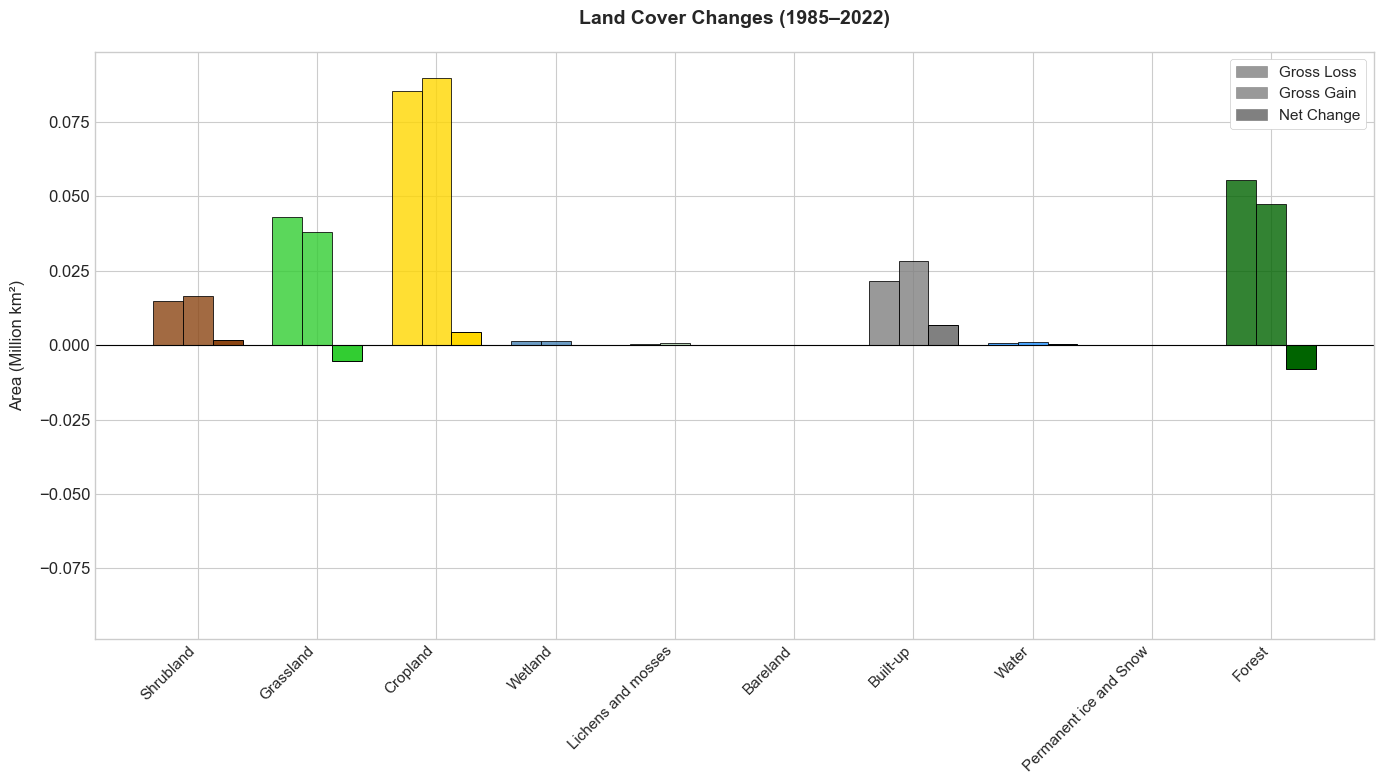


Analysis complete. Created:
- land_cover_change_results.csv
- land_cover_changes_10classes.png


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ======================
# CONFIGURATION
# ======================

# Your exact class definitions
class_info = {
    'Shrubland': {'color': '#8b4513', 'order': 1},
    'Grassland': {'color': '#32cd32', 'order': 2},
    'Cropland': {'color': '#ffd700', 'order': 3},
    'Wetland': {'color': '#4682b4', 'order': 4},
    'Lichens and mosses': {'color': '#a9cda9', 'order': 5},
    'Bareland': {'color': '#c2b280', 'order': 6},
    'Built-up': {'color': '#808080', 'order': 7},
    'Water': {'color': '#1e90ff', 'order': 8},
    'Permanent ice and Snow': {'color': '#b0c4de', 'order': 9},
    'Forest': {'color': '#006400', 'order': 10}
}

# Sort classes by your preferred order
classes = sorted(class_info.keys(), key=lambda x: class_info[x]['order'])

# ======================
# DATA PROCESSING
# ======================

def load_data(filepath):
    """Load and prepare your transition data"""
    df = pd.read_csv(filepath)
    
    # Convert period to start year (e.g., "1985-1990" → 1985)
    df['Year'] = df['Period'].str.split('-').str[0].astype(int)
    
    # Map numeric codes to class names
    label_map = {
        5: 'Shrubland',
        7: 'Grassland',
        8: 'Cropland',
        9: 'Wetland',
        11: 'Lichens and mosses',
        12: 'Bareland',
        13: 'Built-up',
        15: 'Water',
        16: 'Permanent ice and Snow',
        20: 'Forest'
    }
    df['From_label'] = df['From'].map(label_map)
    df['To_label'] = df['To'].map(label_map)
    
    return df.dropna(subset=['From_label', 'To_label'])

def calculate_changes(df):
    """Calculate gross losses, gains and net changes"""
    changes = df[df['From'] != df['To']]
    
    gross_loss = changes.groupby('From_label')['Area_km2'].sum()
    gross_gain = changes.groupby('To_label')['Area_km2'].sum()
    net_change = gross_gain.sub(gross_loss, fill_value=0)
    
    results = pd.DataFrame({
        'Gross Loss': gross_loss / 1e6,
        'Gross Gain': gross_gain / 1e6,
        'Net Change': net_change / 1e6
    }).fillna(0)
    
    return results.reindex(classes).fillna(0)

# ======================
# VISUALIZATION
# ======================

def create_figure1_plot(results):
    """Create plot in the style of the paper's Figure 1"""
    plt.figure(figsize=(14, 8))

    # Use a safe default style
    try:
        plt.style.use('seaborn-v0_8-whitegrid')  # Compatible with Matplotlib 3.6+
    except:
        plt.style.use('ggplot')  # Fallback if seaborn style not found

    font = {'family': 'sans-serif', 'weight': 'normal', 'size': 12}
    plt.rc('font', **font)

    n_classes = len(classes)
    bar_width = 0.25
    x = np.arange(n_classes)

    for i, cls in enumerate(classes):
        plt.bar(x[i] - bar_width, results.loc[cls, 'Gross Loss'], bar_width,
                color=class_info[cls]['color'], alpha=0.8, edgecolor='black', linewidth=0.7, label='Gross Loss' if i == 0 else "")
        plt.bar(x[i], results.loc[cls, 'Gross Gain'], bar_width,
                color=class_info[cls]['color'], alpha=0.8, edgecolor='black', linewidth=0.7, label='Gross Gain' if i == 0 else "")
        plt.bar(x[i] + bar_width, results.loc[cls, 'Net Change'], bar_width,
                color=class_info[cls]['color'], alpha=1.0, edgecolor='black', linewidth=0.7, label='Net Change' if i == 0 else "")

    plt.axhline(0, color='black', linewidth=0.8, linestyle='-')
    plt.xticks(x, classes, rotation=45, ha='right', fontsize=11)
    plt.ylabel('Area (Million km²)', fontsize=12, labelpad=10)

    max_val = max(abs(results.values.min()), abs(results.values.max()))
    plt.ylim(-max_val*1.1, max_val*1.1)

    # Only add one legend
    handles = [
        plt.Rectangle((0,0),1,1,color='gray',alpha=0.8,label='Gross Loss'),
        plt.Rectangle((0,0),1,1,color='gray',alpha=0.8,label='Gross Gain'),
        plt.Rectangle((0,0),1,1,color='gray',alpha=1.0,label='Net Change')
    ]
    plt.legend(handles=handles, loc='upper right', frameon=True, framealpha=1, fontsize=11)

    plt.title('Land Cover Changes (1985–2022)', fontsize=14, pad=20)
    plt.tight_layout()
    plt.savefig('land_cover_changes_10classes.png', dpi=300, bbox_inches='tight')
    plt.show()

# ======================
# MAIN ANALYSIS
# ======================

if __name__ == "__main__":
    try:
        df = load_data('tevere_basin_transitions_1985-2022.csv')
        results = calculate_changes(df)

        print("Land Cover Change Results (Million km²):")
        print(results)

        results.to_csv('land_cover_change_results.csv')
        create_figure1_plot(results)

        print("\nAnalysis complete. Created:")
        print("- land_cover_change_results.csv")
        print("- land_cover_changes_10classes.png")

    except FileNotFoundError:
        print("Error: Input file not found. Please check the file path.")
    except Exception as e:
        print(f"An error occurred: {str(e)}")


Land Cover Change Results (Million km²):
                        Gross Loss  Gross Gain  Net Change
Shrubland                 0.015016    0.016627    0.001610
Grassland                 0.043233    0.037886   -0.005347
Cropland                  0.085302    0.089644    0.004342
Wetland                   0.001333    0.001461    0.000129
Lichens and mosses        0.000497    0.000582    0.000085
Bareland                  0.000130    0.000131    0.000001
Built-up                  0.021607    0.028428    0.006820
Water                     0.000744    0.001139    0.000396
Permanent ice and Snow    0.000000    0.000000    0.000000
Forest                    0.055522    0.047486   -0.008036


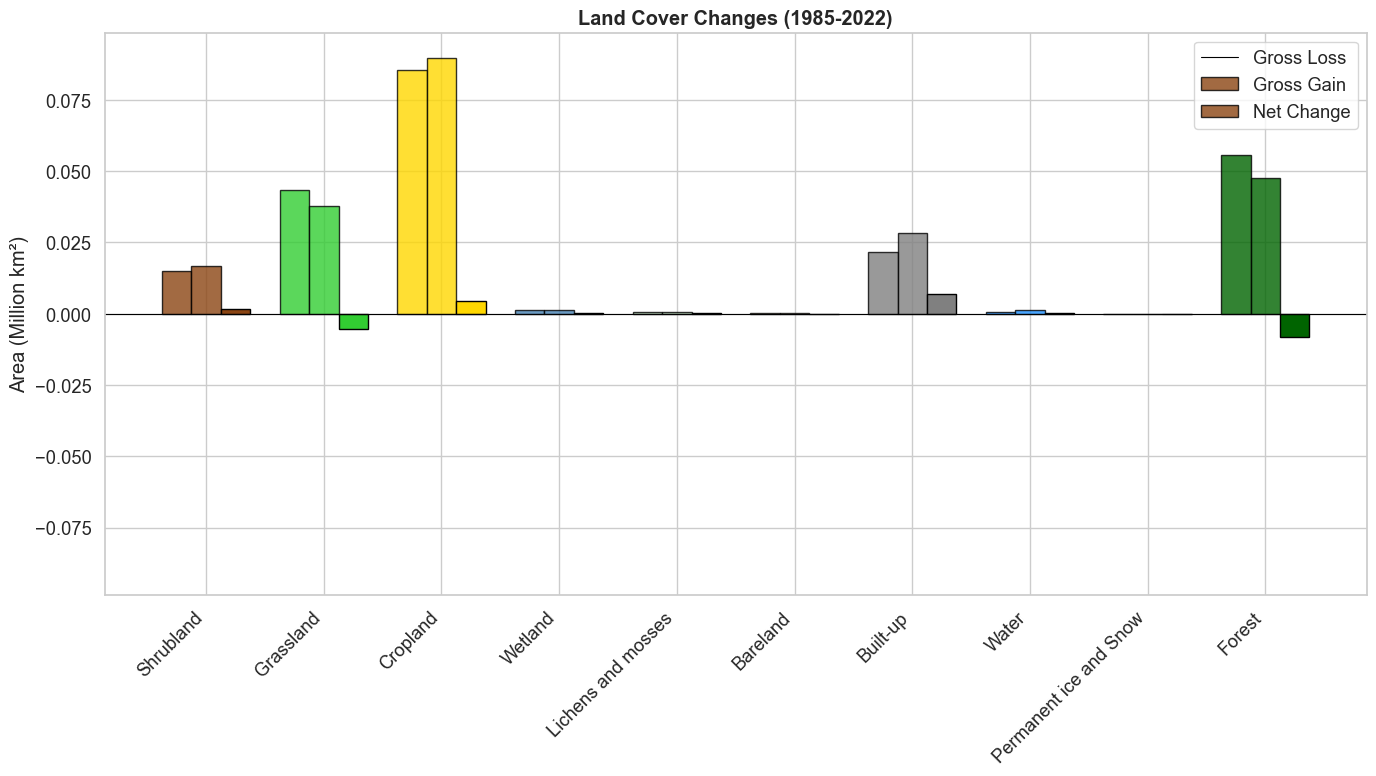


Analysis complete. Created:
- land_cover_change_results.csv
- land_cover_changes.png


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ======================
# CONFIGURATION
# ======================

# Your exact class definitions
class_info = {
    'Shrubland': {'color': '#8b4513', 'order': 1},
    'Grassland': {'color': '#32cd32', 'order': 2},
    'Cropland': {'color': '#ffd700', 'order': 3},
    'Wetland': {'color': '#4682b4', 'order': 4},
    'Lichens and mosses': {'color': '#a9cda9', 'order': 5},
    'Bareland': {'color': '#c2b280', 'order': 6},
    'Built-up': {'color': '#808080', 'order': 7},
    'Water': {'color': '#1e90ff', 'order': 8},
    'Permanent ice and Snow': {'color': '#b0c4de', 'order': 9},
    'Forest': {'color': '#006400', 'order': 10}
}

# Sort classes by your preferred order
classes = sorted(class_info.keys(), key=lambda x: class_info[x]['order'])

# ======================
# DATA PROCESSING
# ======================

def load_data(filepath):
    """Load and prepare your transition data"""
    df = pd.read_csv(filepath)
    
    # Convert period to start year
    df['Year'] = df['Period'].str.split('-').str[0].astype(int)
    
    # Map numeric codes to class names
    df['From_label'] = df['From'].map({
        5: 'Shrubland',
        7: 'Grassland',
        8: 'Cropland',
        9: 'Wetland',
        11: 'Lichens and mosses',
        12: 'Bareland',
        13: 'Built-up',
        15: 'Water',
        16: 'Permanent ice and Snow',
        20: 'Forest'
    })
    
    df['To_label'] = df['To'].map({
        5: 'Shrubland',
        7: 'Grassland',
        8: 'Cropland',
        9: 'Wetland',
        11: 'Lichens and mosses',
        12: 'Bareland',
        13: 'Built-up',
        15: 'Water',
        16: 'Permanent ice and Snow',
        20: 'Forest'
    })
    
    return df.dropna(subset=['From_label', 'To_label'])

def calculate_changes(df):
    """Calculate gross losses, gains and net changes"""
    changes = df[df['From'] != df['To']]  # Exclude persistence
    
    gross_loss = changes.groupby('From_label')['Area_km2'].sum()
    gross_gain = changes.groupby('To_label')['Area_km2'].sum()
    net_change = gross_gain.sub(gross_loss, fill_value=0)
    
    return pd.DataFrame({
        'Gross Loss': gross_loss / 1e6,  # Convert to million km²
        'Gross Gain': gross_gain / 1e6,
        'Net Change': net_change / 1e6
    }).reindex(classes).fillna(0)

# ======================
# VISUALIZATION
# ======================

def create_figure1_plot(results):
    """Create plot in exact style of paper's Figure 1"""
    plt.figure(figsize=(14, 8))
    
    # Set style using seaborn
    sns.set_style("whitegrid")
    sns.set_context("notebook", font_scale=1.2)
    
    # Plot parameters
    n_classes = len(classes)
    bar_width = 0.25
    x = np.arange(n_classes)
    
    # Plot bars
    for i, cls in enumerate(classes):
        plt.bar(x[i] - bar_width, results.loc[cls, 'Gross Loss'], bar_width,
                color=class_info[cls]['color'], alpha=0.8, edgecolor='black')
        plt.bar(x[i], results.loc[cls, 'Gross Gain'], bar_width,
                color=class_info[cls]['color'], alpha=0.8, edgecolor='black')
        plt.bar(x[i] + bar_width, results.loc[cls, 'Net Change'], bar_width,
                color=class_info[cls]['color'], alpha=1.0, edgecolor='black')
    
    # Customize plot
    plt.axhline(0, color='black', linewidth=0.8)
    plt.xticks(x, classes, rotation=45, ha='right')
    plt.ylabel('Area (Million km²)')
    
    # Auto-scale y-axis
    max_val = max(abs(results.min().min()), abs(results.max().max()))
    plt.ylim(-max_val*1.1, max_val*1.1)
    
    plt.legend(['Gross Loss', 'Gross Gain', 'Net Change'], 
               loc='upper right', frameon=True)
    plt.title('Land Cover Changes (1985-2022)')
    plt.tight_layout()
    
    plt.savefig('land_cover_changes.png', dpi=300, bbox_inches='tight')
    plt.show()

# ======================
# MAIN ANALYSIS
# ======================

try:
    # 1. Load data
    df = load_data('tevere_basin_transitions_1985-2022.csv')
    
    # 2. Calculate changes
    results = calculate_changes(df)
    print("Land Cover Change Results (Million km²):")
    print(results.to_string(float_format="%.6f"))  # Better number formatting
    
    # 3. Save results
    results.to_csv('land_cover_change_results.csv')
    
    # 4. Create plot
    create_figure1_plot(results)
    
    print("\nAnalysis complete. Created:")
    print("- land_cover_change_results.csv")
    print("- land_cover_changes.png")

except Exception as e:
    print(f"Error: {str(e)}")

Land Cover Change Results (Million km²):
                        Gross Loss  Gross Gain    Net Change
Shrubland                 0.015016    0.016627  1.610280e-03
Grassland                 0.043233    0.037886 -5.346990e-03
Cropland                  0.085302    0.089644  4.341690e-03
Wetland                   0.001333    0.001461  1.288800e-04
Lichens and mosses        0.000497    0.000582  8.460000e-05
Bareland                  0.000130    0.000131  9.900000e-07
Built-up                  0.021607    0.028428  6.820380e-03
Water                     0.000744    0.001139  3.957300e-04
Permanent ice and Snow    0.000000    0.000000  0.000000e+00
Forest                    0.055522    0.047486 -8.035560e-03


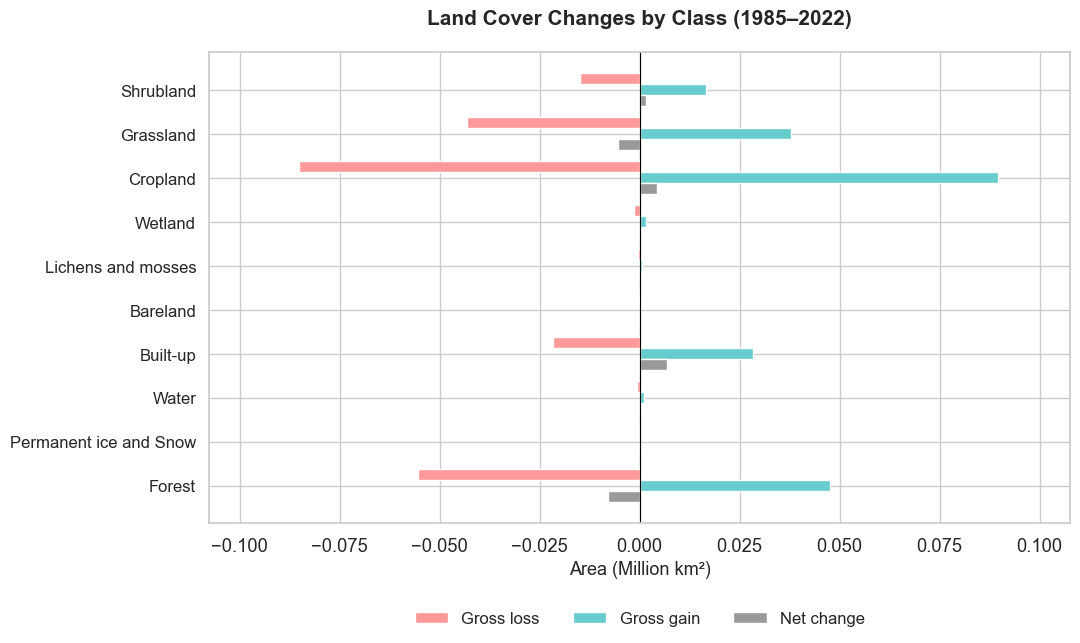

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ======================
# CLASS INFO
# ======================

class_info = {
    'Shrubland': {'color': '#8b4513', 'order': 1},
    'Grassland': {'color': '#32cd32', 'order': 2},
    'Cropland': {'color': '#ffd700', 'order': 3},
    'Wetland': {'color': '#4682b4', 'order': 4},
    'Lichens and mosses': {'color': '#a9cda9', 'order': 5},
    'Bareland': {'color': '#c2b280', 'order': 6},
    'Built-up': {'color': '#808080', 'order': 7},
    'Water': {'color': '#1e90ff', 'order': 8},
    'Permanent ice and Snow': {'color': '#b0c4de', 'order': 9},
    'Forest': {'color': '#006400', 'order': 10}
}

class_labels = {
    5: 'Shrubland',
    7: 'Grassland',
    8: 'Cropland',
    9: 'Wetland',
    11: 'Lichens and mosses',
    12: 'Bareland',
    13: 'Built-up',
    15: 'Water',
    16: 'Permanent ice and Snow',
    20: 'Forest'
}

classes = sorted(class_info.keys(), key=lambda x: class_info[x]['order'])

# ======================
# LOAD AND PROCESS DATA
# ======================

def load_data(filepath):
    df = pd.read_csv(filepath)
    df['Year'] = df['Period'].str.split('-').str[0].astype(int)
    df['From_label'] = df['From'].map(class_labels)
    df['To_label'] = df['To'].map(class_labels)
    return df.dropna(subset=['From_label', 'To_label'])

def calculate_changes(df):
    changes = df[df['From'] != df['To']]
    gross_loss = changes.groupby('From_label')['Area_km2'].sum()
    gross_gain = changes.groupby('To_label')['Area_km2'].sum()
    net_change = gross_gain.sub(gross_loss, fill_value=0)
    results = pd.DataFrame({
        'Gross Loss': gross_loss / 1e6,
        'Gross Gain': gross_gain / 1e6,
        'Net Change': net_change / 1e6
    }).fillna(0)
    return results.reindex(classes).fillna(0)

# ======================
# PLOT: HORIZONTAL BARS
# ======================

def create_horizontal_bar_plot(results):
    plot_colors = {
        'Gross Loss': '#ff9999',
        'Gross Gain': '#66cccc',
        'Net Change': '#999999'
    }

    y = np.arange(len(classes))
    gross_loss = -results.loc[classes, 'Gross Loss'].values
    gross_gain = results.loc[classes, 'Gross Gain'].values
    net_change = results.loc[classes, 'Net Change'].values

    bar_height = 0.25
    fig, ax = plt.subplots(figsize=(12, 8))

    ax.barh(y - bar_height, gross_loss, height=bar_height, color=plot_colors['Gross Loss'], label='Gross loss')
    ax.barh(y, gross_gain, height=bar_height, color=plot_colors['Gross Gain'], label='Gross gain')
    ax.barh(y + bar_height, net_change, height=bar_height, color=plot_colors['Net Change'], label='Net change')

    ax.axvline(0, color='black', linewidth=0.8)
    ax.set_yticks(y)
    ax.set_yticklabels(classes, fontsize=12)
    ax.invert_yaxis()
    ax.set_xlabel('Area (Million km²)', fontsize=13)
    ax.set_title('Land Cover Changes by Class (1985–2022)', fontsize=15, pad=20)

    max_val = max(np.abs(gross_loss).max(), gross_gain.max(), np.abs(net_change).max()) * 1.2
    ax.set_xlim(-max_val, max_val)

    ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=3, frameon=False, fontsize=12)

    plt.tight_layout(pad=3.5)
    plt.savefig('land_cover_changes_real_classes_horizontal.png', dpi=300, bbox_inches='tight')
    plt.show()

# ======================
# MAIN WORKFLOW
# ======================

try:
    df = load_data('tevere_basin_transitions_1985-2022.csv')
    results = calculate_changes(df)
    print("Land Cover Change Results (Million km²):")
    print(results)
    results.to_csv('land_cover_change_results.csv')
    create_horizontal_bar_plot(results)
except FileNotFoundError:
    print("Error: Input file not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {str(e)}")


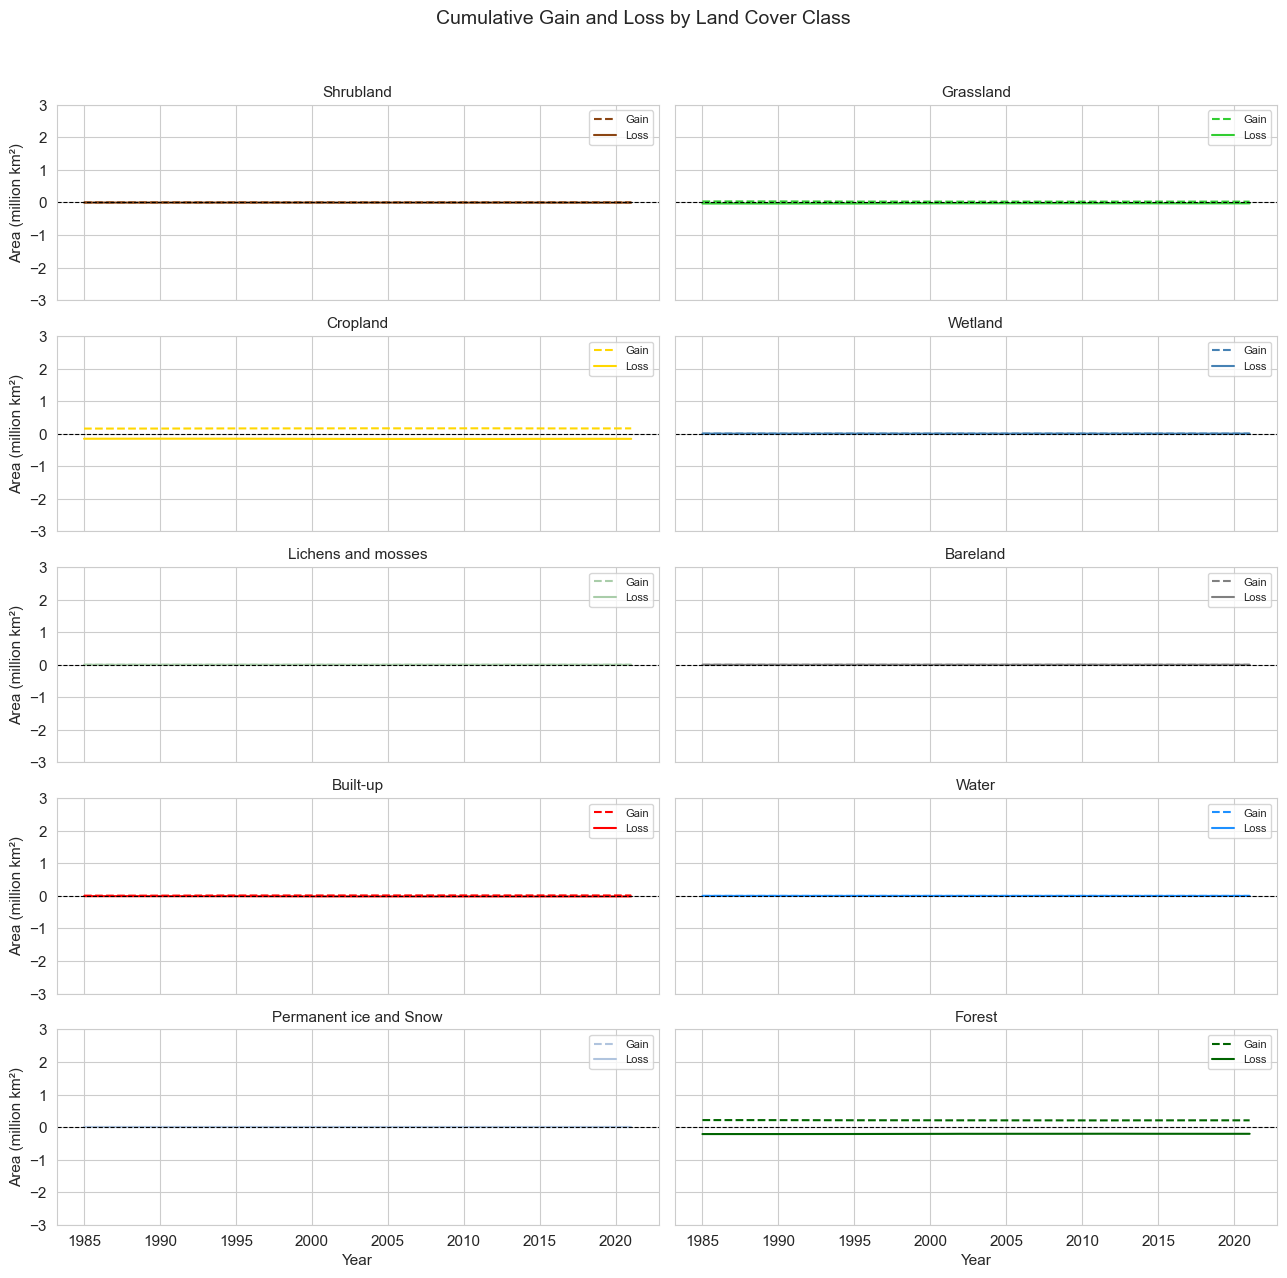

✅ Plot saved as: figure4_original_classes.png


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Style ===
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 11

# === Color Map ===
color_map = {
    'Shrubland': '#8b4513',
    'Grassland': '#32cd32',
    'Cropland': '#ffd700',
    'Wetland': '#4682b4',
    'Lichens and mosses': '#a9cda9',
    'Bareland': '#808080',
    'Built-up': '#ff0000',
    'Water': '#1e90ff',
    'Permanent ice and Snow': '#b0c4de',
    'Forest': '#006400'
}

# === Load Data ===
def load_data(filepath):
    df = pd.read_csv(filepath)
    df['Year'] = df['Period'].str.split('-').str[0].astype(int)
    class_map = {
        5: 'Shrubland',
        7: 'Grassland',
        8: 'Cropland',
        9: 'Wetland',
        11: 'Lichens and mosses',
        12: 'Bareland',
        13: 'Built-up',
        15: 'Water',
        16: 'Permanent ice and Snow',
        20: 'Forest'
    }
    df['From_label'] = df['From'].map(class_map)
    df['To_label'] = df['To'].map(class_map)
    return df.dropna(subset=['From_label', 'To_label'])

# === Gain and Loss ===
def compute_gain_loss(df, classes):
    years = sorted(df['Year'].unique())
    gain = pd.DataFrame(0.0, index=years, columns=classes)
    loss = pd.DataFrame(0.0, index=years, columns=classes)

    for year in years:
        df_y = df[df['Year'] == year]
        for cls in classes:
            gain.loc[year, cls] = df_y[df_y['To_label'] == cls]['Area_km2'].sum() / 1e6
            loss.loc[year, cls] = -df_y[df_y['From_label'] == cls]['Area_km2'].sum() / 1e6
    return gain, loss

# === Plotting ===
def plot_classes_separately(df):
    classes = list(color_map.keys())
    gain, loss = compute_gain_loss(df, classes)

    n = len(classes)
    ncols = 2
    nrows = (n + 1) // ncols

    fig, axs = plt.subplots(nrows, ncols, figsize=(13, 2.5 * nrows), sharex=True, sharey=True)
    axs = axs.flatten()

    for i, cls in enumerate(classes):
        ax = axs[i]
        ax.plot(gain.index, gain[cls], linestyle='--', color=color_map[cls], label='Gain')
        ax.plot(loss.index, loss[cls], linestyle='-', color=color_map[cls], label='Loss')

        ax.axhline(0, color='black', linestyle='--', linewidth=0.8)
        ax.set_title(cls, fontsize=11)
        ax.set_ylim(-3, 3)

        if i % 2 == 0:
            ax.set_ylabel('Area (million km²)')
        if i >= n - 2:
            ax.set_xlabel('Year')
        ax.legend(loc='upper right', fontsize=8)

    # Hide any unused subplots
    for j in range(i + 1, len(axs)):
        axs[j].axis('off')

    plt.suptitle('Cumulative Gain and Loss by Land Cover Class', fontsize=14, y=1.02)
    plt.tight_layout()
    plt.savefig("figure4_original_classes.png", dpi=300)
    plt.show()

# === Run Everything ===
try:
    df = load_data('tevere_basin_transitions_1985-2022.csv')
    plot_classes_separately(df)
    print("✅ Plot saved as: figure4_original_classes.png")

except Exception as e:
    print(f"❌ Error: {e}")


   From  To  Count  Area_km2     Period From_label   To_label  Year
0     5   5  30888   2779.92  1985-1990  Shrubland  Shrubland  1985
1     5   7    458     41.22  1985-1990  Shrubland  Grassland  1985
2     5   8    735     66.15  1985-1990  Shrubland   Cropland  1985
3     5   9     64      5.76  1985-1990  Shrubland    Wetland  1985
4     5  12      4      0.36  1985-1990  Shrubland   Bareland  1985
Years: [1985 1990 1995 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021]
From_label classes: ['Shrubland' 'Grassland' 'Cropland' 'Wetland' 'Bareland' 'Built-up'
 'Water' 'Forest' 'Lichens and mosses']
To_label classes: ['Shrubland' 'Grassland' 'Cropland' 'Wetland' 'Bareland' 'Built-up'
 'Water' 'Forest' 'Lichens and mosses']

--- GAIN (km²) by class in first few years ---
To_label  Bareland  Built-up   Cropland     Forest  Grassland  \
Year                                                            
1985         13.50   8026

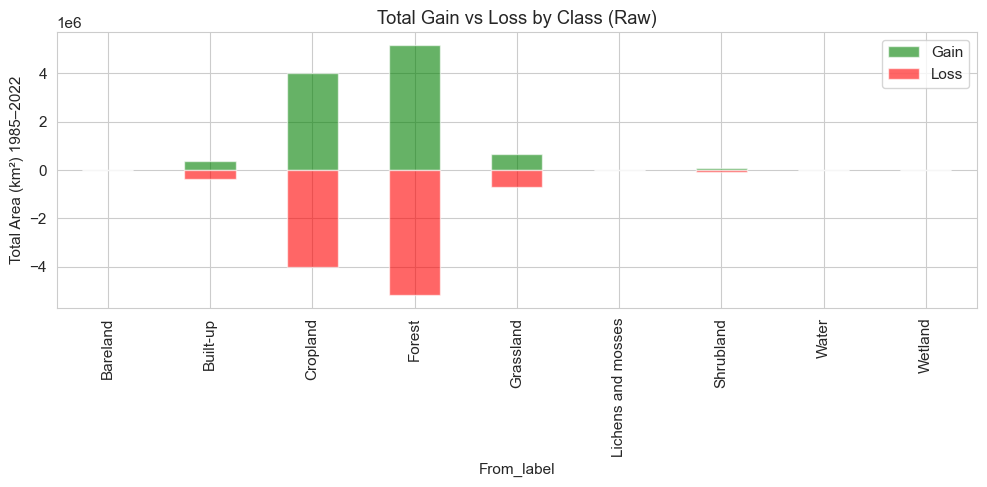

In [4]:
# View sample and unique labels
df = load_data('tevere_basin_transitions_1985-2022.csv')
print(df.head())
print("Years:", df['Year'].unique())
print("From_label classes:", df['From_label'].unique())
print("To_label classes:", df['To_label'].unique())

# Group total area for gain and loss
gain_by_class = df.groupby(['Year', 'To_label'])['Area_km2'].sum().unstack().fillna(0)
loss_by_class = df.groupby(['Year', 'From_label'])['Area_km2'].sum().unstack().fillna(0)

# Inspect a few years to see changes
print("\n--- GAIN (km²) by class in first few years ---")
print(gain_by_class.head())

print("\n--- LOSS (km²) by class in first few years ---")
print(loss_by_class.head())

# Optional: Plot total gain and loss for all years per class
import matplotlib.pyplot as plt
total_gain = gain_by_class.sum()
total_loss = loss_by_class.sum()

plt.figure(figsize=(10, 5))
total_gain.plot(kind='bar', color='green', alpha=0.6, label='Gain')
(-total_loss).plot(kind='bar', color='red', alpha=0.6, label='Loss')
plt.ylabel('Total Area (km²) 1985–2022')
plt.title('Total Gain vs Loss by Class (Raw)')
plt.legend()
plt.tight_layout()
plt.show()


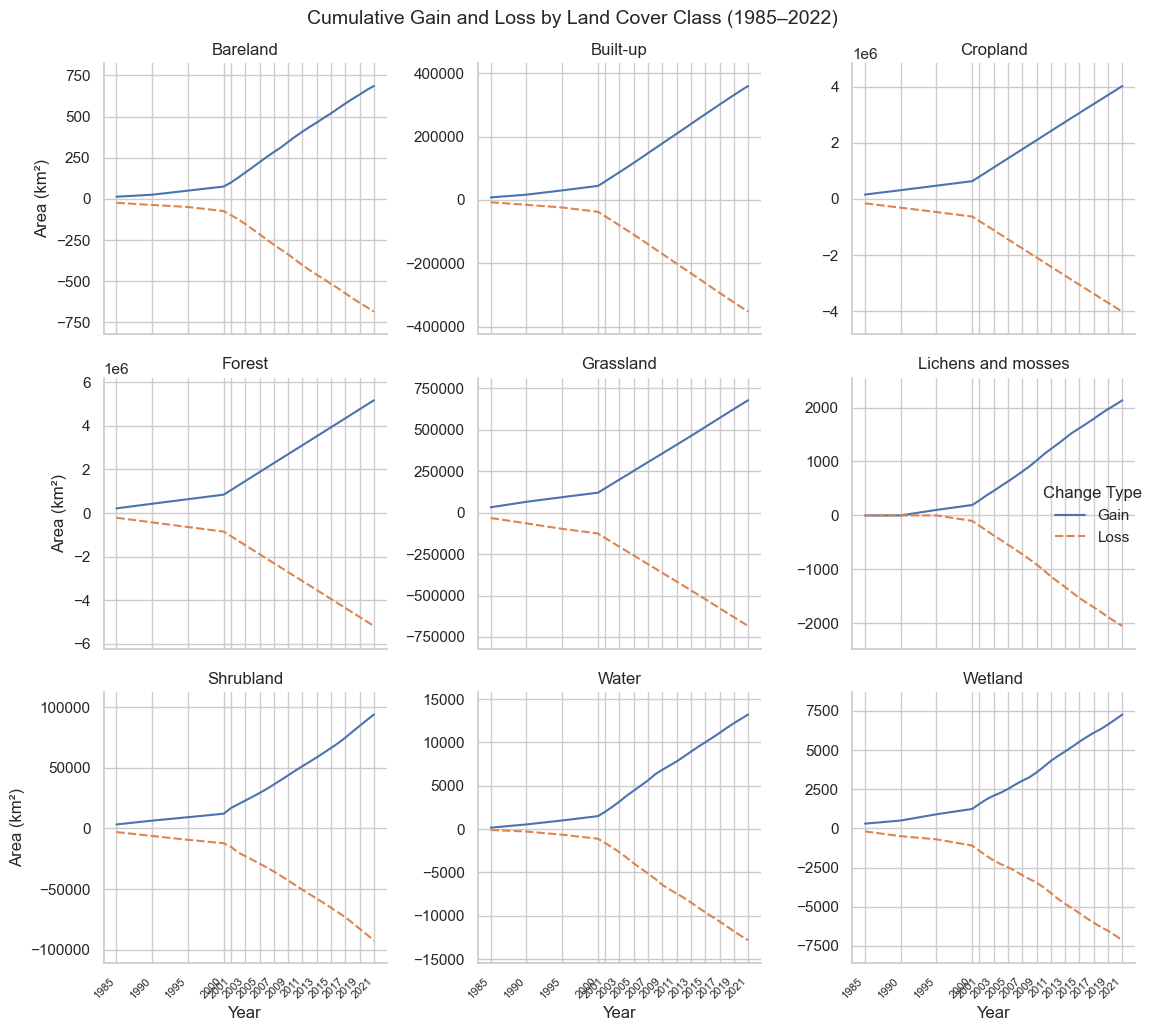

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming `df` is already loaded and includes columns:
# 'Year', 'From_label', 'To_label', 'Area_km2'

# 1. Compute cumulative gain and loss
classes = sorted(set(df['From_label']).union(set(df['To_label'])))
years = sorted(df['Year'].unique())

gain_df = (
    df.groupby(['Year', 'To_label'])['Area_km2']
    .sum()
    .unstack(fill_value=0)
    .reindex(columns=classes, fill_value=0)
)

loss_df = (
    df.groupby(['Year', 'From_label'])['Area_km2']
    .sum()
    .unstack(fill_value=0)
    .reindex(columns=classes, fill_value=0)
)

gain_cum = gain_df.cumsum()
loss_cum = loss_df.cumsum()

# 2. Melt for plotting
gain_melted = gain_cum.reset_index().melt(id_vars='Year', var_name='Class', value_name='Area')
gain_melted['Type'] = 'Gain'

loss_melted = loss_cum.reset_index().melt(id_vars='Year', var_name='Class', value_name='Area')
loss_melted['Area'] *= -1
loss_melted['Type'] = 'Loss'

combined = pd.concat([gain_melted, loss_melted])

# 3. Plot with FacetGrid
sns.set(style="whitegrid")
g = sns.FacetGrid(combined, col="Class", col_wrap=3, height=3.5, sharey=False)
g.map_dataframe(sns.lineplot, x="Year", y="Area", hue="Type", style="Type", dashes=True)

# 4. Formatting
g.add_legend(title="Change Type")
g.set_titles("{col_name}")
g.set_axis_labels("Year", "Area (km²)")
g.fig.subplots_adjust(top=0.92)
g.fig.suptitle("Cumulative Gain and Loss by Land Cover Class (1985–2022)", fontsize=14)

# 5. Improve x-axis: reduce ticks and rotate
xticks = [1985, 1990, 1995, 2000] + list(range(2001, 2023, 2))  # Every 2 years from 2001–2022

for ax, label in zip(g.axes.flat, classes):
    sub_data = combined[combined['Class'] == label]
    min_y = sub_data['Area'].min()
    max_y = sub_data['Area'].max()
    margin = (max_y - min_y) * 0.1 or 500
    ax.set_ylim(min_y - margin, max_y + margin)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks, rotation=45, ha='right', fontsize=8)

# 6. Save and show
plt.tight_layout()
plt.savefig("figure4_original_classes_scaled_cleaned.png", dpi=300, bbox_inches='tight')
plt.show()


In [12]:
import os
import re
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Patch
from osgeo import gdal
import grass.script as gs
from tqdm import tqdm

# Directories
input_dir = '/Users/ghulamabbaszafari/Downloads/rest/Clippeed_GLC_tevere_basin'
output_dir = '/Users/ghulamabbaszafari/Downloads/rest/Clippeed_GLC_tevere_basin/forest'
os.makedirs(output_dir, exist_ok=True)

# Constants
CLASS_LABELS = {20: 'Forest', 255: 'No data'}
FOREST_CLASS = 20
OUTPUT_PREFIX = "forest_GLC"

# Load available rasters
available_years = {}
for fname in os.listdir(input_dir):
    if fname.lower().endswith('.tif') and not fname.lower().endswith('.aux.xml'):
        match = re.search(r'(\d{4})', fname)
        if match:
            year = int(match.group(1))
            path = os.path.join(input_dir, fname)
            map_name = f"land_cover_{year}"
            available_years[year] = map_name
            gs.run_command('r.in.gdal', input=path, output=map_name, overwrite=True)

# Sorted year list
sorted_years = sorted(available_years.keys())

# Functions (same as in your original code, but modified output prefix)
def generate_forest_change(y1, y2):
    current_map = f"land_cover_{y1}"
    next_map = f"land_cover_{y2}"
    change_map = f"{OUTPUT_PREFIX}_{y1}_{y2}"

    gain = f"temp_gain = if(!isnull({next_map}) && {next_map} == {FOREST_CLASS} && (isnull({current_map}) || {current_map} != {FOREST_CLASS}), 1, null())"
    loss = f"temp_loss = if(!isnull({current_map}) && {current_map} == {FOREST_CLASS} && (isnull({next_map}) || {next_map} != {FOREST_CLASS}), 2, null())"
    nochange = f"temp_nochange = if(!isnull({current_map}) && {current_map} == {FOREST_CLASS} && (!isnull({next_map}) && {next_map} == {FOREST_CLASS}), 3, null())"
    combine = f"{change_map} = if(!isnull(temp_gain), 1, if(!isnull(temp_loss), 2, if(!isnull(temp_nochange), 3, null())))"

    gs.mapcalc(gain, overwrite=True)
    gs.mapcalc(loss, overwrite=True)
    gs.mapcalc(nochange, overwrite=True)
    gs.mapcalc(combine, overwrite=True)
    gs.run_command('g.remove', flags='f', type='raster', name='temp_gain,temp_loss,temp_nochange')

    return change_map

def export_forest_change(change_map, output_path):
    temp_map = f"temp_export_{change_map}"
    gs.mapcalc(f"{temp_map} = {change_map}", overwrite=True)

    rules = "1 green\n2 red\n3 gray"
    gs.write_command('r.colors', map=temp_map, rules='-', stdin=rules)
    gs.run_command('r.out.gdal', input=temp_map, output=output_path,
                   format='GTiff', type='UInt16', nodata=0,
                   createopt='PROFILE=GeoTIFF,TILED=YES,COMPRESS=LZW', overwrite=True)
    gs.run_command('g.remove', flags='f', type='raster', name=temp_map)

def calculate_statistics(change_map):
    stats = {k: 0 for k in ['loss_pixels', 'gain_pixels', 'no_change_pixels']}
    stats.update({'loss_area_sqkm': 0, 'gain_area_sqkm': 0,
                  'net_change_pixels': 0, 'net_change_sqkm': 0,
                  'total_forest_pixels': 0, 'total_forest_area': 0})
    
    region = gs.region()
    cell_area = (region['nsres'] * region['ewres']) / 1e6
    stat_lines = gs.read_command('r.stats', input=change_map, flags='acn', sep=':').splitlines()
    
    for line in stat_lines:
        parts = line.strip().split(':')
        if len(parts) >= 3:
            val = int(parts[0])
            count = int(parts[2])
            if val == 1:
                stats['gain_pixels'] = count
                stats['gain_area_sqkm'] = count * cell_area
                stats['net_change_pixels'] += count
                stats['net_change_sqkm'] += count * cell_area
            elif val == 2:
                stats['loss_pixels'] = count
                stats['loss_area_sqkm'] = count * cell_area
                stats['net_change_pixels'] -= count
                stats['net_change_sqkm'] -= count * cell_area
            elif val == 3:
                stats['no_change_pixels'] = count

    stats['total_forest_pixels'] = stats['loss_pixels'] + stats['no_change_pixels']
    stats['total_forest_area'] = stats['total_forest_pixels'] * cell_area
    return stats

def visualize_forest_change(tif_path, year1, year2):
    ds = gdal.Open(tif_path)
    data = ds.GetRasterBand(1).ReadAsArray().astype(np.float32)
    data[data == 0] = np.nan
    ds = None

    data[data == 1] = 1
    data[data == 2] = -1
    data[data == 3] = 0

    cmap = mcolors.ListedColormap(['#ff0000', '#d3d3d3', '#006400'])
    bounds = [-1.5, -0.5, 0.5, 1.5]
    norm = mcolors.BoundaryNorm(bounds, cmap.N)

    plt.figure(figsize=(12, 8), dpi=150)
    img = plt.imshow(data, cmap=cmap, norm=norm)
    plt.title(f"Forest Change {year1}-{year2}", fontsize=14)
    plt.axis('off')

    legend_elements = [
        Patch(facecolor='#006400', edgecolor='black', label='Forest Gain'),
        Patch(facecolor='#ff0000', edgecolor='black', label='Forest Loss'),
        Patch(facecolor='#d3d3d3', edgecolor='black', label='No Change'),
    ]
    plt.legend(handles=legend_elements, loc='lower right')

    plot_path = os.path.join(output_dir, f"{OUTPUT_PREFIX}_plot_{year1}_{year2}.png")
    plt.savefig(plot_path, bbox_inches='tight')
    plt.close()
    return plot_path

def save_to_csv(results, csv_path):
    with open(csv_path, 'w', newline='') as f:
        writer = csv.DictWriter(f, fieldnames=[
            'Year_Range', 'Total_Forest_Pixels', 'Total_Forest_Area_sqkm',
            'Loss_Pixels', 'Loss_Area_sqkm', 'Gain_Pixels', 'Gain_Area_sqkm',
            'No_Change_Pixels', 'Net_Change_Pixels', 'Net_Change_sqkm',
            'Change_Ratio', 'Plot_Path'
        ])
        writer.writeheader()
        for year_range, stats in results.items():
            gain = stats['gain_pixels']
            loss = stats['loss_pixels']
            total = stats['total_forest_pixels']
            ratio = (gain - loss) / total if total > 0 else 0
            writer.writerow({
                'Year_Range': year_range,
                'Total_Forest_Pixels': total,
                'Total_Forest_Area_sqkm': f"{stats['total_forest_area']:.4f}",
                'Loss_Pixels': loss,
                'Loss_Area_sqkm': f"{stats['loss_area_sqkm']:.4f}",
                'Gain_Pixels': gain,
                'Gain_Area_sqkm': f"{stats['gain_area_sqkm']:.4f}",
                'No_Change_Pixels': stats['no_change_pixels'],
                'Net_Change_Pixels': stats['net_change_pixels'],
                'Net_Change_sqkm': f"{stats['net_change_sqkm']:.4f}",
                'Change_Ratio': f"{ratio:.4f}",
                'Plot_Path': stats['plot_path']
            })

# Main processing loop
results = {}
year_pairs = list(zip(sorted_years[:-1], sorted_years[1:]))

for y1, y2 in tqdm(year_pairs):
    if y1 not in available_years or y2 not in available_years:
        print(f"Skipping {y1}-{y2} - missing maps")
        continue

    print(f"\nProcessing {y1}-{y2}...")
    change_map = generate_forest_change(y1, y2)
    tif_path = os.path.join(output_dir, f"{OUTPUT_PREFIX}_{y1}_{y2}.tif")
    export_forest_change(change_map, tif_path)
    stats = calculate_statistics(change_map)
    stats['plot_path'] = visualize_forest_change(tif_path, y1, y2)
    results[f"{y1}-{y2}"] = stats

# Save results
csv_path = os.path.join(output_dir, f'{OUTPUT_PREFIX}_analysis.csv')
save_to_csv(results, csv_path)
print(f"\nAnalysis complete. CSV saved to {csv_path}")





         overwritten
Importing raster map <land_cover_2005>...

         overwritten
Importing raster map <land_cover_2011>...

         overwritten
Importing raster map <land_cover_2010>...

         overwritten
Importing raster map <land_cover_2004>...

         overwritten
Importing raster map <land_cover_2012>...

         overwritten
Importing raster map <land_cover_2006>...

         overwritten
Importing raster map <land_cover_2007>...

         overwritten
Importing raster map <land_cover_2013>...

         overwritten
Importing raster map <land_cover_2017>...

         overwritten
Importing raster map <land_cover_2003>...

         overwritten
Importing raster map <land_cover_2002>...

         overwritten
Importing raster map <land_cover_2016>...

         overwritten
Importing raster map <land_cover_2000>...

         overwritten
Importing raster map <land_cover_2014>...

         overwritten
Importing raster map <land_cover_2015>...

         overwritten
Importing raster ma


Processing 1985-1990...


Removing raster <temp_gain>
Removing raster <temp_loss>
Removing raster <temp_nochange>
Color table for raster map <temp_export_forest_GLC_1985_1990> set to
'rules'
Checking GDAL data type and nodata value...

Using GDAL data type <UInt16>
Exporting raster data to GTiff format...

r.out.gdal complete. File
</Users/ghulamabbaszafari/Downloads/rest/Clippeed_GLC_tevere_basin/forest/forest_GLC_1985_1990.tif>
created.
Removing raster <temp_export_forest_GLC_1985_1990>

  4%|████████                                                                                                                                                                                                  | 1/25 [00:16<06:33, 16.41s/it]


Processing 1990-1995...


Removing raster <temp_gain>
Removing raster <temp_loss>
Removing raster <temp_nochange>
Color table for raster map <temp_export_forest_GLC_1990_1995> set to
'rules'
Checking GDAL data type and nodata value...

Using GDAL data type <UInt16>
Exporting raster data to GTiff format...

r.out.gdal complete. File
</Users/ghulamabbaszafari/Downloads/rest/Clippeed_GLC_tevere_basin/forest/forest_GLC_1990_1995.tif>
created.
Removing raster <temp_export_forest_GLC_1990_1995>

  8%|████████████████▏                                                                                                                                                                                         | 2/25 [00:32<06:16, 16.37s/it]


Processing 1995-2000...


Removing raster <temp_gain>
Removing raster <temp_loss>
Removing raster <temp_nochange>
Color table for raster map <temp_export_forest_GLC_1995_2000> set to
'rules'
Checking GDAL data type and nodata value...

Using GDAL data type <UInt16>
Exporting raster data to GTiff format...

r.out.gdal complete. File
</Users/ghulamabbaszafari/Downloads/rest/Clippeed_GLC_tevere_basin/forest/forest_GLC_1995_2000.tif>
created.
Removing raster <temp_export_forest_GLC_1995_2000>

 12%|████████████████████████▏                                                                                                                                                                                 | 3/25 [00:48<05:54, 16.12s/it]


Processing 2000-2001...


Removing raster <temp_gain>
Removing raster <temp_loss>
Removing raster <temp_nochange>
Color table for raster map <temp_export_forest_GLC_2000_2001> set to
'rules'
Checking GDAL data type and nodata value...

Using GDAL data type <UInt16>
Exporting raster data to GTiff format...

r.out.gdal complete. File
</Users/ghulamabbaszafari/Downloads/rest/Clippeed_GLC_tevere_basin/forest/forest_GLC_2000_2001.tif>
created.
Removing raster <temp_export_forest_GLC_2000_2001>

 16%|████████████████████████████████▎                                                                                                                                                                         | 4/25 [01:03<05:27, 15.61s/it]


Processing 2001-2002...


Removing raster <temp_gain>
Removing raster <temp_loss>
Removing raster <temp_nochange>
Color table for raster map <temp_export_forest_GLC_2001_2002> set to
'rules'
Checking GDAL data type and nodata value...

Using GDAL data type <UInt16>
Exporting raster data to GTiff format...

r.out.gdal complete. File
</Users/ghulamabbaszafari/Downloads/rest/Clippeed_GLC_tevere_basin/forest/forest_GLC_2001_2002.tif>
created.
Removing raster <temp_export_forest_GLC_2001_2002>

 20%|████████████████████████████████████████▍                                                                                                                                                                 | 5/25 [01:18<05:11, 15.56s/it]


Processing 2002-2003...


Removing raster <temp_gain>
Removing raster <temp_loss>
Removing raster <temp_nochange>
Color table for raster map <temp_export_forest_GLC_2002_2003> set to
'rules'
Checking GDAL data type and nodata value...

Using GDAL data type <UInt16>
Exporting raster data to GTiff format...

r.out.gdal complete. File
</Users/ghulamabbaszafari/Downloads/rest/Clippeed_GLC_tevere_basin/forest/forest_GLC_2002_2003.tif>
created.
Removing raster <temp_export_forest_GLC_2002_2003>

 24%|████████████████████████████████████████████████▍                                                                                                                                                         | 6/25 [01:34<04:53, 15.47s/it]


Processing 2003-2004...


Removing raster <temp_gain>
Removing raster <temp_loss>
Removing raster <temp_nochange>
Color table for raster map <temp_export_forest_GLC_2003_2004> set to
'rules'
Checking GDAL data type and nodata value...

Using GDAL data type <UInt16>
Exporting raster data to GTiff format...

r.out.gdal complete. File
</Users/ghulamabbaszafari/Downloads/rest/Clippeed_GLC_tevere_basin/forest/forest_GLC_2003_2004.tif>
created.
Removing raster <temp_export_forest_GLC_2003_2004>

 28%|████████████████████████████████████████████████████████▌                                                                                                                                                 | 7/25 [01:50<04:42, 15.67s/it]


Processing 2004-2005...


Removing raster <temp_gain>
Removing raster <temp_loss>
Removing raster <temp_nochange>
Color table for raster map <temp_export_forest_GLC_2004_2005> set to
'rules'
Checking GDAL data type and nodata value...

Using GDAL data type <UInt16>
Exporting raster data to GTiff format...

r.out.gdal complete. File
</Users/ghulamabbaszafari/Downloads/rest/Clippeed_GLC_tevere_basin/forest/forest_GLC_2004_2005.tif>
created.
Removing raster <temp_export_forest_GLC_2004_2005>

 32%|████████████████████████████████████████████████████████████████▋                                                                                                                                         | 8/25 [02:05<04:21, 15.38s/it]


Processing 2005-2006...


Removing raster <temp_gain>
Removing raster <temp_loss>
Removing raster <temp_nochange>
Color table for raster map <temp_export_forest_GLC_2005_2006> set to
'rules'
Checking GDAL data type and nodata value...

Using GDAL data type <UInt16>
Exporting raster data to GTiff format...

r.out.gdal complete. File
</Users/ghulamabbaszafari/Downloads/rest/Clippeed_GLC_tevere_basin/forest/forest_GLC_2005_2006.tif>
created.
Removing raster <temp_export_forest_GLC_2005_2006>

 36%|████████████████████████████████████████████████████████████████████████▋                                                                                                                                 | 9/25 [02:18<03:59, 14.94s/it]


Processing 2006-2007...


Removing raster <temp_gain>
Removing raster <temp_loss>
Removing raster <temp_nochange>
Color table for raster map <temp_export_forest_GLC_2006_2007> set to
'rules'
Checking GDAL data type and nodata value...

Using GDAL data type <UInt16>
Exporting raster data to GTiff format...

r.out.gdal complete. File
</Users/ghulamabbaszafari/Downloads/rest/Clippeed_GLC_tevere_basin/forest/forest_GLC_2006_2007.tif>
created.
Removing raster <temp_export_forest_GLC_2006_2007>

 40%|████████████████████████████████████████████████████████████████████████████████▍                                                                                                                        | 10/25 [02:34<03:48, 15.23s/it]


Processing 2007-2008...


Removing raster <temp_gain>
Removing raster <temp_loss>
Removing raster <temp_nochange>
Color table for raster map <temp_export_forest_GLC_2007_2008> set to
'rules'
Checking GDAL data type and nodata value...

Using GDAL data type <UInt16>
Exporting raster data to GTiff format...

r.out.gdal complete. File
</Users/ghulamabbaszafari/Downloads/rest/Clippeed_GLC_tevere_basin/forest/forest_GLC_2007_2008.tif>
created.
Removing raster <temp_export_forest_GLC_2007_2008>

 44%|████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                | 11/25 [02:50<03:35, 15.37s/it]


Processing 2008-2009...


Removing raster <temp_gain>
Removing raster <temp_loss>
Removing raster <temp_nochange>
Color table for raster map <temp_export_forest_GLC_2008_2009> set to
'rules'
Checking GDAL data type and nodata value...

Using GDAL data type <UInt16>
Exporting raster data to GTiff format...

r.out.gdal complete. File
</Users/ghulamabbaszafari/Downloads/rest/Clippeed_GLC_tevere_basin/forest/forest_GLC_2008_2009.tif>
created.
Removing raster <temp_export_forest_GLC_2008_2009>

 48%|████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                        | 12/25 [03:07<03:24, 15.75s/it]


Processing 2009-2010...


Removing raster <temp_gain>
Removing raster <temp_loss>
Removing raster <temp_nochange>
Color table for raster map <temp_export_forest_GLC_2009_2010> set to
'rules'
Checking GDAL data type and nodata value...

Using GDAL data type <UInt16>
Exporting raster data to GTiff format...

r.out.gdal complete. File
</Users/ghulamabbaszafari/Downloads/rest/Clippeed_GLC_tevere_basin/forest/forest_GLC_2009_2010.tif>
created.
Removing raster <temp_export_forest_GLC_2009_2010>

 52%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                | 13/25 [03:23<03:09, 15.79s/it]


Processing 2010-2011...


Removing raster <temp_gain>
Removing raster <temp_loss>
Removing raster <temp_nochange>
Color table for raster map <temp_export_forest_GLC_2010_2011> set to
'rules'
Checking GDAL data type and nodata value...

Using GDAL data type <UInt16>
Exporting raster data to GTiff format...

r.out.gdal complete. File
</Users/ghulamabbaszafari/Downloads/rest/Clippeed_GLC_tevere_basin/forest/forest_GLC_2010_2011.tif>
created.
Removing raster <temp_export_forest_GLC_2010_2011>

 56%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                        | 14/25 [03:38<02:53, 15.77s/it]


Processing 2011-2012...


Removing raster <temp_gain>
Removing raster <temp_loss>
Removing raster <temp_nochange>
Color table for raster map <temp_export_forest_GLC_2011_2012> set to
'rules'
Checking GDAL data type and nodata value...

Using GDAL data type <UInt16>
Exporting raster data to GTiff format...

r.out.gdal complete. File
</Users/ghulamabbaszafari/Downloads/rest/Clippeed_GLC_tevere_basin/forest/forest_GLC_2011_2012.tif>
created.
Removing raster <temp_export_forest_GLC_2011_2012>

 60%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                | 15/25 [03:52<02:32, 15.28s/it]


Processing 2012-2013...


Removing raster <temp_gain>
Removing raster <temp_loss>
Removing raster <temp_nochange>
Color table for raster map <temp_export_forest_GLC_2012_2013> set to
'rules'
Checking GDAL data type and nodata value...

Using GDAL data type <UInt16>
Exporting raster data to GTiff format...

r.out.gdal complete. File
</Users/ghulamabbaszafari/Downloads/rest/Clippeed_GLC_tevere_basin/forest/forest_GLC_2012_2013.tif>
created.
Removing raster <temp_export_forest_GLC_2012_2013>

 64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                        | 16/25 [04:07<02:14, 14.99s/it]


Processing 2013-2014...


Removing raster <temp_gain>
Removing raster <temp_loss>
Removing raster <temp_nochange>
Color table for raster map <temp_export_forest_GLC_2013_2014> set to
'rules'
Checking GDAL data type and nodata value...

Using GDAL data type <UInt16>
Exporting raster data to GTiff format...

r.out.gdal complete. File
</Users/ghulamabbaszafari/Downloads/rest/Clippeed_GLC_tevere_basin/forest/forest_GLC_2013_2014.tif>
created.
Removing raster <temp_export_forest_GLC_2013_2014>

 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                | 17/25 [04:21<01:58, 14.85s/it]


Processing 2014-2015...


Removing raster <temp_gain>
Removing raster <temp_loss>
Removing raster <temp_nochange>
Color table for raster map <temp_export_forest_GLC_2014_2015> set to
'rules'
Checking GDAL data type and nodata value...

Using GDAL data type <UInt16>
Exporting raster data to GTiff format...

r.out.gdal complete. File
</Users/ghulamabbaszafari/Downloads/rest/Clippeed_GLC_tevere_basin/forest/forest_GLC_2014_2015.tif>
created.
Removing raster <temp_export_forest_GLC_2014_2015>

 72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                        | 18/25 [04:35<01:42, 14.62s/it]


Processing 2015-2016...


Removing raster <temp_gain>
Removing raster <temp_loss>
Removing raster <temp_nochange>
Color table for raster map <temp_export_forest_GLC_2015_2016> set to
'rules'
Checking GDAL data type and nodata value...

Using GDAL data type <UInt16>
Exporting raster data to GTiff format...

r.out.gdal complete. File
</Users/ghulamabbaszafari/Downloads/rest/Clippeed_GLC_tevere_basin/forest/forest_GLC_2015_2016.tif>
created.
Removing raster <temp_export_forest_GLC_2015_2016>

 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                | 19/25 [04:51<01:29, 14.97s/it]


Processing 2016-2017...


Removing raster <temp_gain>
Removing raster <temp_loss>
Removing raster <temp_nochange>
Color table for raster map <temp_export_forest_GLC_2016_2017> set to
'rules'
Checking GDAL data type and nodata value...

Using GDAL data type <UInt16>
Exporting raster data to GTiff format...

r.out.gdal complete. File
</Users/ghulamabbaszafari/Downloads/rest/Clippeed_GLC_tevere_basin/forest/forest_GLC_2016_2017.tif>
created.
Removing raster <temp_export_forest_GLC_2016_2017>

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 20/25 [05:07<01:15, 15.11s/it]


Processing 2017-2018...


Removing raster <temp_gain>
Removing raster <temp_loss>
Removing raster <temp_nochange>
Color table for raster map <temp_export_forest_GLC_2017_2018> set to
'rules'
Checking GDAL data type and nodata value...

Using GDAL data type <UInt16>
Exporting raster data to GTiff format...

r.out.gdal complete. File
</Users/ghulamabbaszafari/Downloads/rest/Clippeed_GLC_tevere_basin/forest/forest_GLC_2017_2018.tif>
created.
Removing raster <temp_export_forest_GLC_2017_2018>

 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 21/25 [05:21<00:59, 14.76s/it]


Processing 2018-2019...


Removing raster <temp_gain>
Removing raster <temp_loss>
Removing raster <temp_nochange>
Color table for raster map <temp_export_forest_GLC_2018_2019> set to
'rules'
Checking GDAL data type and nodata value...

Using GDAL data type <UInt16>
Exporting raster data to GTiff format...

r.out.gdal complete. File
</Users/ghulamabbaszafari/Downloads/rest/Clippeed_GLC_tevere_basin/forest/forest_GLC_2018_2019.tif>
created.
Removing raster <temp_export_forest_GLC_2018_2019>

 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 22/25 [05:33<00:42, 14.03s/it]


Processing 2019-2020...


Removing raster <temp_gain>
Removing raster <temp_loss>
Removing raster <temp_nochange>
Color table for raster map <temp_export_forest_GLC_2019_2020> set to
'rules'
Checking GDAL data type and nodata value...

Using GDAL data type <UInt16>
Exporting raster data to GTiff format...

r.out.gdal complete. File
</Users/ghulamabbaszafari/Downloads/rest/Clippeed_GLC_tevere_basin/forest/forest_GLC_2019_2020.tif>
created.
Removing raster <temp_export_forest_GLC_2019_2020>

 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 23/25 [05:45<00:26, 13.36s/it]


Processing 2020-2021...


Removing raster <temp_gain>
Removing raster <temp_loss>
Removing raster <temp_nochange>
Color table for raster map <temp_export_forest_GLC_2020_2021> set to
'rules'
Checking GDAL data type and nodata value...

Using GDAL data type <UInt16>
Exporting raster data to GTiff format...

r.out.gdal complete. File
</Users/ghulamabbaszafari/Downloads/rest/Clippeed_GLC_tevere_basin/forest/forest_GLC_2020_2021.tif>
created.
Removing raster <temp_export_forest_GLC_2020_2021>

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 24/25 [05:56<00:12, 12.90s/it]


Processing 2021-2022...


Removing raster <temp_gain>
Removing raster <temp_loss>
Removing raster <temp_nochange>
Color table for raster map <temp_export_forest_GLC_2021_2022> set to
'rules'
Checking GDAL data type and nodata value...

Using GDAL data type <UInt16>
Exporting raster data to GTiff format...

r.out.gdal complete. File
</Users/ghulamabbaszafari/Downloads/rest/Clippeed_GLC_tevere_basin/forest/forest_GLC_2021_2022.tif>
created.
Removing raster <temp_export_forest_GLC_2021_2022>

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [06:08<00:00, 14.75s/it]


Analysis complete. CSV saved to /Users/ghulamabbaszafari/Downloads/rest/Clippeed_GLC_tevere_basin/forest/forest_GLC_analysis.csv


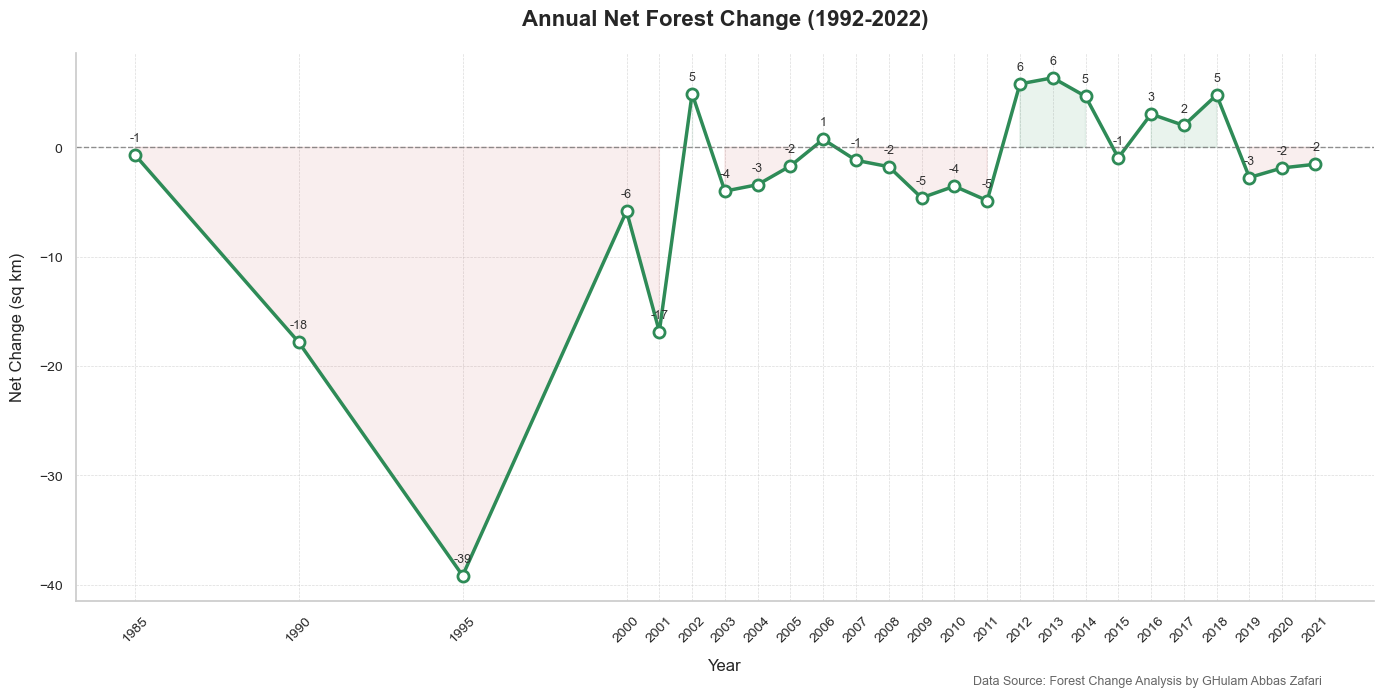

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the data
df = pd.read_csv('/Users/ghulamabbaszafari/Downloads/rest/Clippeed_GLC_tevere_basin/forest/forest_GLC_analysis.csv')

# Convert Year_Range to start year
df['Year'] = df['Year_Range'].str.split('-').str[0].astype(int)

# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(14, 7))

# Create the plot with enhanced features
ax = plt.subplot()

# Plot the line with markers
line = ax.plot(df['Year'], df['Net_Change_sqkm'], 
               marker='o', 
               markersize=8,
               linewidth=2.5,
               color='#2e8b57',  # Forest green color
               markerfacecolor='#ffffff',
               markeredgewidth=2,
               markeredgecolor='#2e8b57')

# Add value annotations
for x, y in zip(df['Year'], df['Net_Change_sqkm']):
    ax.annotate(f"{y:,.0f}", 
                (x, y), 
                textcoords="offset points",
                xytext=(0,10), 
                ha='center',
                fontsize=9,
                color='#333333')

# Add zero line reference
ax.axhline(0, color='#666666', linestyle='--', linewidth=1, alpha=0.7)

# Customize title and labels
plt.title("Annual Net Forest Change (1992-2022)", 
          fontsize=16, 
          pad=20,
          fontweight='bold')
plt.xlabel("Year", fontsize=12, labelpad=10)
plt.ylabel("Net Change (sq km)", fontsize=12, labelpad=10)

# Customize ticks
plt.xticks(df['Year'], rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Add grid
ax.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)

# Remove spines
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# Add fill between line and zero when positive/negative
ax.fill_between(df['Year'], df['Net_Change_sqkm'], 0, 
                where=(df['Net_Change_sqkm'] > 0), 
                color='#2e8b57', alpha=0.1)
ax.fill_between(df['Year'], df['Net_Change_sqkm'], 0, 
                where=(df['Net_Change_sqkm'] < 0), 
                color='#cd5c5c', alpha=0.1)

# Add data source annotation
plt.figtext(0.95, 0.01, "Data Source: Forest Change Analysis by GHulam Abbas Zafari", 
            ha="right", 
            fontsize=9, 
            color='#666666')

# Adjust layout
plt.tight_layout()

plt.show()



In [14]:
# Calculate summary statistics
summary = df.describe()
print("Summary Statistics:\n", summary)

# Identify worst/best years
worst_loss = df.loc[df['Loss_Area_sqkm'].idxmax()]
best_gain = df.loc[df['Gain_Area_sqkm'].idxmax()]
print("\nWorst Loss Year:", worst_loss['Year_Range'], f"({worst_loss['Loss_Area_sqkm']} sq km)")
print("Best Gain Year:", best_gain['Year_Range'], f"({best_gain['Gain_Area_sqkm']} sq km)")


Summary Statistics:
        Total_Forest_Pixels  Total_Forest_Area_sqkm    Loss_Pixels  \
count         2.500000e+01               25.000000      25.000000   
mean          2.305347e+06             2074.812732   24676.240000   
std           2.975817e+04               26.782357   29139.029576   
min           2.275447e+06             2047.902300    6757.000000   
25%           2.291913e+06             2062.721700   10638.000000   
50%           2.296452e+06             2066.806800   13826.000000   
75%           2.302560e+06             2072.304000   18692.000000   
max           2.386394e+06             2147.754600  109908.000000   

       Loss_Area_sqkm   Gain_Pixels  Gain_Area_sqkm  No_Change_Pixels  \
count       25.000000     25.000000       25.000000      2.500000e+01   
mean        22.208616  21104.880000       18.994392      2.280671e+06   
std         26.225127  23301.657524       20.971492      3.043122e+04   
min          6.081300   5028.000000        4.525200      2.212084

In [15]:
# Calculate 5-year moving averages
df['MA_Loss'] = df['Loss_Area_sqkm'].rolling(5).mean()

# Identify persistent loss periods
hotspots = df[df['MA_Loss'] > df['Loss_Area_sqkm'].mean()]
print("Deforestation Hotspot Periods:\n", hotspots[['Year_Range', 'Loss_Area_sqkm']])

Deforestation Hotspot Periods:
   Year_Range  Loss_Area_sqkm
4  2001-2002         93.3705
5  2002-2003         75.8997
6  2003-2004         10.2330
7  2004-2005          8.9109
8  2005-2006          8.7012


In [16]:
from ruptures import Binseg

# Detect significant change points in the time series
signal = df['Net_Change_sqkm'].values
algo = Binseg(model="l2").fit(signal)
change_points = algo.predict(n_bkps=3)  # Detect 3 major changes

print("Major Change Points at Years:")
for cp in change_points[:-1]:
    print(df.iloc[cp]['Year_Range'])


    

Major Change Points at Years:
2002-2003
2012-2013
2017-2018


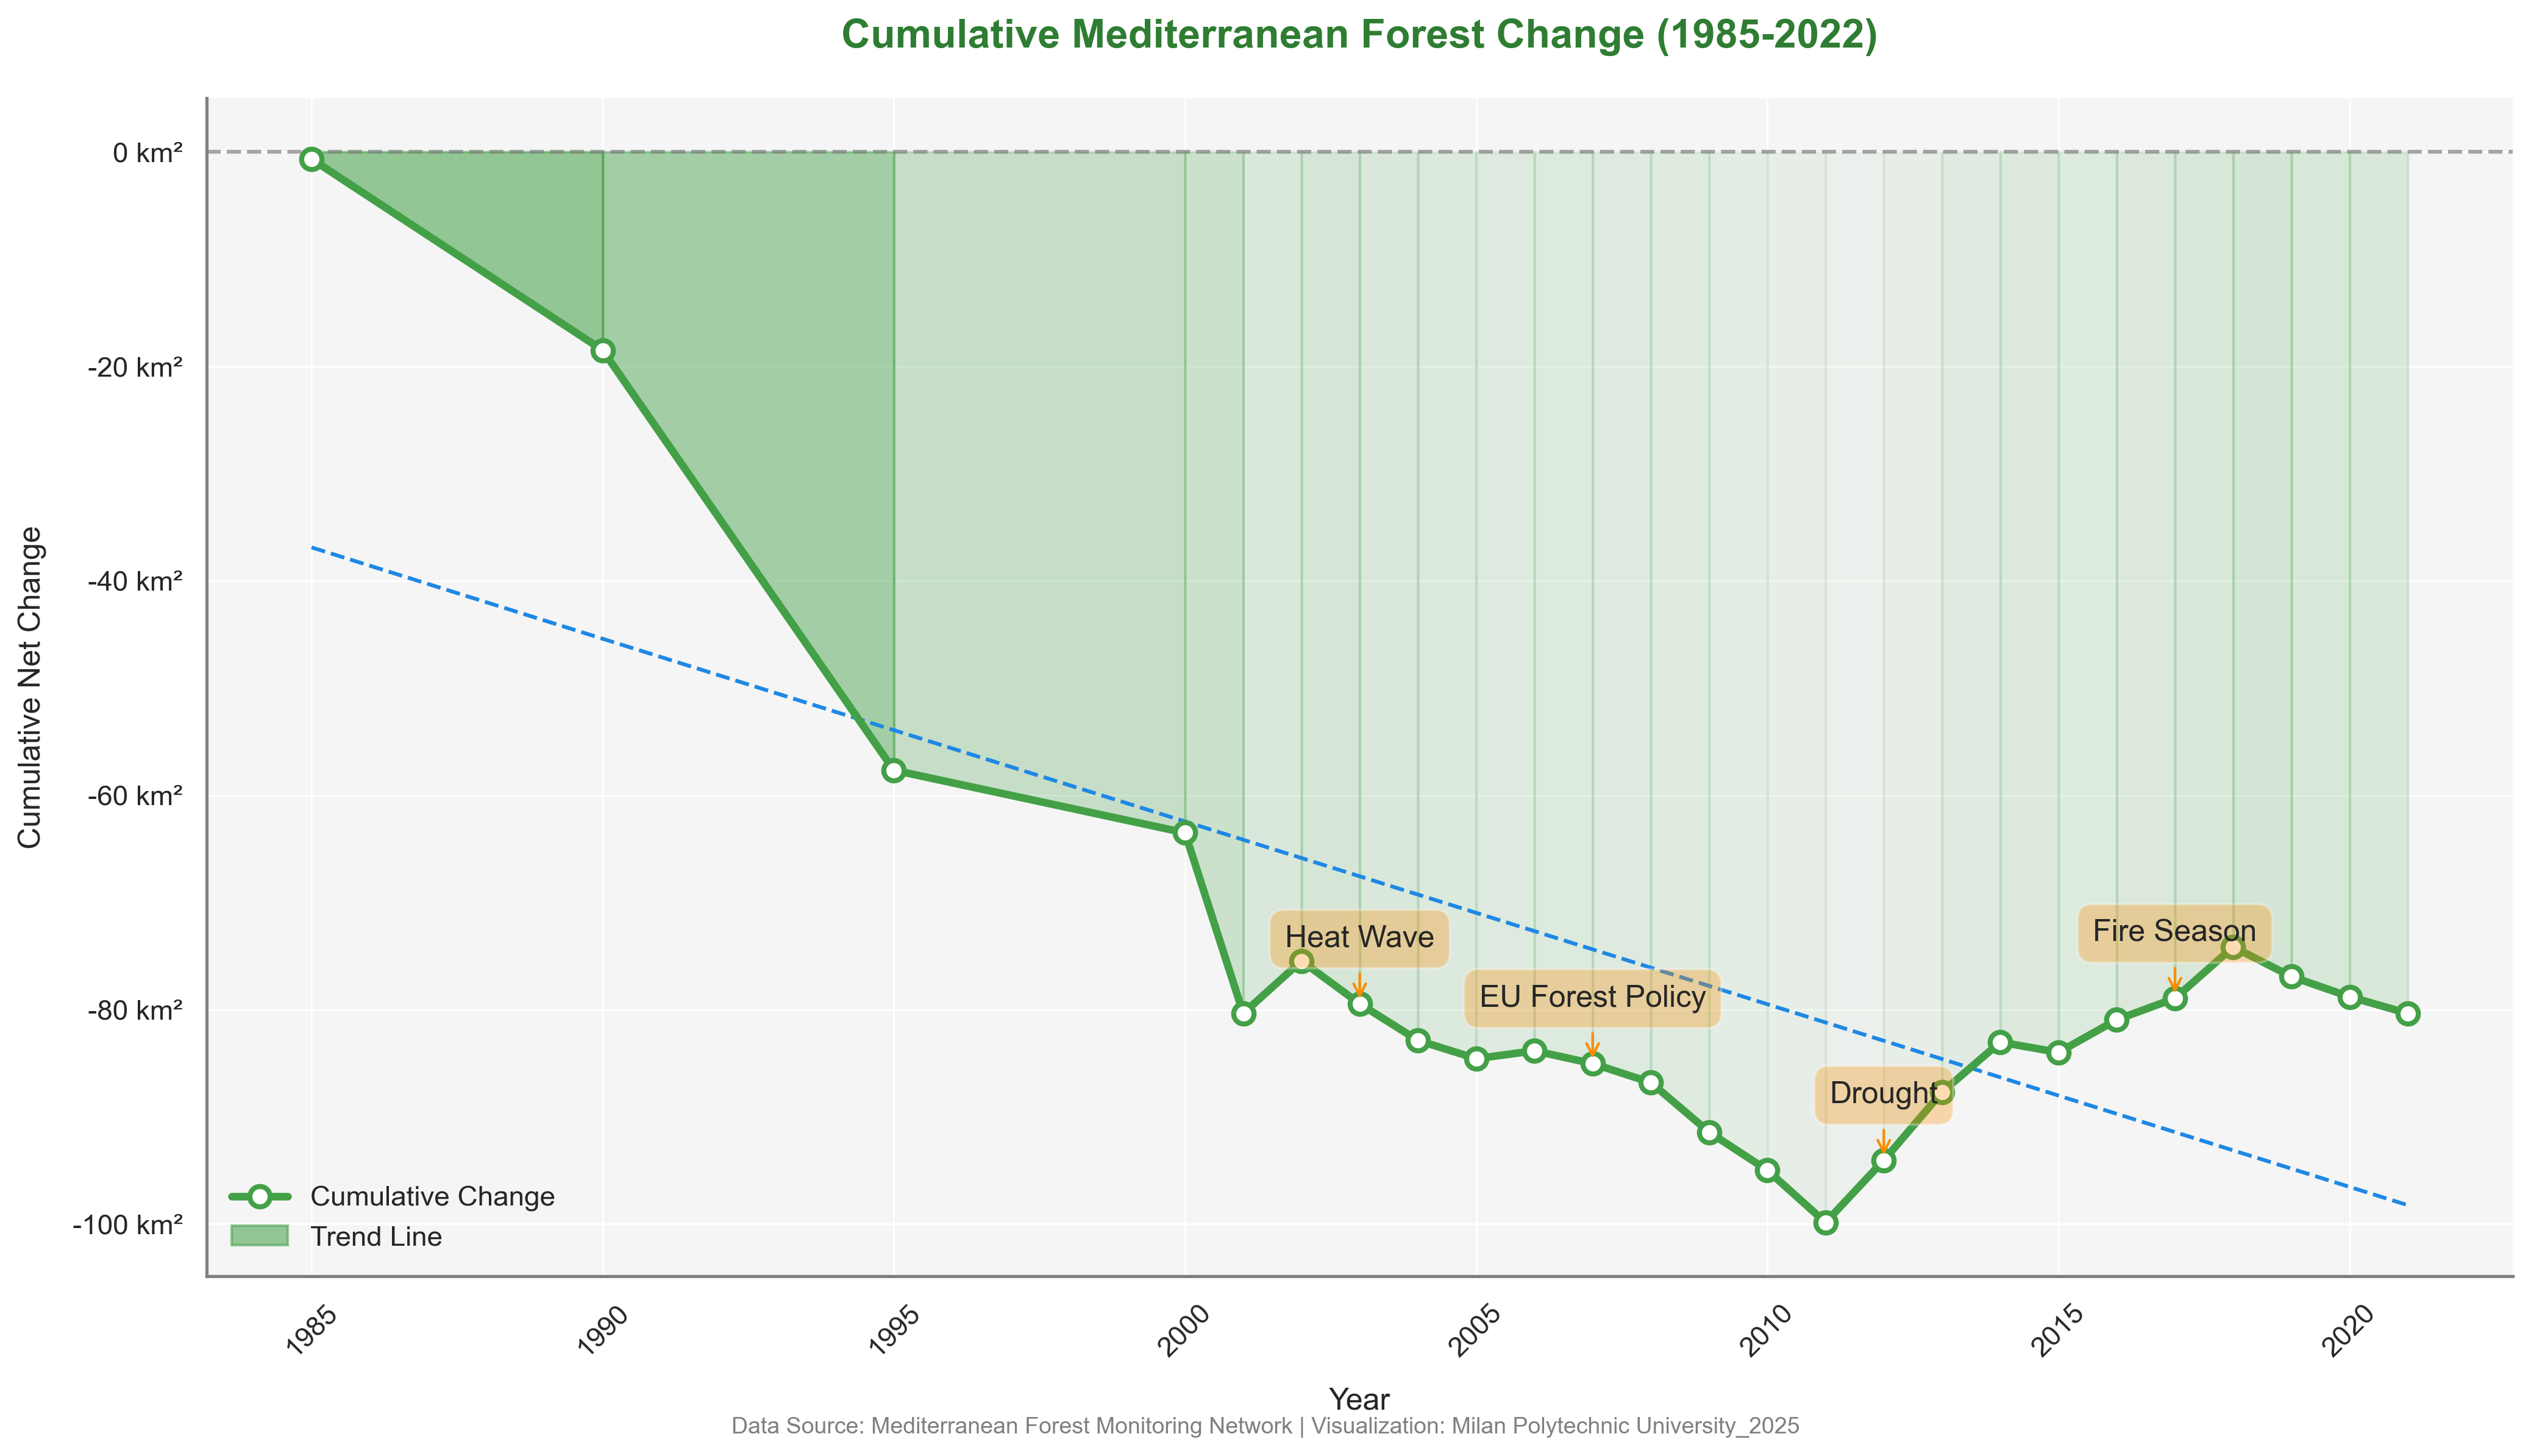

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import FuncFormatter, MaxNLocator

# --- DATA PREP ---
# Create cumulative column (if not already done)
df['Cumulative_Net'] = df['Net_Change_sqkm'].cumsum()

# Set Mediterranean-inspired colors
med_blue = '#1E88E5'  # Sea blue
med_green = '#43A047'  # Forest green
med_orange = '#FB8C00'  # Sunset orange

# --- PLOT ---
plt.figure(figsize=(14, 8), dpi=300)
ax = plt.gca()

# Background styling
ax.set_facecolor('#F5F5F5')
ax.grid(color='white', linestyle='-', linewidth=0.7)

# Plot cumulative line
(line,) = plt.plot(
    df['Year'], 
    df['Cumulative_Net'],
    color=med_green,
    linewidth=3,
    marker='o',
    markersize=8,
    markerfacecolor='white',
    markeredgecolor=med_green,
    markeredgewidth=2,
    zorder=3
)

# Gradient fill under the curve
for i in range(len(df) - 1):
    plt.fill_between(
        [df['Year'][i], df['Year'][i+1]],
        [df['Cumulative_Net'][i], df['Cumulative_Net'][i+1]],
        color=med_green,
        alpha=0.05 + 0.5 * (df['Cumulative_Net'][i] - df['Cumulative_Net'].min()) / (df['Cumulative_Net'].max() - df['Cumulative_Net'].min())
    )

# --- ANNOTATIONS ---
events = {
    2003: "Heat Wave",
    2007: "EU Forest Policy",
    2012: "Drought",
    2017: "Fire Season"
}

for year, label in events.items():
    if year in df['Year'].values:
        idx = df[df['Year'] == year].index[0]
        y_val = df['Cumulative_Net'][idx]
        plt.annotate(
            label,
            xy=(year, y_val),
            xytext=(0, 20),
            textcoords='offset points',
            ha='center',
            va='bottom',
            bbox=dict(boxstyle='round,pad=0.5', fc=med_orange, alpha=0.3),
            arrowprops=dict(arrowstyle='->', color=med_orange)
        )

# --- AXES & FORMATTING ---
# Zero line reference
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.7)

# Y-axis formatter (e.g., "1,000 km²")
def sqkm_formatter(x_val, pos):
    if abs(x_val) >= 1:
        return f"{x_val:,.0f} km²"
    elif x_val == 0:
        return "0 km²"
    else:
        return f"{x_val:.2f} km²"

ax.yaxis.set_major_formatter(FuncFormatter(sqkm_formatter))
ax.yaxis.set_major_locator(MaxNLocator(nbins=6))

# Trend line (optional)
x_numeric = pd.to_numeric(df['Year'], errors='coerce')
valid_mask = (~x_numeric.isna()) & (~df['Cumulative_Net'].isna())
x_clean = x_numeric[valid_mask]
y_clean = df['Cumulative_Net'][valid_mask]

if len(x_clean) > 1:
    z = np.polyfit(x_clean, y_clean, 1)
    p = np.poly1d(z)
    plt.plot(x_clean, p(x_clean), "--", color=med_blue, linewidth=1.5, label='Trend')

# --- LABELS & STYLING ---
plt.title("Cumulative Mediterranean Forest Change (1985-2022)", 
          fontsize=16, pad=20, fontweight='bold', color='#2E7D32')
plt.xlabel("Year", fontsize=12, labelpad=10)
plt.ylabel("Cumulative Net Change", fontsize=12, labelpad=10)
plt.xticks(rotation=45)
plt.legend(['Cumulative Change', 'Trend Line'], frameon=False)

# Remove top/right spines
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
for spine in ['left', 'bottom']:
    ax.spines[spine].set_color('gray')

# Add footnote
plt.figtext(0.5, 0.01,
            "Data Source: Mediterranean Forest Monitoring Network | Visualization: Milan Polytechnic University_2025",
            ha="center", fontsize=9, color='gray')

plt.tight_layout()
plt.show()



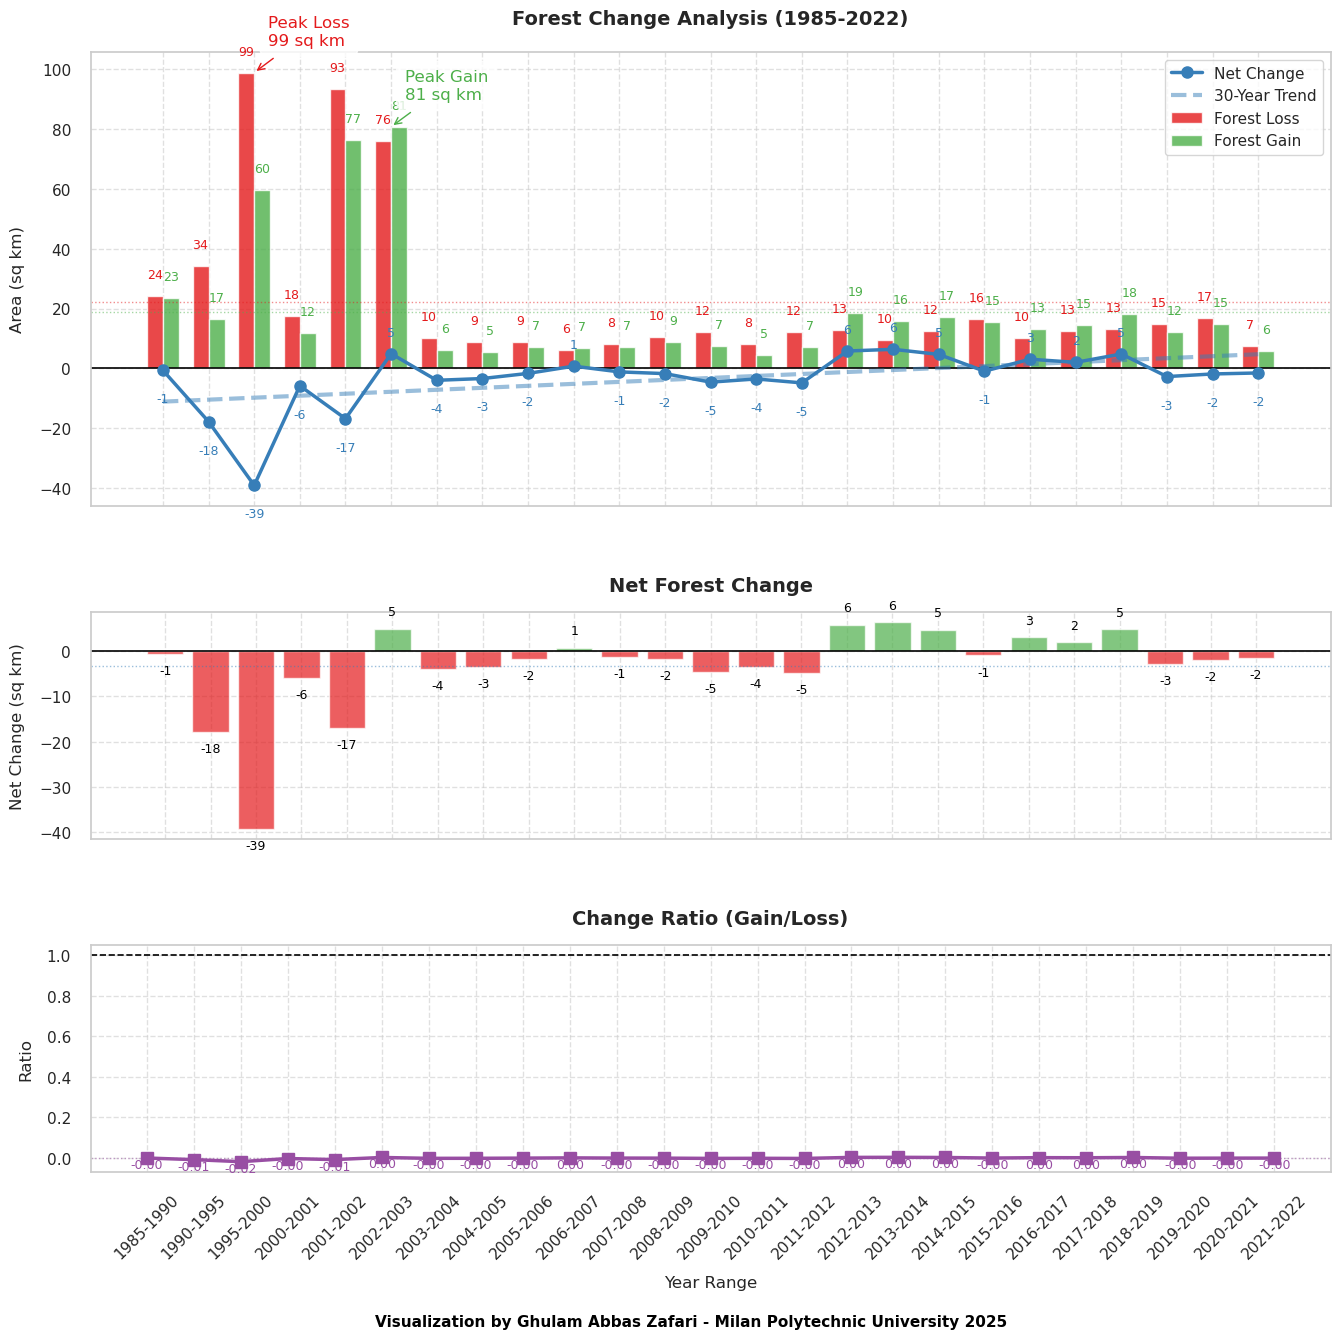

<Figure size 640x480 with 0 Axes>

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set style with custom parameters
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.family': 'DejaVu Sans',
    'axes.titlesize': 14,
    'axes.titleweight': 'bold',
    'axes.labelpad': 10,
    'xtick.major.pad': 8,
    'ytick.major.pad': 8
})

# Load data
df = pd.read_csv('/Users/ghulamabbaszafari/Downloads/rest/Clippeed_GLC_tevere_basin/forest/forest_GLC_analysis.csv')
df['Year'] = df['Year_Range'].astype(str)
x = np.arange(len(df['Year']))
bar_width = 0.35

# Create figure with adjusted layout
fig = plt.figure(figsize=(16, 14))
gs = fig.add_gridspec(3, 1, height_ratios=[2, 1, 1], hspace=0.35)

# Color scheme
colors = {
    'gain': '#4daf4a',  # green
    'loss': '#e41a1c',  # red
    'net': '#377eb8',   # blue
    'ratio': '#984ea3', # purple
    'trend': '#377eb880' # semi-transparent blue
}

## TOP PLOT: Area Changes ##
ax1 = fig.add_subplot(gs[0])

# Calculate averages
avg_loss = df['Loss_Area_sqkm'].mean()
avg_gain = df['Gain_Area_sqkm'].mean()

# Plot bars
loss_bars = ax1.bar(x - bar_width/2, df['Loss_Area_sqkm'], bar_width, 
                   color=colors['loss'], label='Forest Loss', alpha=0.8)
gain_bars = ax1.bar(x + bar_width/2, df['Gain_Area_sqkm'], bar_width, 
                   color=colors['gain'], label='Forest Gain', alpha=0.8)

# Plot net change with trend line
net_line = ax1.plot(x, df['Net_Change_sqkm'], color=colors['net'], 
                   marker='o', markersize=8, linewidth=2.5, 
                   label='Net Change', zorder=5)

# Add trend line
z = np.polyfit(x, df['Net_Change_sqkm'], 1)
p = np.poly1d(z)
ax1.plot(x, p(x), color=colors['trend'], linewidth=3, linestyle='--',
        label='30-Year Trend', zorder=4)

# Add reference lines
ax1.axhline(avg_loss, color=colors['loss'], linestyle=':', linewidth=1, alpha=0.5)
ax1.axhline(avg_gain, color=colors['gain'], linestyle=':', linewidth=1, alpha=0.5)
ax1.axhline(0, color='black', linewidth=1.2)

# Label values
max_val = max(df['Loss_Area_sqkm'].max(), df['Gain_Area_sqkm'].max())
label_offset = max_val * 0.05

for bars, color in zip([loss_bars, gain_bars], [colors['loss'], colors['gain']]):
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax1.text(bar.get_x() + bar.get_width()/2., height + label_offset,
                    f'{height:,.0f}', ha='center', va='bottom',
                    fontsize=9, color=color)

for i, val in enumerate(df['Net_Change_sqkm']):
    offset = label_offset * (1 if val > 0 else -1.5)
    ax1.text(i, val + offset, f'{val:,.0f}', ha='center', 
            va='bottom' if val > 0 else 'top',
            fontsize=9, color=colors['net'])

# Add extreme event annotations
max_loss_idx = df['Loss_Area_sqkm'].idxmax()
max_gain_idx = df['Gain_Area_sqkm'].idxmax()
ax1.annotate(f"Peak Loss\n{df.loc[max_loss_idx, 'Loss_Area_sqkm']:,.0f} sq km",
            xy=(max_loss_idx, df.loc[max_loss_idx, 'Loss_Area_sqkm']),
            xytext=(10, 20), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color=colors['loss']),
            bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.8),
            color=colors['loss'])

ax1.annotate(f"Peak Gain\n{df.loc[max_gain_idx, 'Gain_Area_sqkm']:,.0f} sq km",
            xy=(max_gain_idx, df.loc[max_gain_idx, 'Gain_Area_sqkm']),
            xytext=(10, 20), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color=colors['gain']),
            bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.8),
            color=colors['gain'])

# Format axes
ax1.set_title('Forest Change Analysis (1985-2022)', pad=20)
ax1.set_ylabel('Area (sq km)')
ax1.set_xticks(x)
ax1.set_xticklabels([])
ax1.legend(loc='upper right', bbox_to_anchor=(1, 1))
ax1.grid(True, linestyle='--', alpha=0.6)

## MIDDLE PLOT: Net Change ##
ax2 = fig.add_subplot(gs[1])
avg_net = df['Net_Change_sqkm'].mean()

# Plot bars
net_bars = ax2.bar(x, df['Net_Change_sqkm'], 
                  color=np.where(df['Net_Change_sqkm'] > 0, colors['gain'], colors['loss']),
                  alpha=0.7)

# Add reference lines
ax2.axhline(0, color='black', linewidth=1.2)
ax2.axhline(avg_net, color=colors['net'], linestyle=':', linewidth=1, alpha=0.5)

# Label values
y_range = df['Net_Change_sqkm'].max() - df['Net_Change_sqkm'].min()
label_offset = y_range * 0.05

for bar in net_bars:
    height = bar.get_height()
    va = 'bottom' if height > 0 else 'top'
    offset = label_offset if height > 0 else -label_offset
    ax2.text(bar.get_x() + bar.get_width()/2., height + offset,
            f'{height:,.0f}', ha='center', va=va,
            fontsize=9, color='black')

# Format axes
ax2.set_title('Net Forest Change', pad=15)
ax2.set_ylabel('Net Change (sq km)')
ax2.set_xticks(x)
ax2.set_xticklabels([])
ax2.grid(True, linestyle='--', alpha=0.6)

## BOTTOM PLOT: Change Ratio ##
ax3 = fig.add_subplot(gs[2])
avg_ratio = df['Change_Ratio'].mean()

# Plot ratio
ratio_line = ax3.plot(x, df['Change_Ratio'], color=colors['ratio'], 
                     marker='s', markersize=8, linewidth=2.5)

# Add reference lines
ax3.axhline(1, color='black', linestyle='--', linewidth=1.2)
ax3.axhline(avg_ratio, color=colors['ratio'], linestyle=':', linewidth=1, alpha=0.5)

# Label values
ratio_range = df['Change_Ratio'].max() - df['Change_Ratio'].min()
ratio_offset = ratio_range * 0.05

for i, val in enumerate(df['Change_Ratio']):
    ax3.text(i, val + (ratio_offset if val > 1 else -ratio_offset), f'{val:.2f}',
            ha='center', va='bottom' if val > 1 else 'top',
            fontsize=9, color=colors['ratio'])

# Format axes
ax3.set_title('Change Ratio (Gain/Loss)', pad=15)
ax3.set_xlabel('Year Range')
ax3.set_ylabel('Ratio')
ax3.set_xticks(x)
ax3.set_xticklabels(df['Year'], rotation=45)
ax3.grid(True, linestyle='--', alpha=0.6)

# Add attribution at the bottom center in bold - ADJUSTED POSITION
fig.text(0.5, 0.01, 'Visualization by Ghulam Abbas Zafari - Milan Polytechnic University 2025', 
        ha='center', fontsize=11, color='black', weight='bold')

# Adjust layout with more bottom padding to prevent overlap - INCREASED BOTTOM MARGIN
plt.subplots_adjust(bottom=0.12, top=0.92, hspace=0.4)

plt.show()

# Adjust layout to make space for the attribution
plt.subplots_adjust(bottom=0.1, top=0.92, hspace=0.4)
# Final layout adjustment
plt.subplots_adjust(bottom=0.08, top=0.92, hspace=0.4)
plt.show()



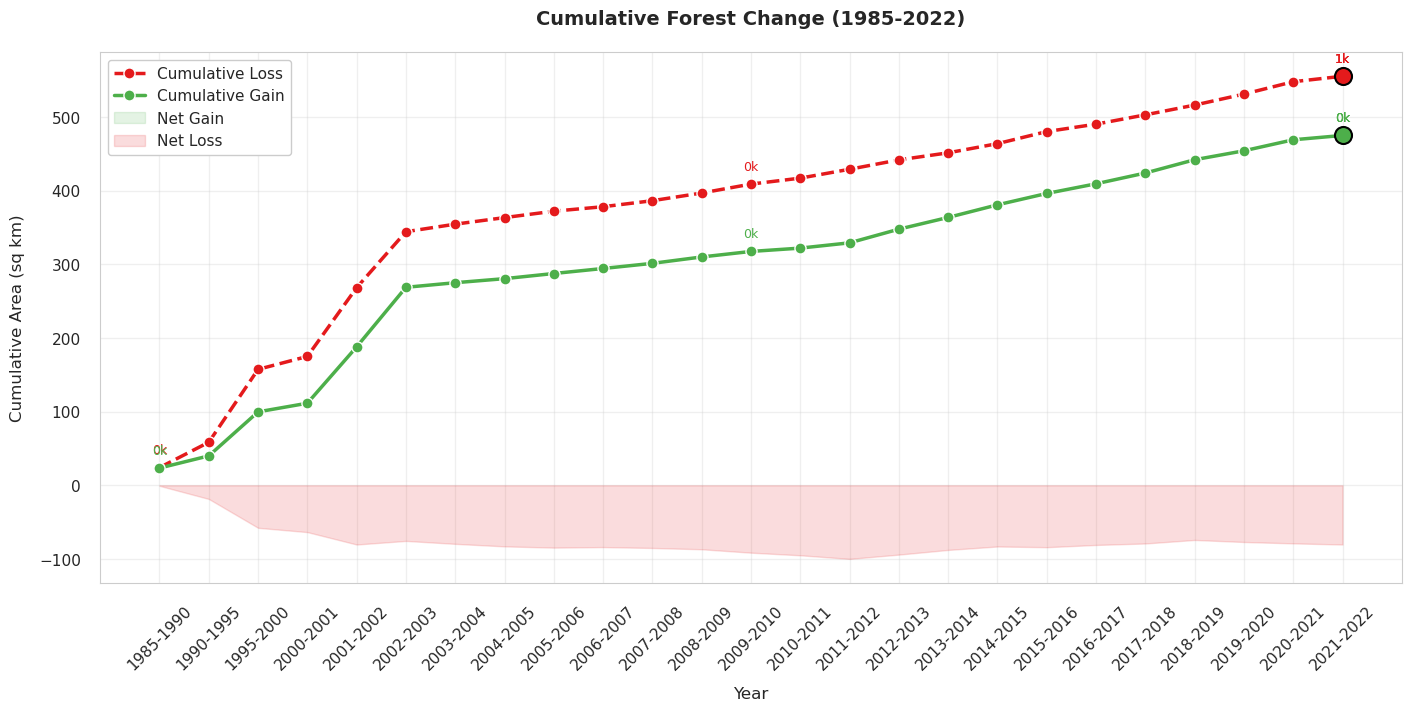

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set style using direct rcParams (no style sheet dependency)
plt.rcParams.update({
    'font.family': 'DejaVu Sans',
    'axes.titlesize': 14,
    'axes.titleweight': 'bold',
    'axes.labelpad': 10,
    'grid.alpha': 0.3,
    'axes.grid': True,
    'axes.edgecolor': '0.8',
    'axes.linewidth': 0.8,
    'figure.facecolor': 'white'
})

# Calculate cumulative values
df['Cumulative_Loss'] = df['Loss_Area_sqkm'].cumsum()
df['Cumulative_Gain'] = df['Gain_Area_sqkm'].cumsum()
df['Net_Balance'] = df['Cumulative_Gain'] - df['Cumulative_Loss']

# Create figure with constrained layout
fig, ax = plt.subplots(figsize=(14, 7), layout='constrained')

# Custom color scheme
loss_color = '#e41a1c'  # Red
gain_color = '#4daf4a'   # Green

# Plot cumulative loss and gain with enhanced styling
loss_line, = ax.plot(df['Year'], df['Cumulative_Loss'], 
                    color=loss_color, linewidth=2.5, linestyle='--',
                    marker='o', markersize=8, markeredgecolor='white',
                    label='Cumulative Loss')

gain_line, = ax.plot(df['Year'], df['Cumulative_Gain'], 
                    color=gain_color, linewidth=2.5, linestyle='-',
                    marker='o', markersize=8, markeredgecolor='white',
                    label='Cumulative Gain')

# Plot net balance area with improved fill
net_pos = ax.fill_between(df['Year'], df['Net_Balance'], 0,
                         where=(df['Net_Balance'] > 0),
                         color=gain_color, alpha=0.15, label='Net Gain')

net_neg = ax.fill_between(df['Year'], df['Net_Balance'], 0,
                         where=(df['Net_Balance'] < 0),
                         color=loss_color, alpha=0.15, label='Net Loss')

# Highlight key points
max_loss = df.loc[df['Cumulative_Loss'].idxmax()]
max_gain = df.loc[df['Cumulative_Gain'].idxmax()]

ax.scatter(max_loss['Year'], max_loss['Cumulative_Loss'],
          color=loss_color, s=150, zorder=5, 
          edgecolor='black', linewidth=1.5,
          label='Peak Loss')

ax.scatter(max_gain['Year'], max_gain['Cumulative_Gain'],
          color=gain_color, s=150, zorder=5,
          edgecolor='black', linewidth=1.5,
          label='Peak Gain')

# Add value annotations at key points
key_years = [0, len(df)//2, len(df)-1]  # First, middle, last year
for i in [*key_years, df['Cumulative_Loss'].idxmax(), df['Cumulative_Gain'].idxmax()]:
    row = df.iloc[i]
    ax.annotate(f"{row['Cumulative_Loss']/1000:.0f}k", 
                (row['Year'], row['Cumulative_Loss']),
                textcoords="offset points", xytext=(0,10),
                ha='center', color=loss_color, fontsize=9)
    ax.annotate(f"{row['Cumulative_Gain']/1000:.0f}k", 
                (row['Year'], row['Cumulative_Gain']),
                textcoords="offset points", xytext=(0,10),
                ha='center', color=gain_color, fontsize=9)

# Formatting
ax.set_title("Cumulative Forest Change (1985-2022)", pad=20)
ax.set_xlabel("Year", labelpad=10)
ax.set_ylabel("Cumulative Area (sq km)", labelpad=10)
ax.set_xticks(df['Year'])
ax.set_xticklabels(df['Year'], rotation=45)

# Custom legend
handles = [loss_line, gain_line, net_pos, net_neg]
labels = ['Cumulative Loss', 'Cumulative Gain', 'Net Gain', 'Net Loss']
ax.legend(handles, labels, loc='upper left', frameon=True, framealpha=1)



plt.show()



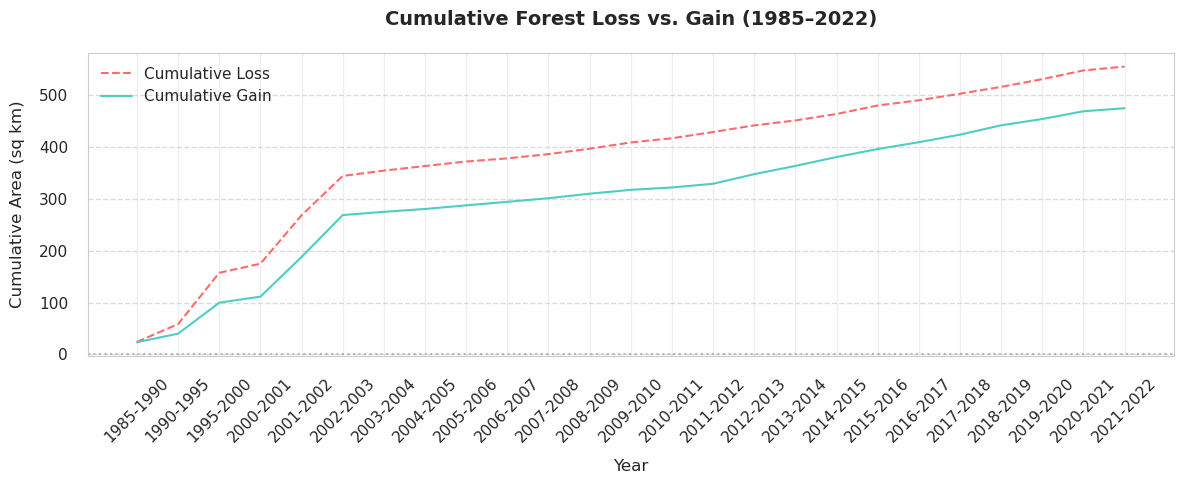

In [23]:
# Use the correct column names from your DataFrame
df['Cumulative_Loss'] = df['Loss_Area_sqkm'].cumsum()
df['Cumulative_Gain'] = df['Gain_Area_sqkm'].cumsum()

plt.figure(figsize=(12, 5))
plt.plot(df['Year'], df['Cumulative_Loss'], label='Cumulative Loss', linestyle='--', color='#FF6B6B')  # Red for loss
plt.plot(df['Year'], df['Cumulative_Gain'], label='Cumulative Gain', linestyle='-', color='#4ECDC4')   # Teal for gain

# Add zero-line reference
plt.axhline(y=0, color='gray', linestyle=':', alpha=0.5)

# Titles and labels
plt.title("Cumulative Forest Loss vs. Gain (1985–2022)", fontweight='bold', pad=20)
plt.xlabel("Year", labelpad=10)
plt.ylabel("Cumulative Area (sq km)", labelpad=10)
plt.legend(frameon=False)

# Improve ticks and layout
plt.xticks(df['Year'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

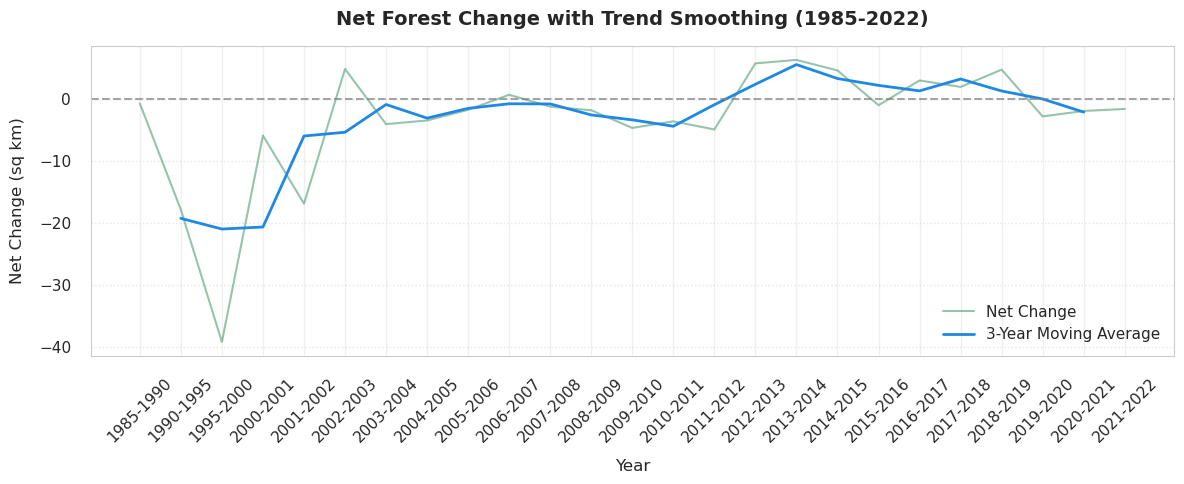

In [24]:
# Use the correct column name 'Net_Change_sqkm' instead of 'Net_Change'
df['Net_Change_MA'] = df['Net_Change_sqkm'].rolling(window=3, center=True).mean()

plt.figure(figsize=(12, 5))
plt.plot(df['Year'], df['Net_Change_sqkm'], label='Net Change', alpha=0.5, color='#2e8b57')
plt.plot(df['Year'], df['Net_Change_MA'], 
         label='3-Year Moving Average', 
         linewidth=2,
         color='#1E88E5')  # Mediterranean blue

# Add zero-line reference
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.7)

# Enhancements
plt.title("Net Forest Change with Trend Smoothing (1985-2022)", 
          fontweight='bold', pad=15)
plt.xlabel("Year", labelpad=10)
plt.ylabel("Net Change (sq km)", labelpad=10)
plt.legend(frameon=False)

# Formatting
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()



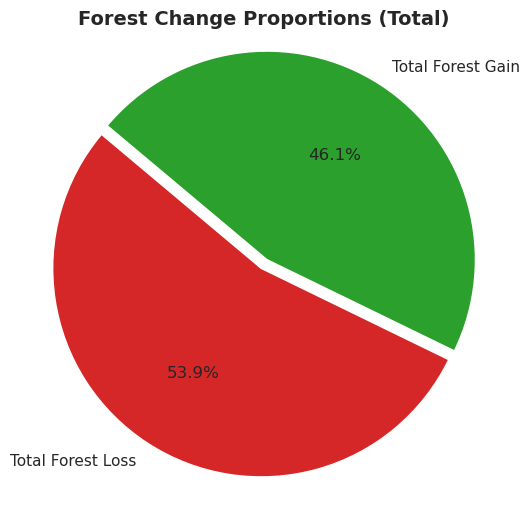

In [25]:
import matplotlib.pyplot as plt

# Sum the total loss and gain over all years
total_loss = df['Loss_Area_sqkm'].sum()
total_gain = df['Gain_Area_sqkm'].sum()

# Data and labels
sizes = [total_loss, total_gain]
labels = ['Total Forest Loss', 'Total Forest Gain']
colors = ['#d62728', '#2ca02c']  # red for loss, green for gain

# Plot
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=(0.05, 0))
plt.title('Forest Change Proportions (Total)')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular.
plt.show()


In [5]:
print("Current mapset:", gs.gisenv()['MAPSET'])

Current mapset: PERMANENT
